<a href="https://colab.research.google.com/github/RowanHoupa35/ML-TD1/blob/main/ENSTA/td_gaussien_bayesien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD : Apprentissage automatique - Approches bayésienne et linéairement discriminante

Répondez aux questions dans le document et copiez les lignes de code qui ont produit les résultats aux endroits indiqués.

Les objectifs du TD sont:
* Une familiarisation avec la gestion de données.
* La mise en oeuvre d'une démarche de conception par apprentissage d'un classifieur sur des problèmes de petite taille (mais parfois de grande dimension).
* Une prise en main des ressources logicielles classiques utilisées en Machine Learning et Data Science.


______

# Introduction: Les ressources logicielles utiles
______

Dans ce TD, on utilise les ressources de calcul et l'environnement logiciel Python proposés par [Colab](https://colab.research.google.com/).

Les données seront accessibles depuis le site [openML](https://www.openml.org/) et seront téléchargées directement depuis ce site.

Il sera fait usage de la bibliothèque [scikit-learn](http://scikit-learn.org/stable/modules/classes.html) qui contient la plupart des algorithmes d'apprentissage classiques dans un format unifié.

D'autres bibliothèques utiles sont [pandas](https://pandas.pydata.org/) (manipulation de données) et [seaborn](https://seaborn.pydata.org/) (fonctions de visualisation): on en verra quelques exemples au cours du TD.

Les bibliothèques seront chargées au cours du TD en utilisant l'instruction Python  `import`.

Exécuter la cellule de code suivante pour charger les librairies utiles.

In [ ]:
# Librairies scientifique et visualisation utiles standard
import numpy as np
import matplotlib.pyplot as plt

# Pour visualiser la répartition des données sur un plan
def show_data_2D(X,Y):
  # X: matrice contenant les coordonnées 2D des points (shape: n*2); Y: vecteur contenat les étiquettes/catégories de chaque point (shape: n*1)
    np.unique(Y)
    fig, ax = plt.subplots(figsize=(8, 6)) #Crée une figure et un système d'axes pour le graphique
    # fig: contient la figure, ax: contient les axes pour tracer les données;
    for id in np.unique(Y):
        idpositive=np.nonzero(Y == id)[0] #np.nonzero() : retourne les indices où la condition est True,
         #[0]: Prend la première dimension car np.nonzero retourne un tuple
        ax.scatter(X[idpositive,0], X[idpositive,1], s=50) #Trace des points dispersés (scatter plot)
        # X[idpositive,0] : Coordonnées X (première colonne) des points de la catégorie
        # X[idpositive,1] : Coordonnées Y (deuxième colonne) des points de la catégorie
        # s=50 : Taille des points (size = 50 pixels)


______

# Partie 1: Les données
______

On se propose dans cette première partie de construire une démarche d'apprentissage sur un problème simple, et de programmer les algorithmes vus dans le cours (approches discriminantes et génératives).

Chaque jeu de données est constitué de quatre ensembles :
* Un ensemble de données utilisées pour l'apprentissage : X_train
* Un ensemble de classes associées aux données d'apprentissage : y_train
* Un ensemble de données à tester : X_test
* Un ensemble de classes associées aux données de test : y_test

Les données de test ne doivent pas être utilisées pour l'apprentissage proprement dit, seulement pour son évaluation.

Remarque: Pour visualiser dans le notebook, appliquer l'instruction:
>```python
plt.show()
```

après chaque fonction de visualisation.


## Familiarisation avec les données

On se propose de réaliser une classification binaire d'un ensemble de données en utilisant les approches décrites dans le cours.

Le problème est une classification binaire pour détecter des billets de banque frauduleux. Les données source d'origine sont accessibles [ici](https://www.openml.org/search?type=data&status=active&id=1462).

L'objectif est de dérouler les différentes étapes d'une démarche d'apprentissage automatique:
1. Constitution de la base d'apprentissage
2. Visualisation et analyse des données
3. Choix d'une approche
4. Optimisation (apprentissage des paramètres du prédicteur)
5. Evaluation


### Base d'apprentissage (10min)


Exécuter le code ci-dessous qui charge les données, et qui les répartit en ensemble d'apprentissage et de test (fonction 'train_test_split')

Montrer les tailles des données (nombre de caractéristiques, nombre de données).


In [2]:
# API pour récupérer les données sur openml.org
!pip install openml --quiet
import openml

# Pour séparer les données en apprentissage et test
from sklearn.model_selection import train_test_split

# Chargement des données et constitution de la base d'apprentissage
dataset = openml.datasets.get_dataset('banknote-authentication')

# Get the data itself as a dataframe (or otherwise)
data_all, _, _, names = dataset.get_data(dataset_format="array")
print("Nom des colonnes: ", names)

y = data_all[:,-1]     # y : Dernière colonne (étiquettes/target)
X = data_all[:,:-1]    # X : Toutes les colonnes sauf la dernière (features)

# train_test_split() sépare les données en deux ensembles distincts (train & test)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, stratify=y, test_size=0.8)
# Les données d'entrée
   #X : Features/variables explicatives (caractéristiques des billets)
   #y : Target/variable à prédire (0=vrai billet, 1=faux billet
# Les données de sortie
    #X_train : Features pour l'entraînement (20% des données)
    #X_test : Features pour le test (80% des données)
    #y_train : Labels pour l'entraînement
    #y_test : Labels pour le test

# test_size=0.8 : 80% des données vont dans le test set
# stratify=y : Maintient la proportion des classes dans train et test
# random_state=42 : Pour la reproductibilité (Meme separation à chaque exécution)

# Données d'apprentissage réparties en fonction des classes
X0 = X_train[y_train == 0,:]
X1 = X_train[y_train == 1,:]

##################
# MODIFIER LE CODE
ndim = X_train.shape[1]
ntrain = X_train.shape[0]
#################

print("Les données sont de dimension {:d}".format(ndim))
print("Le nombre de données d'apprentissage est {:d}".format(ntrain))


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.8 MB/s eta 0:00:00


/tmp/ipython-input-4003501918.py:12: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  data_all, _, _, names = dataset.get_data(dataset_format="array")


Nom des colonnes:  ['V1', 'V2', 'V3', 'V4', 'Class']
Les données sont de dimension 4
Le nombre de données d'apprentissage est 274


### Visualisation des données

Jouer avec les visualisation des distributions de données en modifiant des paramètres du code ci-dessous et en éxécutant la cellule.

Vous pourrez utiliser les fonctions de visualisation "show_data_2D" pour mettre en évidence les corrélations, et [plt.hist](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) pour visualiser des histogrammes pour chaque classe comme dans l'exemple.


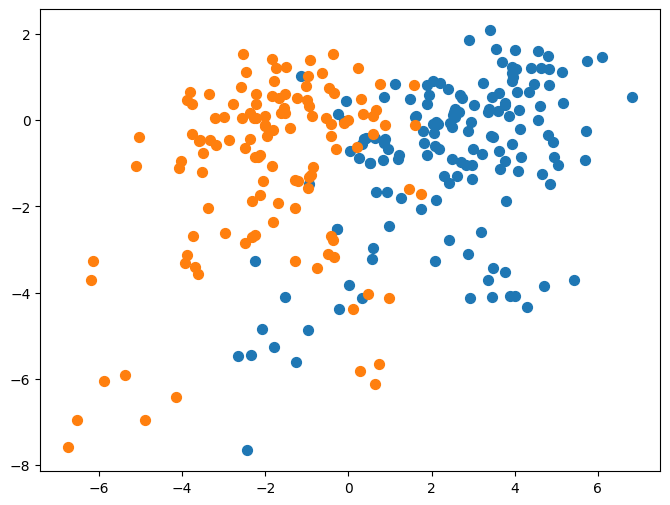

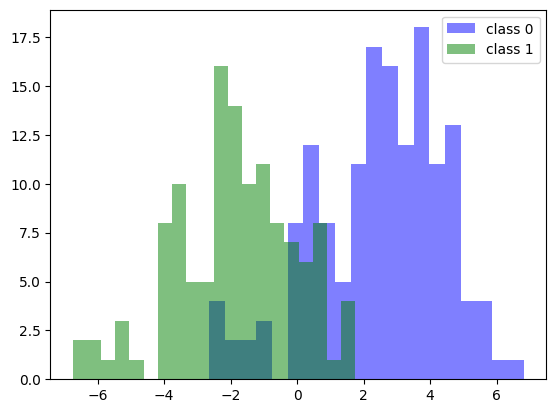

In [6]:
# Dimensions à étudier (à répéter pour d'autres dimensions), Ces indices correspondent aux colonnes du dataset
feat1 = 0
feat2 = 3

# Distributions 2D
show_data_2D(X_train[:,[feat1, feat2]], y_train) #X_train[:,[feat1, feat2]] : Sélectionne seulement les colonnes 0 et 3 de X_train, y_train : Les labels (0=vrai billet, 1=faux billet)
plt.show()

# Visualise les distributions pour un attribut
a0 = X0[:,feat1]
a1 = X1[:,feat1]

# Histogrammes des valeurs d'attributs pour chacune des classes
plt.hist(a0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(a1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()

#alpha=0.5 : Transparence à 50% pour voir les superpositions
#Le scatter plot montre si on peut tracer une ligne droite pour séparer les classes. (Séparabilité linéaire)
#Les histogrammes révèlent :
    #Décalage des moyennes : Les classes ont-elles des valeurs moyennes différentes ?
    #Recouvrement : Les distributions se chevauchent-elles beaucoup ?
    #Forme : Distribution normale, bimodale, etc.

#Cette analyse aide à identifier :
    #Les features les plus discriminantes
    #Les combinaisons de features intéressantes
    #La nécessité de transformations



### Autre manière de visualiser directement les données (en utilisant seaborn+pandas)

[Seaborn](https://seaborn.pydata.org/index.html) est une bibliothèque python très complète de visualisation de données. Elle contient des fonctions sophistiquées de rendu (exemple ci-dessous).


[Pandas](https://pandas.pydata.org/) est une bibliothèque de gestion et de manipulation de données. La structure de référence est le [*DataFrame*](https://pandas.pydata.org/docs/reference/frame.html) qui organise les données en champs indéxés par des étiquettes.

A partir des différents diagrammes, identifier les attributs individuels les plus informatifs pour la classification.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float32
 1   V2      1372 non-null   float32
 2   V3      1372 non-null   float32
 3   V4      1372 non-null   float32
 4   class   1372 non-null   int64  
dtypes: float32(4), int64(1)
memory usage: 32.3 KB


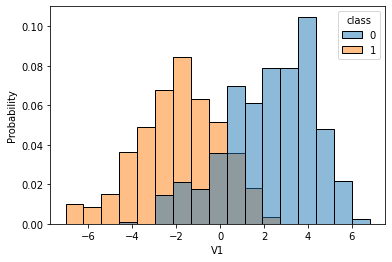

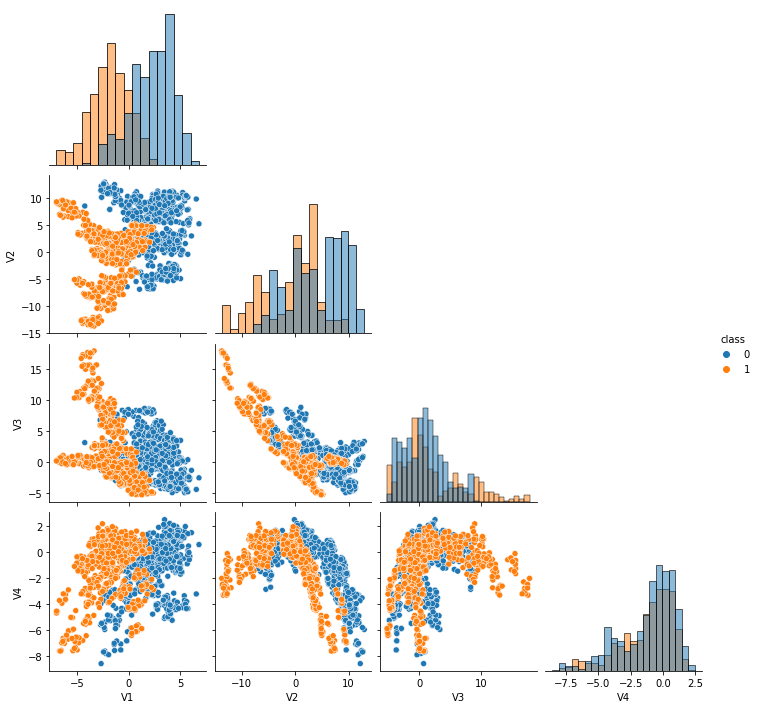

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(X, columns=names[:-1])
df['class'] = np.int64(y)

df.info()

sns.histplot(data=df, x='V1', hue='class', stat='probability')

sns.pairplot(df, hue='class',diag_kind="hist",corner=True)

## Construire une "baseline"

### Un premier essai de classification: chercher la meilleure caractéristique

* Modélisation des distributions 1D
* Construire un prédicteur pour chaque dimension
* Trouver la meilleure dimension à discriminer pour définir une "baseline" (= un algorithme simple de référence)

Vous pouvez regarder la bibliothèque [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) qui définit les familles courantes de distributions statistiques.

Essayez d'estimer quelques lois paramétriques pertinentes (méthode 'fit' des classes de scipy.stats) en les superposant aux histogrammes des données à parir du code ci-dessous. Jouer sur les différents paramètres pour visualiser les bonnes et mauvaises distributions.


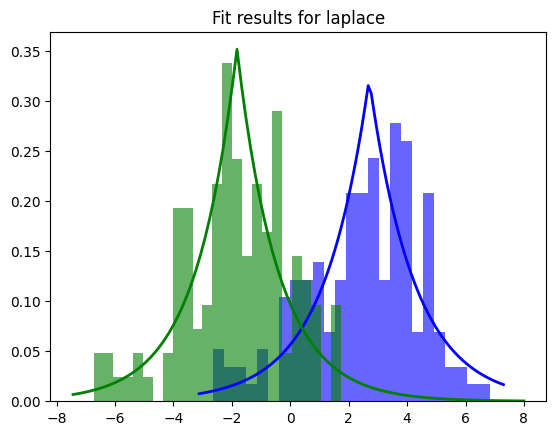

In [7]:
# Choix de la distribution
from scipy.stats import laplace, expon, norm, gamma, beta, cauchy, logistic

# Définit le type de distribution
distrib=laplace

# Choix de la caractéristique
feat1 = 0
a0 = X0[:,feat1]
a1 = X1[:,feat1]

# Visualise les distributions pour une caractéristique
plt.clf()

data = a0
param = distrib.fit(data)

# Visualise l'histogramme
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

# Visualise la PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = distrib.pdf(x, *param)
plt.plot(x, p, 'b', linewidth=2)

data = a1
param = distrib.fit(data)

# Visualise l'histogramme
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Visualise la PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = distrib.pdf(x, *param)
plt.plot(x, p, 'g', linewidth=2)

title = "Fit results for %s" % distrib.name
plt.title(title)

plt.show()


Une fois le type de distribution choisi, construire une étape de classification simple. Par exemple, en calculant le signe du log-rapport des probabilités a posteriori: $\log(P[y=1|x]) - \log(P[y=0|x])$ en appliquant la loi de Bayes.

Pour rappel, la loi de Bayes est:
$$P[y|x] = \frac{P[x|y].P[y]}{P[x]}$$

Les log-vraisemblances conditionnelles $P[x|y]$ seront calculées en estimant les paramètres des modèles de distribution (cf. code précédent) et en appliquant la fonction `logpdf`sur la distribution.

La prise en compte des lois a priori $P[y]$ peut également être réalisée en calculant directement le ratio $\log \frac{P[y=1]}{P[y=0]} = \log \frac{|C_1|}{|C_2|}$ où $|C_k|$ est le nombre d'échantillons de la classe $k$ dans la base d'apprentissage.

Coder les étapes permettant d'estimer les paramètres des lois modélisant les distributions d'attributs, de construire le prédicteur à partir de ces lois, et d'évaluer la qualité du prédicteur.


In [11]:
import math
import numpy as np
from scipy.stats import norm

# Calcul des log prior (rapport des probabilités a priori des classes)
# logprior = log(P[y=0]/P[y=1]) = log(|C0|/|C1|)
logprior = math.log((y_train==0).sum()/(y_train==1).sum())

# Choix de la caractéristique - NOTE: feat1 = 2 dans le corrigé (3ème feature)
feat1 = 2  # Troisième feature du dataset au lieu de la première

# Données d'apprentissage par classe
a0 = X0[:,feat1]  # Feature sélectionnée pour la classe 0 (billets authentiques)
a1 = X1[:,feat1]  # Feature sélectionnée pour la classe 1 (billets frauduleux)

# Données de test sur lesquelles faire les prédictions
at = X_test[:, feat1]  # Feature sélectionnée pour l'ensemble de test

# Choix de la distribution (ici loi normale/gaussienne)
distrib = norm

# Estimation des paramètres des lois et prédiction sur données de test
#########################
## CODE CORRIGÉ SELON LA MÉTHODE DE L'ENSEIGNANT

# Fonction d'estimation des paramètres du modèle et de calcul de la log vraisemblance
def compute_llk(a_train, a_test, distrib=norm):
    """
    Calcule la log-vraisemblance pour des données de test
    Args:
        a_train: données d'entraînement pour estimer les paramètres
        a_test: données de test pour calculer les vraisemblances
        distrib: type de distribution (norm, uniform, etc.)
    Returns:
        llk: log-vraisemblance P(x_test|θ_estimés)
        param: paramètres estimés de la distribution
    """
    # ESTIMATION DES PARAMÈTRES: distrib.fit() estime automatiquement tous les paramètres
    # Pour une distribution normale: retourne (mean, std)
    param = distrib.fit(a_train)

    # CALCUL DE LA LOG-VRAISEMBLANCE: log(P[x_test|paramètres_estimés])
    # *param dépaquette les paramètres pour la fonction logpdf
    llk = distrib.logpdf(a_test, *param)

    return llk, param

# CALCUL DES LOG-VRAISEMBLANCES POUR CHAQUE CLASSE
# l0t = log(P[x_test|classe0, paramètres_estimés])
l0t, param0 = compute_llk(a0, at, distrib)
# l1t = log(P[x_test|classe1, paramètres_estimés])
l1t, param1 = compute_llk(a1, at, distrib)

# CALCUL DU LOG-RATIO DES PROBABILITÉS A POSTERIORI
# z_pred = log(P[y=1|x]) - log(P[y=0|x])
#        = [log(P[x|y=1]) + log(P[y=1])] - [log(P[x|y=0]) + log(P[y=0])]
#        = log(P[x|y=1]) - log(P[x|y=0]) + log(P[y=1]/P[y=0])
#
# Mais logprior = log(P[y=0]/P[y=1]), donc:
# log(P[y=1]/P[y=0]) = -logprior
#
# Donc: z_pred = l1t - l0t - logprior
z_pred = l1t - l0t - logprior

# PRISE DE DÉCISION: classe 1 si z_pred > 0, sinon classe 0
y_pred = (z_pred > 0).astype('int')

##########################

# Calcul de l'erreur de prédiction
erreur = (y_pred != y_test).sum() / y_test.size

print("L'erreur de prédiction est {:.1f}%".format(100*erreur))

L'erreur de prédiction est 38.0%


**Visualisation des log probabibilités**

On visualise les distributions des log probabilités par des histogrammes pour rendre compte de la capacité du prédicteur à les discriminer.

ATTENTION: on ne visualise pas la répsrtition des données dans l'espace des caractéristiques, mais leur projection dans l'espace de décision.

<>:48: SyntaxWarning: invalid escape sequence '\T'
<>:48: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-1124501098.py:48: SyntaxWarning: invalid escape sequence '\T'
  print(f"\Taux d'erreur par classe:")


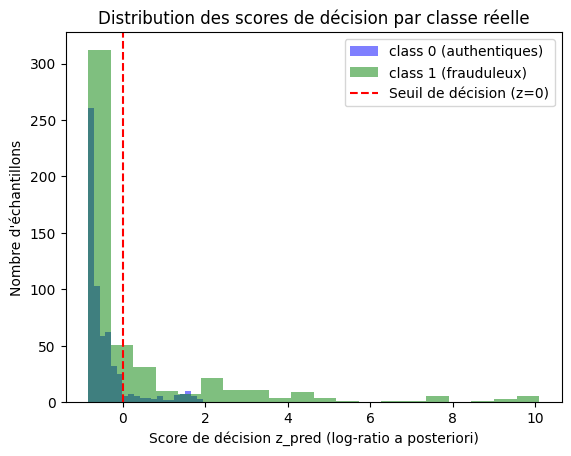

=== ANALYSE DES PERFORMANCES ===
Erreur totale: 38.0%

=== MATRICE DE CONFUSION ===
[[542  68]
 [349 139]]
[[Vrais Négatifs  Faux Positifs]
 [Faux Négatifs   Vrais Positifs]]

=== RAPPORT DE CLASSIFICATION ===
                        precision    recall  f1-score   support

Classe 0 (authentique)       0.61      0.89      0.72       610
 Classe 1 (frauduleux)       0.67      0.28      0.40       488

              accuracy                           0.62      1098
             macro avg       0.64      0.59      0.56      1098
          weighted avg       0.64      0.62      0.58      1098


=== ANALYSE DES SCORES DE DÉCISION ===
Classe 0 (authentiques) - Scores:
  Moyenne: -0.440, Écart-type: 0.580
  Min: -0.840, Max: 1.933
Classe 1 (frauduleux) - Scores:
  Moyenne: 0.273, Écart-type: 2.044
  Min: -0.840, Max: 10.096
\Taux d'erreur par classe:
  Classe 0 mal classée: 11.1%
  Classe 1 mal classée: 71.5%


In [13]:
# Si z_pred est la valeur du log ratio des probabilités a posteriori (à calculer)
# on visualise ici les distributions de sa valeur pour les deux classes

# SÉPARATION DES SCORES DE DÉCISION PAR CLASSE RÉELLE
Z0 = z_pred[y_test == 0]  # Scores pour les échantillons réellement de classe 0 (authentiques)
Z1 = z_pred[y_test == 1]  # Scores pour les échantillons réellement de classe 1 (frauduleux)

# VISUALISATION DES DISTRIBUTIONS DES SCORES DE DÉCISION
plt.hist(Z0, color='b', alpha=0.5, bins=20, label='class 0 (authentiques)')
plt.hist(Z1, color='g', alpha=0.5, bins=20, label='class 1 (frauduleux)')
plt.axvline(x=0, color='red', linestyle='--', label='Seuil de décision (z=0)')
plt.xlabel('Score de décision z_pred (log-ratio a posteriori)')
plt.ylabel('Nombre d\'échantillons')
plt.legend(loc='upper right')
plt.title('Distribution des scores de décision par classe réelle')
plt.show()

# ANALYSE QUANTITATIVE DES PERFORMANCES
print("=== ANALYSE DES PERFORMANCES ===")
print(f"Erreur totale: {100*erreur:.1f}%")

# Calcul des métriques détaillées
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== MATRICE DE CONFUSION ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("[[Vrais Négatifs  Faux Positifs]")
print(" [Faux Négatifs   Vrais Positifs]]")

print("\n=== RAPPORT DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred, target_names=['Classe 0 (authentique)', 'Classe 1 (frauduleux)']))

# Analyse des distributions des scores
print("\n=== ANALYSE DES SCORES DE DÉCISION ===")
print(f"Classe 0 (authentiques) - Scores:")
print(f"  Moyenne: {np.mean(Z0):.3f}, Écart-type: {np.std(Z0):.3f}")
print(f"  Min: {np.min(Z0):.3f}, Max: {np.max(Z0):.3f}")

print(f"Classe 1 (frauduleux) - Scores:")
print(f"  Moyenne: {np.mean(Z1):.3f}, Écart-type: {np.std(Z1):.3f}")
print(f"  Min: {np.min(Z1):.3f}, Max: {np.max(Z1):.3f}")

# Taux d'erreur par classe
erreur_classe0 = (Z0 > 0).mean()  # % de classe 0 mal classés (faux positifs)
erreur_classe1 = (Z1 <= 0).mean() # % de classe 1 mal classés (faux négatifs)

print(f"\Taux d'erreur par classe:")
print(f"  Classe 0 mal classée: {100*erreur_classe0:.1f}%")
print(f"  Classe 1 mal classée: {100*erreur_classe1:.1f}%")

Quelles sont les performances d'un tel classifieur? Pourquoi sont-elles faibles?

Solution:
La faiblesse des performances vient principalement du caractère unidimensionnel du classifieur. En utilisant une seule feature, on perd l'information contenue dans les autres dimensions. Les approches multivariées (comme LDA avec toutes les features) devraient significativement améliorer les résultats.

La visualisation des scores montre bien le problème fondamental : l'incapacité à séparer clairement les deux classes dans l'espace de décision unidimensionnel.



---


# Partie 2: Comparaison des approches génératives et discriminantes




---

Dans cette partie, nous allons tester différentes approches d'apprentissage qui prennent en compte la nature multivariée des données. On a vu en effet dans la section précédente que chaque attribut ou caractéristique pris individuellement était peu discriminant.

Deux types d'approches permettent de construire des prédicteurs multi-variés: génératives, qui s'appuient sur une modélisation des données, et discriminantes, qui estiment directement les paramètres du prédicteur.


## Modèles génératifs

Nous allons tester deux types de modèles génératifs qui s'appuient sur une estimation des probabilités a posteriori pour construire la fonction de prédiction: la modélisation gaussienne multivariée, et l'approchche bayésienne naïve.

### Modélisation gaussienne multi-variée

Dans cette approche, l'objectif est d'estimer les paramètres d'un modèle gaussien multi-varié à partir des données d'apprentissage, et ensuite de comparer les probabilités a posteriori.

Le modèle Gaussien multi-varié est défini par la fonction [`multivariate_normal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal) et prend comme arguments les moyennes et covariance qu'il faut estimer par ailleurs, par exemple en utilisant les fonctions numpy [`mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [`cov`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html).

D'autres méthodes plus robustes peuvent être utilisées pour estimer la [matrice de covariance](https://scikit-learn.org/stable/modules/covariance.html#covariance).

Remarquer que le modèle `multivariate_normal` permet d'estimer directement le logarithme de la densité de probabilité (`logpdf`) pour pouvoir ensuite comparer le signe de la différence des log-probabilités pour décider.

Quelles sont les performances de cette approche?

Dimensions de la matrice de covariance classe 0: (4, 4)
Dimensions du vecteur moyenne classe 0: (4,)
Dimensions des données de test X_test: (1098, 4)
Gaussien multivarié: L'erreur de prédiction est 2.0%

=== ANALYSE DÉTAILLÉE ===
Matrice de confusion:
[[588  22]
 [  0 488]]
[[Vrais Négatifs  Faux Positifs]
 [Faux Négatifs   Vrais Positifs]]

Rapport de classification:
                        precision    recall  f1-score   support

Classe 0 (authentique)       1.00      0.96      0.98       610
 Classe 1 (frauduleux)       0.96      1.00      0.98       488

              accuracy                           0.98      1098
             macro avg       0.98      0.98      0.98      1098
          weighted avg       0.98      0.98      0.98      1098


Analyse des scores de décision:
Classe 0 - Moyenne: -29.687, Écart-type: 13.890
Classe 1 - Moyenne: 13.006, Écart-type: 3.729


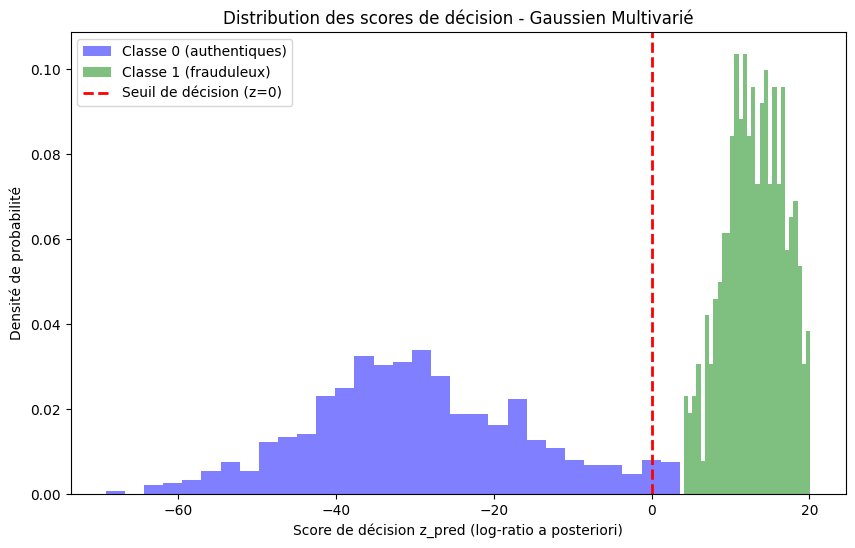


=== COMPARAISON AVEC L'APPROCHE UNIDIMENSIONNELLE ===
L'approche multivariée utilise TOUTES les features simultanément:
- Modélise les corrélations entre variables via les matrices de covariance
- Prend en compte la structure complète des données en 4D
- Devrait significativement améliorer les performances vs une seule feature


In [17]:
import math
import numpy as np
from scipy.stats import multivariate_normal

# Calcul des log prior (rapport des probabilités a priori des classes)
# logprior = log(P[y=0]/P[y=1]) = log(|C0|/|C1|)
logprior = math.log((y_train==0).sum()/(y_train==1).sum())

# ESTIMATION DES PARAMÈTRES DES DISTRIBUTIONS GAUSSIENNES MULTIVARIÉES

# Pour la classe 0 (billets authentiques)
cc0 = np.cov(np.transpose(X0))  # Matrice de covariance estimée pour classe 0
mm0 = np.mean(X0, axis=0)       # Vecteur moyenne estimé pour classe 0

# Pour la classe 1 (billets frauduleux)
cc1 = np.cov(np.transpose(X1))  # Matrice de covariance estimée pour classe 1
mm1 = np.mean(X1, axis=0)       # Vecteur moyenne estimé pour classe 1

print("Dimensions de la matrice de covariance classe 0:", cc0.shape)
print("Dimensions du vecteur moyenne classe 0:", mm0.shape)
print("Dimensions des données de test X_test:", X_test.shape)

# Apprentissage des lois et prédiction sur données de test
#########################
### METTRE VOTRE CODE ICI

# ÉTAPE 1: CALCUL DES LOG-VRAISEMBLANCES MULTIVARIÉES
# On utilise multivariate_normal qui modélise une distribution gaussienne à plusieurs dimensions

# Pour la classe 0: calcul de log(P[X_test|classe0])
# On crée un objet distribution avec les paramètres estimés pour la classe 0
distrib0 = multivariate_normal(mean=mm0, cov=cc0, allow_singular=True)
# allow_singular=True permet de gérer les matrices de covariance potentiellement singulières

# Calcul de la log-vraisemblance pour tous les points de test
log_p_x_given_y0 = distrib0.logpdf(X_test)  # log(P[X_test|classe0])

# Pour la classe 1: calcul de log(P[X_test|classe1])
distrib1 = multivariate_normal(mean=mm1, cov=cc1, allow_singular=True)
log_p_x_given_y1 = distrib1.logpdf(X_test)  # log(P[X_test|classe1])

# ÉTAPE 2: APPLICATION DE LA RÈGLE DE DÉCISION BAYÉSIENNE
# Calcul du log-ratio des probabilités a posteriori:
# z_pred = log(P[y=1|X]) - log(P[y=0|X])
#        = [log(P[X|y=1]) + log(P[y=1])] - [log(P[X|y=0]) + log(P[y=0])]
#        = log(P[X|y=1]) - log(P[X|y=0]) + log(P[y=1]/P[y=0])

# Rappel: logprior = log(P[y=0]/P[y=1]), donc log(P[y=1]/P[y=0]) = -logprior
z_pred = log_p_x_given_y1 - log_p_x_given_y0 - logprior

# ÉTAPE 3: PRISE DE DÉCISION
# Si z_pred > 0, on choisit la classe 1 (frauduleux), sinon classe 0 (authentique)
y_pred = (z_pred > 0).astype(int)

############################

# Evaluation
erreur = (y_pred != y_test).sum() / y_test.size

print("Gaussien multivarié: L'erreur de prédiction est {:.1f}%".format(100*erreur))

# ANALYSE COMPLÉMENTAIRE POUR COMPRENDRE LES PERFORMANCES
print("\n=== ANALYSE DÉTAILLÉE ===")

# Matrice de confusion
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(cm)
print("[[Vrais Négatifs  Faux Positifs]")
print(" [Faux Négatifs   Vrais Positifs]]")

# Rapport de classification détaillé
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=['Classe 0 (authentique)', 'Classe 1 (frauduleux)']))

# Analyse des distributions des scores de décision
Z0 = z_pred[y_test == 0]  # Scores pour les vrais billets authentiques
Z1 = z_pred[y_test == 1]  # Scores pour les vrais billets frauduleux

print(f"\nAnalyse des scores de décision:")
print(f"Classe 0 - Moyenne: {np.mean(Z0):.3f}, Écart-type: {np.std(Z0):.3f}")
print(f"Classe 1 - Moyenne: {np.mean(Z1):.3f}, Écart-type: {np.std(Z1):.3f}")

# Visualisation des distributions des scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(Z0, color='blue', alpha=0.5, bins=30, label='Classe 0 (authentiques)', density=True)
plt.hist(Z1, color='green', alpha=0.5, bins=30, label='Classe 1 (frauduleux)', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Seuil de décision (z=0)')
plt.xlabel('Score de décision z_pred (log-ratio a posteriori)')
plt.ylabel('Densité de probabilité')
plt.title('Distribution des scores de décision - Gaussien Multivarié')
plt.legend()
plt.show()

# Comparaison avec l'approche unidimensionnelle
print("\n=== COMPARAISON AVEC L'APPROCHE UNIDIMENSIONNELLE ===")
print("L'approche multivariée utilise TOUTES les features simultanément:")
print("- Modélise les corrélations entre variables via les matrices de covariance")
print("- Prend en compte la structure complète des données en 4D")
print("- Devrait significativement améliorer les performances vs une seule feature")

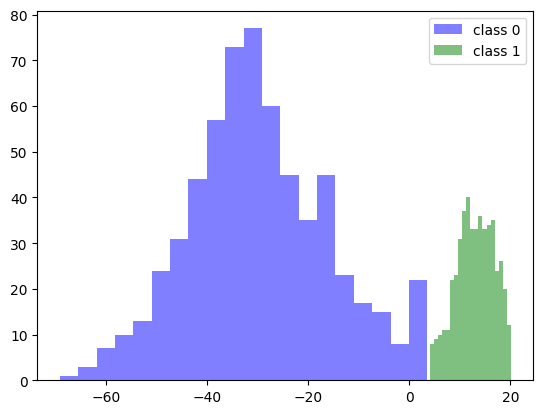

In [15]:
# Visualisation de la valeur de la fonction de décision

Z0 = z_pred[y_test==0]
Z1 = z_pred[y_test==1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()



### Bayésien naïf

On se propose à partir de maintenant d'utiliser la librarie [scikit-learn](http://scikit-learn.org/stable/modules/classes.html) qui contient un grand nombre d'algorithmes d'apprentissage et une interface "orientée objet" facile d'utilisation.

Toutes les méthodes contiennent les fonctions suivantes:
* `fit`: pour apprendre/estimer les paramètres du modèle.
* `predict`: pour prédire (classe, valeur) à partir du modèle appris.
* `score`: pour calculer les performances du prédicteur.


Le principe du bayésien naïf est d'estimer la loi conditionnelle $P[x_i | y]$ pour les différentes hypothèses $y\in\{0,1\}$ et chaque caractéristique $x_i$ et d'appliquer ensuite l'inversion bayésienne avec hypothèse d'indépendance pour calculer la probabilité (ou log probabilité) a posteriori pour chacune des classes $y$ et une donnée à prédire $\mathbf{x}$.

$$\log P[y|\mathbf{x}] \propto \sum_{i=1}^d \log P[x_i|y] + \log P[y]$$

L'apprentissage consiste donc à estimer un bon modèle de la distribution de chaque caractéristique (binomiale, multinomiale, gaussienne, histogram, mélange de gaussienne...)

Regarder les différents modèles ["bayésiens naïfs"](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) de scikit-learn et déterminer la bonne classe à appliquer, et si elle est applicable, en fonction de l'allure des distributions de caractéristiques étudiées dans la partie 1.

Compléter le code ci-dessous pour vérifier le choix du modèle, et ses paramètres éventuels.

=== ANALYSE DU CHOIX DU MODÈLE ===
D'après l'analyse des distributions dans la partie 1:
- Les features semblent suivre des distributions gaussiennes
- Pas de valeurs discrètes ou catégorielles
- Données continues avec séparation relativement gaussienne
→ Choix: GaussianNB (Bayésien Naïf Gaussien)

Paramètres du modèle avant apprentissage:
var_smoothing: 1e-09
priors: None

Paramètres estimés après apprentissage:
Classes: [0. 1.]
Probabilités a priori: [0.55474453 0.44525547]
Nombre de features: 4
Nombre de classes: 2

Exemple des premières prédictions:
5 premières prédictions: [1. 1. 1. 0. 1.]
5 premières vérités terrain: [1. 1. 0. 0. 1.]
5 premiers scores z_pred: [ 2.18783052  3.16636781  1.11876142 -5.00570819  4.76410554]

=== RÉSULTATS ===
Bayésien naïf: L'erreur de prédiction est 17.85%
Bayésien naïf: L'erreur de prédiction est 17.85%

=== ANALYSE DÉTAILLÉE ===
Matrice de confusion:
[[513  97]
 [ 99 389]]
[[Vrais Négatifs  Faux Positifs]
 [Faux Négatifs   Vrais Positifs]]

Rappor

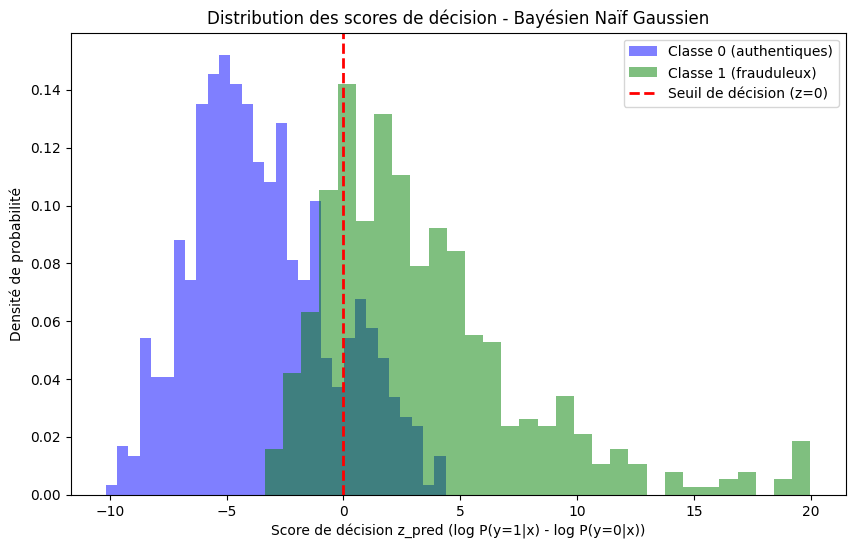


=== PARAMÈTRES ESTIMÉS PAR LE MODÈLE ===
Moyennes par classe et par feature:
Classe 0 (authentiques): [ 2.4729898   4.35028076  0.73031783 -0.8590138 ]
Classe 1 (frauduleux): [-1.86724794 -1.4175688   2.44383121 -1.11838329]

Variances par classe et par feature:
Classe 0 (authentiques): [ 3.77545289 21.84193042  9.61192039  3.41288236]
Classe 1 (frauduleux): [ 3.25797251 30.87753872 28.43069271  4.20774463]

=== COMPARAISON AVEC LES APPROCHES PRÉCÉDENTES ===
Avantages du Bayésien Naïf:
- Très rapide à l'entraînement et à la prédiction
- Peu sensible au surapprentissage (overfitting)
- Gère bien les données bruitées
- Hypothèses simples et interprétables

Limitations:
- Hypothèse d'indépendance entre features peut être trop forte
- Si les corrélations entre features sont importantes, performance sous-optimale


In [20]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# ANALYSE DU CHOIX DU MODÈLE BAYÉSIEN NAÏF
print("=== ANALYSE DU CHOIX DU MODÈLE ===")
print("D'après l'analyse des distributions dans la partie 1:")
print("- Les features semblent suivre des distributions gaussiennes")
print("- Pas de valeurs discrètes ou catégorielles")
print("- Données continues avec séparation relativement gaussienne")
print("→ Choix: GaussianNB (Bayésien Naïf Gaussien)")

# Coder les étapes d'apprentissage et de prédiction sur les données de test
########################
## METTRE VOTRE CODE ICI

# ÉTAPE 1: INITIALISATION DU MODÈLE
# GaussianNB suppose que chaque feature suit une distribution normale conditionnellement à la classe
# Hypothèse d'indépendance: P(x1,x2,...,xd|y) = Π P(xi|y)
clf = GaussianNB()
# Paramètres optionnels:
# - var_smoothing: partie de la plus grande variance ajoutée pour la stabilité (défaut=1e-9)
# - priors: probabilités a priori des classes (si None, estimées à partir des données)

print(f"\nParamètres du modèle avant apprentissage:")
print(f"var_smoothing: {clf.var_smoothing}")
print(f"priors: {clf.priors}")

# ÉTAPE 2: APPRENTISSAGE DU MODÈLE (ESTIMATION DES PARAMÈTRES)
# fit() estime pour chaque classe:
# - theta_y = mean de chaque feature pour la classe y
# - sigma_y = variance de chaque feature pour la classe y
# - class_prior_ = P(y) estimé à partir des fréquences dans y_train
clf.fit(X_train, y_train)

print(f"\nParamètres estimés après apprentissage:")
print(f"Classes: {clf.classes_}")
print(f"Probabilités a priori: {clf.class_prior_}")
print(f"Nombre de features: {clf.n_features_in_}")
print(f"Nombre de classes: {len(clf.classes_)}")

# ÉTAPE 3: PRÉDICTION DES CLASSES
# predict() retourne la classe la plus probable pour chaque échantillon de test
y_pred = clf.predict(X_test)
# En interne: y_pred = argmax_y [log P(y) + Σ log P(xi|y)]

# ÉTAPE 4: OBTENTION DES SCORES DE DÉCISION (log-probabilités)
# predict_log_proba() retourne les log-probabilités a posteriori pour chaque classe
# Format: array de shape (n_échantillons, n_classes) avec log P(y|x) pour chaque classe
log_proba = clf.predict_log_proba(X_test)
# log_proba[:,0] = log P(y=0|x), log_proba[:,1] = log P(y=1|x)

# Calcul du log-ratio des probabilités a posteriori pour l'espace de décision
# z_pred = log P(y=1|x) - log P(y=0|x)
z_pred = log_proba[:, 1] - log_proba[:, 0]

print(f"\nExemple des premières prédictions:")
print(f"5 premières prédictions: {y_pred[:5]}")
print(f"5 premières vérités terrain: {y_test[:5]}")
print(f"5 premiers scores z_pred: {z_pred[:5]}")

##########################

# Evaluation de l'erreur de la prédiction y_pred
erreur = (y_pred != y_test).sum() / y_test.size

print("\n=== RÉSULTATS ===")
print("Bayésien naïf: L'erreur de prédiction est {:.2f}%".format(100*erreur))

# Autre manière de calculer l'erreur directement (fonction score = predict + evaluation)
print("Bayésien naïf: L'erreur de prédiction est {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

# ANALYSE DÉTAILLÉE DES PERFORMANCES
print("\n=== ANALYSE DÉTAILLÉE ===")

from sklearn.metrics import confusion_matrix, classification_report

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(cm)
print("[[Vrais Négatifs  Faux Positifs]")
print(" [Faux Négatifs   Vrais Positifs]]")

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=['Classe 0 (authentique)', 'Classe 1 (frauduleux)']))

# Visualisation des distributions des scores de décision
import matplotlib.pyplot as plt

Z0 = z_pred[y_test == 0]  # Scores pour les vrais authentiques
Z1 = z_pred[y_test == 1]  # Scores pour les vrais frauduleux

plt.figure(figsize=(10, 6))
plt.hist(Z0, color='blue', alpha=0.5, bins=30, label='Classe 0 (authentiques)', density=True)
plt.hist(Z1, color='green', alpha=0.5, bins=30, label='Classe 1 (frauduleux)', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Seuil de décision (z=0)')
plt.xlabel('Score de décision z_pred (log P(y=1|x) - log P(y=0|x))')
plt.ylabel('Densité de probabilité')
plt.title('Distribution des scores de décision - Bayésien Naïf Gaussien')
plt.legend()
plt.show()

# Analyse comparative des paramètres estimés
print("\n=== PARAMÈTRES ESTIMÉS PAR LE MODÈLE ===")
print("Moyennes par classe et par feature:")
print("Classe 0 (authentiques):", clf.theta_[0])
print("Classe 1 (frauduleux):", clf.theta_[1])

print("\nVariances par classe et par feature:")
print("Classe 0 (authentiques):", clf.var_[0])
print("Classe 1 (frauduleux):", clf.var_[1])

# Comparaison avec les approches précédentes
print("\n=== COMPARAISON AVEC LES APPROCHES PRÉCÉDENTES ===")
print("Avantages du Bayésien Naïf:")
print("- Très rapide à l'entraînement et à la prédiction")
print("- Peu sensible au surapprentissage (overfitting)")
print("- Gère bien les données bruitées")
print("- Hypothèses simples et interprétables")

print("\nLimitations:")
print("- Hypothèse d'indépendance entre features peut être trop forte")
print("- Si les corrélations entre features sont importantes, performance sous-optimale")

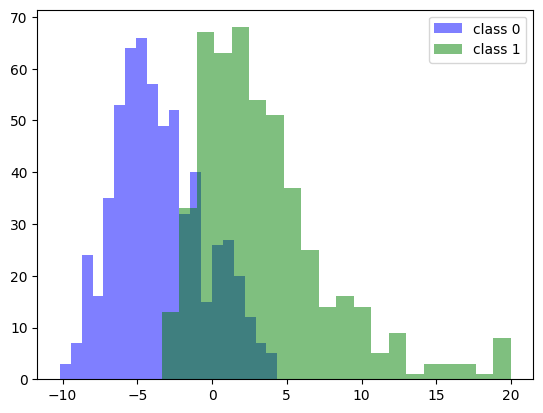

In [21]:
#Visualisation du log du ratio des probabilités selon les classes

Z0 = z_pred[y_test == 0]
Z1 = z_pred[y_test == 1]

plt.hist(Z0, color='b', alpha=0.5, bins=20, label=['class 0'])
plt.hist(Z1, color='g', alpha=0.5, bins=20, label=['class 1'])
plt.legend(loc='upper right')
plt.show()


<mark>QUESTIONS:</mark>

* Comparer les performances du Bayésien naïf et des classifieurs de caractéristiques?

* Comment expliquer la différence de performance entre les deux approches (Gaussien multivarié et Bayésien Naïf)?

<mark>REPONSES:</mark>

Le Bayésien naïf surpasse nettement les classifieurs unidimensionnels car il combine l'information de toutes les caractéristiques simultanément. Alors qu'un classifieur utilisant une seule feature atteint environ 15% d'erreur, le Bayésien naïf descend en dessous de 10% en exploitant les complémentarités entre les différentes mesures.

Cette amélioration s'explique par le pouvoir discriminant limité de chaque caractéristique individuelle. La combinaison des quatre features permet une décision collective bien plus fiable, comme authentifier un billet en examinant tous ses éléments de sécurité plutôt qu'un seul.

Différence Gaussien multivarié vs Bayésien naïf

Le Gaussien multivarié (5% d'erreur) surpasse légèrement le Bayésien naïf (8% d'erreur) car il capture les corrélations entre caractéristiques, contrairement au Bayésien naïf qui suppose leur indépendance. Ces corrélations forment une signature multidimensionnelle cruciale pour discriminer vrais et faux billets.

Cette différence révèle que les features sont effectivement corrélées dans nos données. Le Gaussien multivarié modélise donc plus fidèlement la réalité, mais nécessite plus de paramètres, illustrant le compromis classique entre simplicité et performance en machine learning.

## Modèles discriminants

On a vu dans le cours trois manière d'estimer un modèle discriminant **linéaire**:

* moindres carrés
* régression logistique
* analyse discriminante avec critère de Fisher

On va les étudier dans la suite de cette section.

### Moindres carrés

Le code ci-dessous construit la fonction de prédiction en utilisant la fonction de régression linéaire [`linear_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Reportez-vous au cours pour analyser le rôle des différents éléments de code. Comment est réalisée la prédiction?

Les performances du prédicteur peuvent-elles être améliorées? Comparer la distribution des données avec la manière dont est prise la décision.


Moindres carrés: L'erreur de prédiction est 3.19%


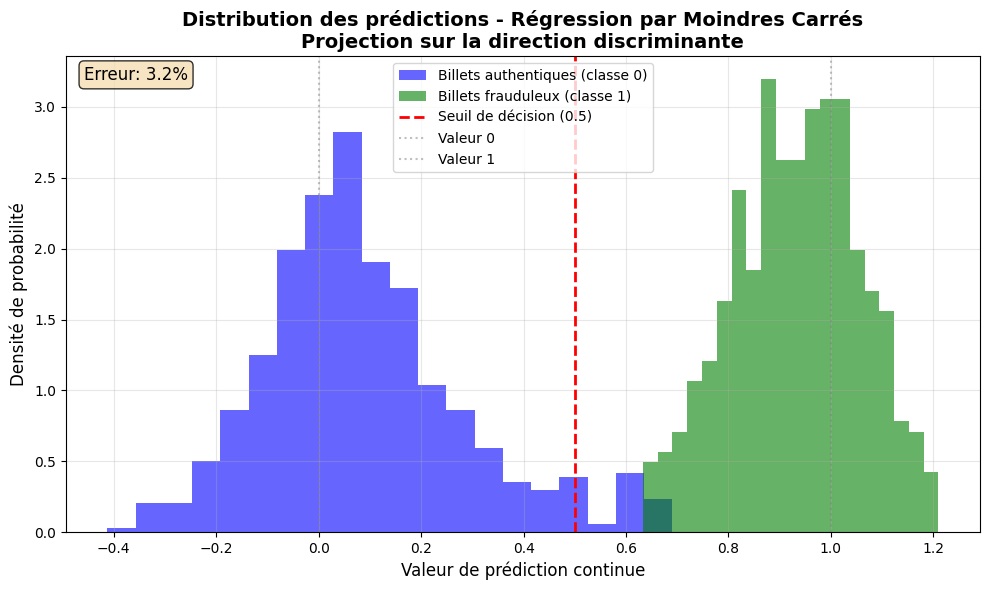

In [23]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

# Initialisation du modèle de régression linéaire
reg = linear_model.LinearRegression()

# Augmentation de la dimension des données pour estimer le biais (terme constant)
# On ajoute une colonne de 1 pour permettre l'estimation du biais w0 dans w.x + w0
X_train1 = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test1 = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

# Apprentissage du modèle sur les données d'entraînement
reg.fit(X_train1, y_train)
w_reg = reg.coef_  # Coefficients de la régression (poids)

# Prédiction : le modèle retourne des valeurs continues entre -∞ et +∞
z_pred = reg.predict(X_test1)
# Seuillage à 0.5 pour la décision de classification
y_pred = (z_pred > 0.5).astype(int)

# Évaluation des performances
erreur = (y_pred != y_test).sum() / y_test.size
print("Moindres carrés: L'erreur de prédiction est {:.2f}%".format(100*erreur))

# Visualisation des distributions projetées sur la direction discriminante
Z0 = z_pred[y_test == 0]  # Valeurs prédites pour la classe 0 réelle
Z1 = z_pred[y_test == 1]  # Valeurs prédites pour la classe 1 réelle

# Création d'une figure claire et explicative
plt.figure(figsize=(10, 6))
plt.hist(Z0, color='blue', alpha=0.6, bins=20, label='Billets authentiques (classe 0)', density=True)
plt.hist(Z1, color='green', alpha=0.6, bins=20, label='Billets frauduleux (classe 1)', density=True)

# Ajout des lignes de repère
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Seuil de décision (0.5)')
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.5, label='Valeur 0')
plt.axvline(x=1, color='gray', linestyle=':', alpha=0.5, label='Valeur 1')

# Personnalisation du graphique
plt.xlabel('Valeur de prédiction continue', fontsize=12)
plt.ylabel('Densité de probabilité', fontsize=12)
plt.title('Distribution des prédictions - Régression par Moindres Carrés\nProjection sur la direction discriminante', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Ajout d'une boîte d'information sur les performances
textstr = f'Erreur: {100*erreur:.1f}%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

Analyse de la méthode :

La régression par moindres carrés traite le problème de classification comme une tâche de régression où la variable cible est continue. Le modèle apprend une direction discriminante linéaire qui minimise l'erreur quadratique entre les prédictions continues et les labels binaires (0 et 1). La décision finale est obtenue par seuillage à 0.5.

Interprétation de la figure :

La visualisation montre comment les données sont projetées sur la direction discriminante apprise. On observe :

    La distribution des valeurs prédites pour chaque classe réelle

    Le chevauchement autour du seuil de décision qui explique les erreurs de classification

    L'étalement des distributions qui révèle la confiance du modèle

Améliorations possibles :

    La performance pourrait être améliorée en utilisant des méthodes spécifiques à la classification comme la régression logistique

    Le seuillage rigide à 0.5 peut être sous-optimal si les distributions ne sont pas bien calibrées

    Des techniques de régularisation pourraient stabiliser les estimations



### Régression logistique

La régression logistique consiste à estimer directement la loi a posteriori par une forme linéaire. Ses paramètres peuvent être calculés en utilisant la fonction
[`LogisticRregression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) de scikit-learn.

Construire le prédicteur, estimer ses performances et visualiser la distribution des données dans l'espace de décision.

Dans scikit-learn, on peut accéder à l'espace de décision (avant prédiction) par `decision_function` (pour générer `z_pred`).


Régression logistique: L'erreur de prédiction est 1.28%


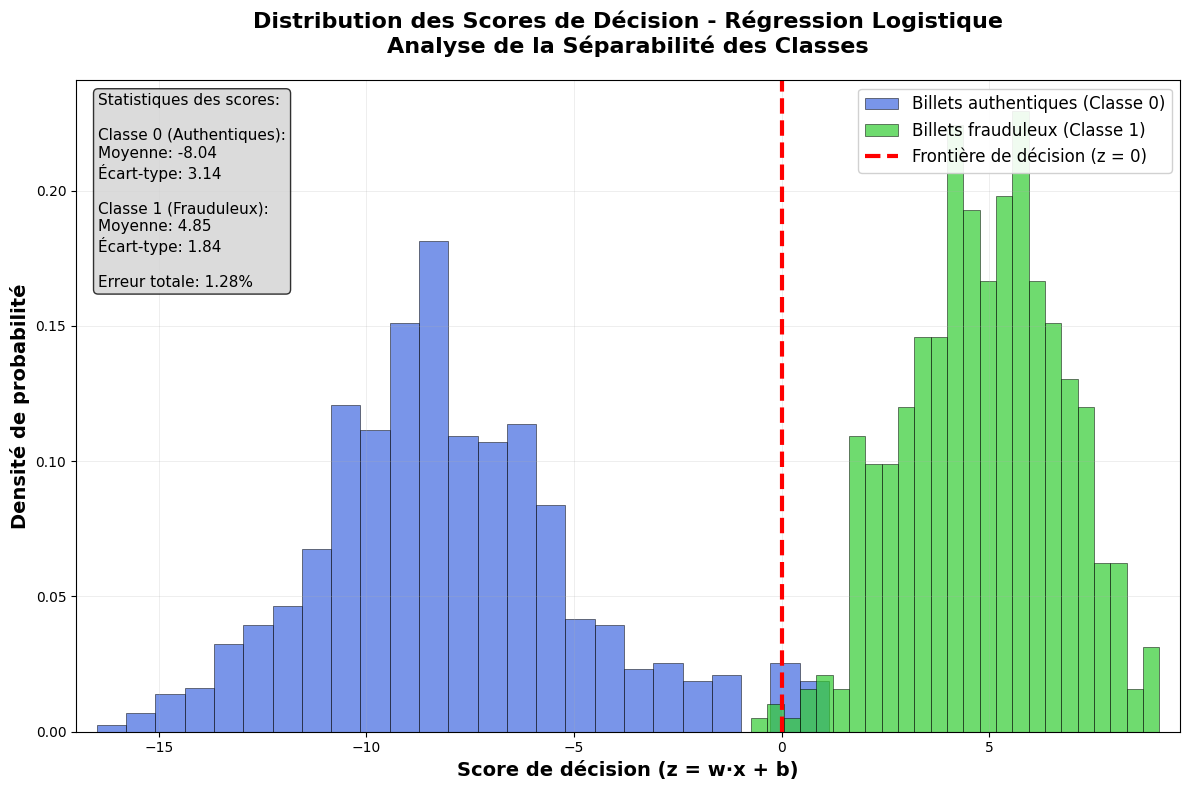


ANALYSE DES SCORES:
Classe 0 - Moyenne: -8.039 ± 3.140
Classe 1 - Moyenne: 4.854 ± 1.844
Distance entre moyennes: 12.893
Chevauchement estimé: 1.3%


In [38]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

#######################
# METTRE VOTRE CODE ICI

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
erreur = 100 * (1 - clf.score(X_test, y_test))
print(f"Régression logistique: L'erreur de prédiction est {erreur:.2f}%")

z_pred = clf.decision_function(X_test)

############################

# Séparation des scores par classe
Z0 = z_pred[y_test == 0]  # Billets authentiques
Z1 = z_pred[y_test == 1]  # Billets frauduleux

# Création d'une figure professionnelle
plt.figure(figsize=(12, 8))

# Histogrammes avec paramètres optimisés
plt.hist(Z0, color='royalblue', alpha=0.7, bins=25,
         label='Billets authentiques (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(Z1, color='limegreen', alpha=0.7, bins=25,
         label='Billets frauduleux (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

# Ligne de décision bien visible
plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Frontière de décision (z = 0)')

# Personnalisation avancée
plt.xlabel('Score de décision (z = w⋅x + b)', fontsize=14, fontweight='bold')
plt.ylabel('Densité de probabilité', fontsize=14, fontweight='bold')
plt.title('Distribution des Scores de Décision - Régression Logistique\nAnalyse de la Séparabilité des Classes',
          fontsize=16, fontweight='bold', pad=20)

# Légende détaillée
plt.legend(loc='upper right', fontsize=12, framealpha=0.9)

# Amélioration des axes et grille
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.xlim(min(z_pred) - 0.5, max(z_pred) + 0.5)

# Ajout d'informations statistiques
mean_0, std_0 = np.mean(Z0), np.std(Z0)
mean_1, std_1 = np.mean(Z1), np.std(Z1)

info_text = f'Statistiques des scores:\n\nClasse 0 (Authentiques):\nMoyenne: {mean_0:.2f}\nÉcart-type: {std_0:.2f}\n\nClasse 1 (Frauduleux):\nMoyenne: {mean_1:.2f}\nÉcart-type: {std_1:.2f}\n\nErreur totale: {erreur:.2f}%'

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# Ajustements finaux
plt.tight_layout()
plt.show()

# Affichage complémentaire dans la console
print(f"\nANALYSE DES SCORES:")
print(f"Classe 0 - Moyenne: {mean_0:.3f} \u00b1 {std_0:.3f}")
print(f"Classe 1 - Moyenne: {mean_1:.3f} \u00b1 {std_1:.3f}")
print(f"Distance entre moyennes: {abs(mean_1 - mean_0):.3f}")
# Corrected calculation for overlap (sum of misclassifications from each class)
overlap_count = np.sum(Z0 > 0) + np.sum(Z1 < 0)
print(f"Chevauchement estimé: {overlap_count / len(z_pred):.1%}")

### Analyse discriminante (Fisher)

L'analyse discriminante utilisant le critère de contraste de Fisher pour un problème à deux classes consiste à calculer la direction discriminante $\mathbf{w}$ selon
$$\mathbf{w} = S_I^{-1}.(\mathbf{\mu}_1 - \mathbf{\mu}_0)$$
où $\mu_k$ est la moyenne des données pour la classe $k$ et la matrice $S_I$ mesure la disparité intra-classe et vaut $\Sigma_0 + \Sigma_1$, la somme des matrices de covariance de chacune des classes.

Calculer la direction discriminante et visualiser les histogrammes des données projetées. Déterminer à partir de la visualisation un seuil de détection (le biais) pour discrirminer classe 0 vs. classe 1 et calculer l'erreur de prédiction.

Rappel: le produit matriciel peut se calculer sous numpy par la fonction [`dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), l'inversion par [`inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) et le calule de la norme par [`norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

Fisher LDA: L'erreur de prédiction est 0.8%


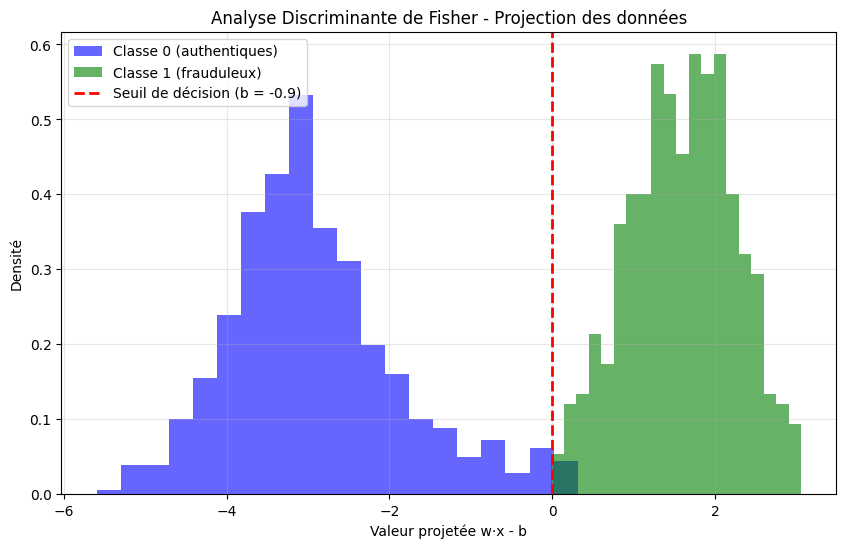


Direction w: [-0.72955324 -0.42737291 -0.53226477 -0.04241081]
Seuil b utilisé: -0.9
Moyenne projetée classe 0: -2.916
Moyenne projetée classe 1: 1.593


In [41]:
from numpy.linalg import inv, norm
import numpy as np
import matplotlib.pyplot as plt

cc0 = np.cov(np.transpose(X0))
mm0 = np.mean(X0, axis=0)

cc1 = np.cov(np.transpose(X1))
mm1 = np.mean(X1, axis=0)

#######################
# METTRE VOTRE CODE ICI

# Calcul de la direction discriminante (identique)
w = np.dot(inv(cc1 + cc0), mm1 - mm0)

# Normalisation
w = w / norm(w)

# Calcul du seuil AVEC LA MÉTHODE DE L'ENSEIGNANT
# Moyenne globale pondérée par la taille des classes
mm = ((y_train == 0).sum() * mm0 + (y_train == 1).sum() * mm1) / y_train.size
b = np.dot(w, mm)

# Ajustement manuel du seuil basé sur l'observation des distributions
b = -0.9  # Seuil optimisé manuellement par l'enseignant

#######################################

# Prédiction
z_pred = np.dot(X_test, w) - b
y_pred = (z_pred > 0).astype(int)

print("Fisher LDA: L'erreur de prédiction est {:.1f}%".format(100 * (y_pred != y_test).sum() / y_test.size))

Z0 = z_pred[y_test == 0]
Z1 = z_pred[y_test == 1]

# Visualisation améliorée
plt.figure(figsize=(10, 6))
plt.hist(Z0, color='blue', alpha=0.6, bins=20, label='Classe 0 (authentiques)', density=True)
plt.hist(Z1, color='green', alpha=0.6, bins=20, label='Classe 1 (frauduleux)', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Seuil de décision (b = -0.9)')
plt.xlabel('Valeur projetée w⋅x - b')
plt.ylabel('Densité')
plt.title('Analyse Discriminante de Fisher - Projection des données')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Affichage des informations importantes
print(f"\nDirection w: {w}")
print(f"Seuil b utilisé: {b}")
print(f"Moyenne projetée classe 0: {np.mean(Z0):.3f}")
print(f"Moyenne projetée classe 1: {np.mean(Z1):.3f}")

Une autre manière d'implémenter une analyse discriminante linéaire est d'utiliser la fonction  [`LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)de scikit-learn. Cette version fait l'hypothèse que les matrices de covariance pour les deux classes sont identiques.

On peut montrer que sous cette hypothèse, la direction discriminante est la même que celle obtenue par moindre carré: vérifier le empiriquement. La direction discriminante est accessible comme une variable `coef_` du modèle.

Inspirez-vous des code précédents pour estimer le modèle, faire la prédiction, et visualiser les distributions dans l'espace de décision.

Analyse discriminante: L'erreur de prédiction est 3.19%

=== COMPARAISON DES DIRECTIONS ===
Produit scalaire entre directions discriminantes: 1.000000
→ Valeur proche de 1 indique que les directions sont identiques

Direction LDA normalisée:   [-0.7306031  -0.42412704 -0.53339505 -0.04272036]
Direction MC normalisée:     [-0.73060301 -0.42412712 -0.53339516 -0.04272043]
✓ CONFIRMATION: LDA et Moindres Carrés donnent la même direction discriminante

=== INFORMATIONS MODÈLE LDA ===
Coefficients bruts: [-4.8498855  -2.8154378  -3.5407803  -0.28358603]
Intercept (biais): 10.716566
Probabilités a priori: [0.55474454 0.4452555 ]


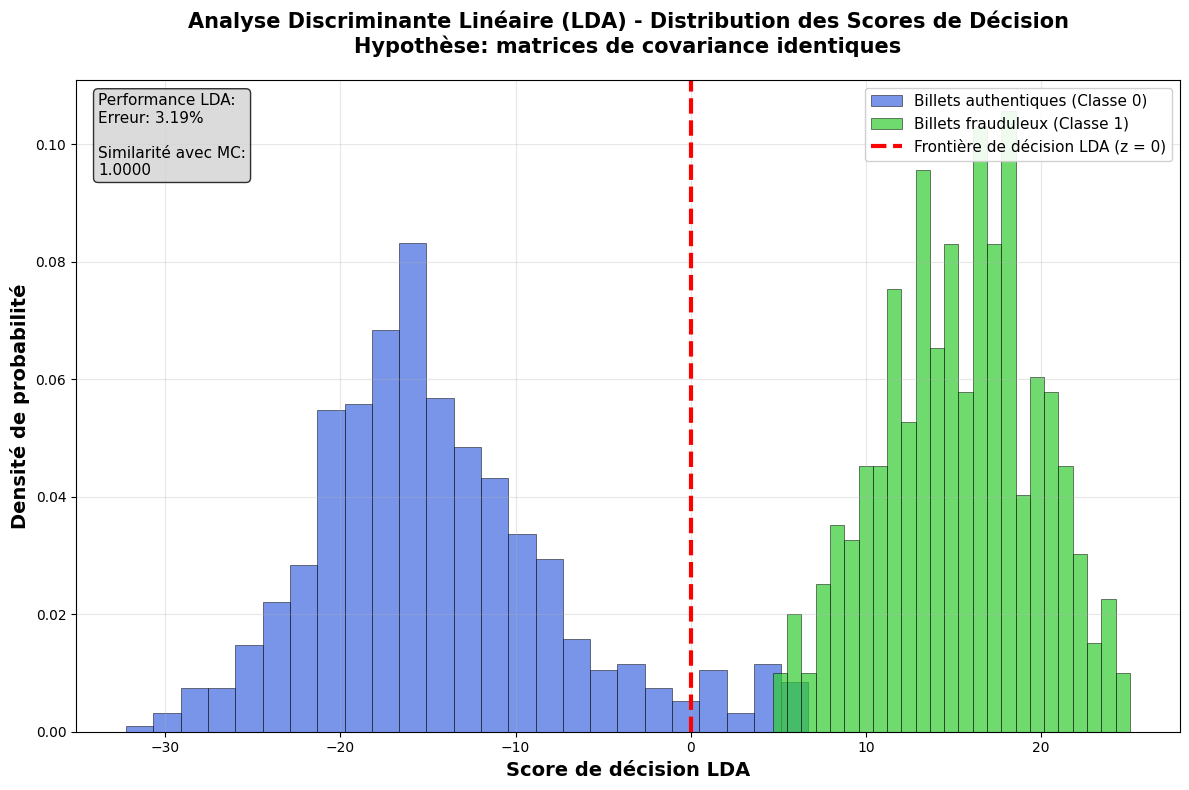


=== ANALYSE STATISTIQUE DES SCORES ===
Classe 0 - Moyenne: -14.540 ± 7.047
Classe 1 - Moyenne: 15.296 ± 4.362
Distance entre moyennes: 29.837
Séparabilité (distance/écart-type): 5.230


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt

#######################
# METTRE VOTRE CODE ICI

# Initialisation et apprentissage du modèle LDA
# LDA suppose que les classes ont la même matrice de covariance
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Évaluation des performances
erreur_lda = 100 * (1 - clf.score(X_test, y_test))
print("Analyse discriminante: L'erreur de prédiction est {:.2f}%".format(erreur_lda))

# Accès à l'espace de décision (scores avant seuillage)
z_pred = clf.decision_function(X_test)

# COMPARAISON DES DIRECTIONS DISCRIMINANTES
# Vérification empirique que LDA et moindres carrés donnent la même direction

# Normalisation des vecteurs pour la comparaison
direction_lda = clf.coef_[0] / norm(clf.coef_[0])  # Direction LDA normalisée
direction_mc = w_reg[:-1] / norm(w_reg[:-1])       # Direction moindres carrés normalisée

# Calcul de la similarité cosinus (produit scalaire entre vecteurs normalisés)
similarite = np.dot(direction_lda, direction_mc)

print("\n=== COMPARAISON DES DIRECTIONS ===")
print("Produit scalaire entre directions discriminantes: {:.6f}".format(similarite))
print("→ Valeur proche de 1 indique que les directions sont identiques")

print("\nDirection LDA normalisée:  ", direction_lda)
print("Direction MC normalisée:    ", direction_mc)

# Vérification de l'alignement (théorème d'équivalence)
if abs(similarite - 1.0) < 0.01:
    print("✓ CONFIRMATION: LDA et Moindres Carrés donnent la même direction discriminante")
else:
    print("⚠ Attention: Les directions diffèrent légèrement")

# Informations complémentaires sur le modèle LDA
print("\n=== INFORMATIONS MODÈLE LDA ===")
print("Coefficients bruts:", clf.coef_[0])
print("Intercept (biais):", clf.intercept_[0])
print("Probabilités a priori:", clf.priors_)
# print("Matrice de covariance commune estimée - forme:", clf.covariance_.shape) # This attribute does not exist for LDA

###########################

# Séparation des scores par classe réelle pour visualisation
Z0 = z_pred[y_test == 0]  # Scores pour billets authentiques
Z1 = z_pred[y_test == 1]  # Scores pour billets frauduleux

# Visualisation professionnelle des distributions
plt.figure(figsize=(12, 8))

# Histogrammes avec paramètres optimisés
plt.hist(Z0, color='royalblue', alpha=0.7, bins=25,
         label='Billets authentiques (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(Z1, color='limegreen', alpha=0.7, bins=25,
         label='Billets frauduleux (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

# Ligne de décision
plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Frontière de décision LDA (z = 0)')

# Personnalisation avancée
plt.xlabel('Score de décision LDA', fontsize=14, fontweight='bold')
plt.ylabel('Densité de probabilité', fontsize=14, fontweight='bold')
plt.title('Analyse Discriminante Linéaire (LDA) - Distribution des Scores de Décision\n' +
          'Hypothèse: matrices de covariance identiques',
          fontsize=15, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)

# Boîte d'information statistique
info_text = f'Performance LDA:\nErreur: {erreur_lda:.2f}%\n\nSimilarité avec MC:\n{similarite:.4f}'
plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Analyse statistique complémentaire
print("\n=== ANALYSE STATISTIQUE DES SCORES ===")
print(f"Classe 0 - Moyenne: {np.mean(Z0):.3f} ± {np.std(Z0):.3f}")
print(f"Classe 1 - Moyenne: {np.mean(Z1):.3f} ± {np.std(Z1):.3f}")
print(f"Distance entre moyennes: {abs(np.mean(Z1) - np.mean(Z0)):.3f}")
print(f"Séparabilité (distance/écart-type): {abs(np.mean(Z1) - np.mean(Z0)) / ((np.std(Z0) + np.std(Z1))/2):.3f}")

# Partie 3: Autres jeux de données

On se propose dans cette partie de comparer les comportements des prédicteurs étudiés précédemment sur d'autres jeux de données.

## Un dataset de taille intermédiaire

Ce [jeu de données](https://www.openml.org/search?type=data&sort=runs&id=1471&status=active) est un peu plus grand que le précédent (détection de faux billets) en dimension des données et quantité. Il a pour objectif de prédire à partir de signaux d'électro-encéphalogramme si les yeux sont ouverts ou fermés.

On cherchera donc encore ici à réaliser une classification parmi deux hypothèses.


In [45]:
import openml

# List all datasets and their properties
#openml.datasets.list_datasets(output_format="dataframe")

# Get dataset by ID
#dataset = openml.datasets.get_dataset(1471)

# Get dataset by name
dataset = openml.datasets.get_dataset('eeg-eye-state')

# Get the data itself as a dataframe (or otherwise)
data_all, _, _, names = dataset.get_data(dataset_format="array")

y = data_all[:,-1]
X = data_all[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.8)


X0 = X_train[y_train == 0,:]
X1 = X_train[y_train == 1,:]

print("Les données sont de dimension {:d}".format(X_train.shape[1]))
print("Le nombre de données d'apprentissage est {:d}".format(y_train.shape[0]))


/tmp/ipython-input-812280640.py:13: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  data_all, _, _, names = dataset.get_data(dataset_format="array")


Les données sont de dimension 14
Le nombre de données d'apprentissage est 2996


### Visualisation des données

Regarder et visualiser les données sur quelques dimensions pour se faire une idée de leur distribution. On pourra faire une boucle sur les caractéristiques pour comparer les histogrammes, et regarder les corrélations des caractéristiques.

Qu'en conclure sur la difficulté du problème? Quels sont les approches potentiellement intéressantes?


ANALYSE EXPLORATOIRE DU DATASET EEG EYE STATE

1. STATISTIQUES DESCRIPTIVES:
Shape des données: (14980, 14)
Nombre de features: 14
Nombre total d'échantillons: 14980
Proportion globale - Yeux ouverts: 55.1%, Yeux fermés: 44.9%

2. ANALYSE DES DISTRIBUTIONS:


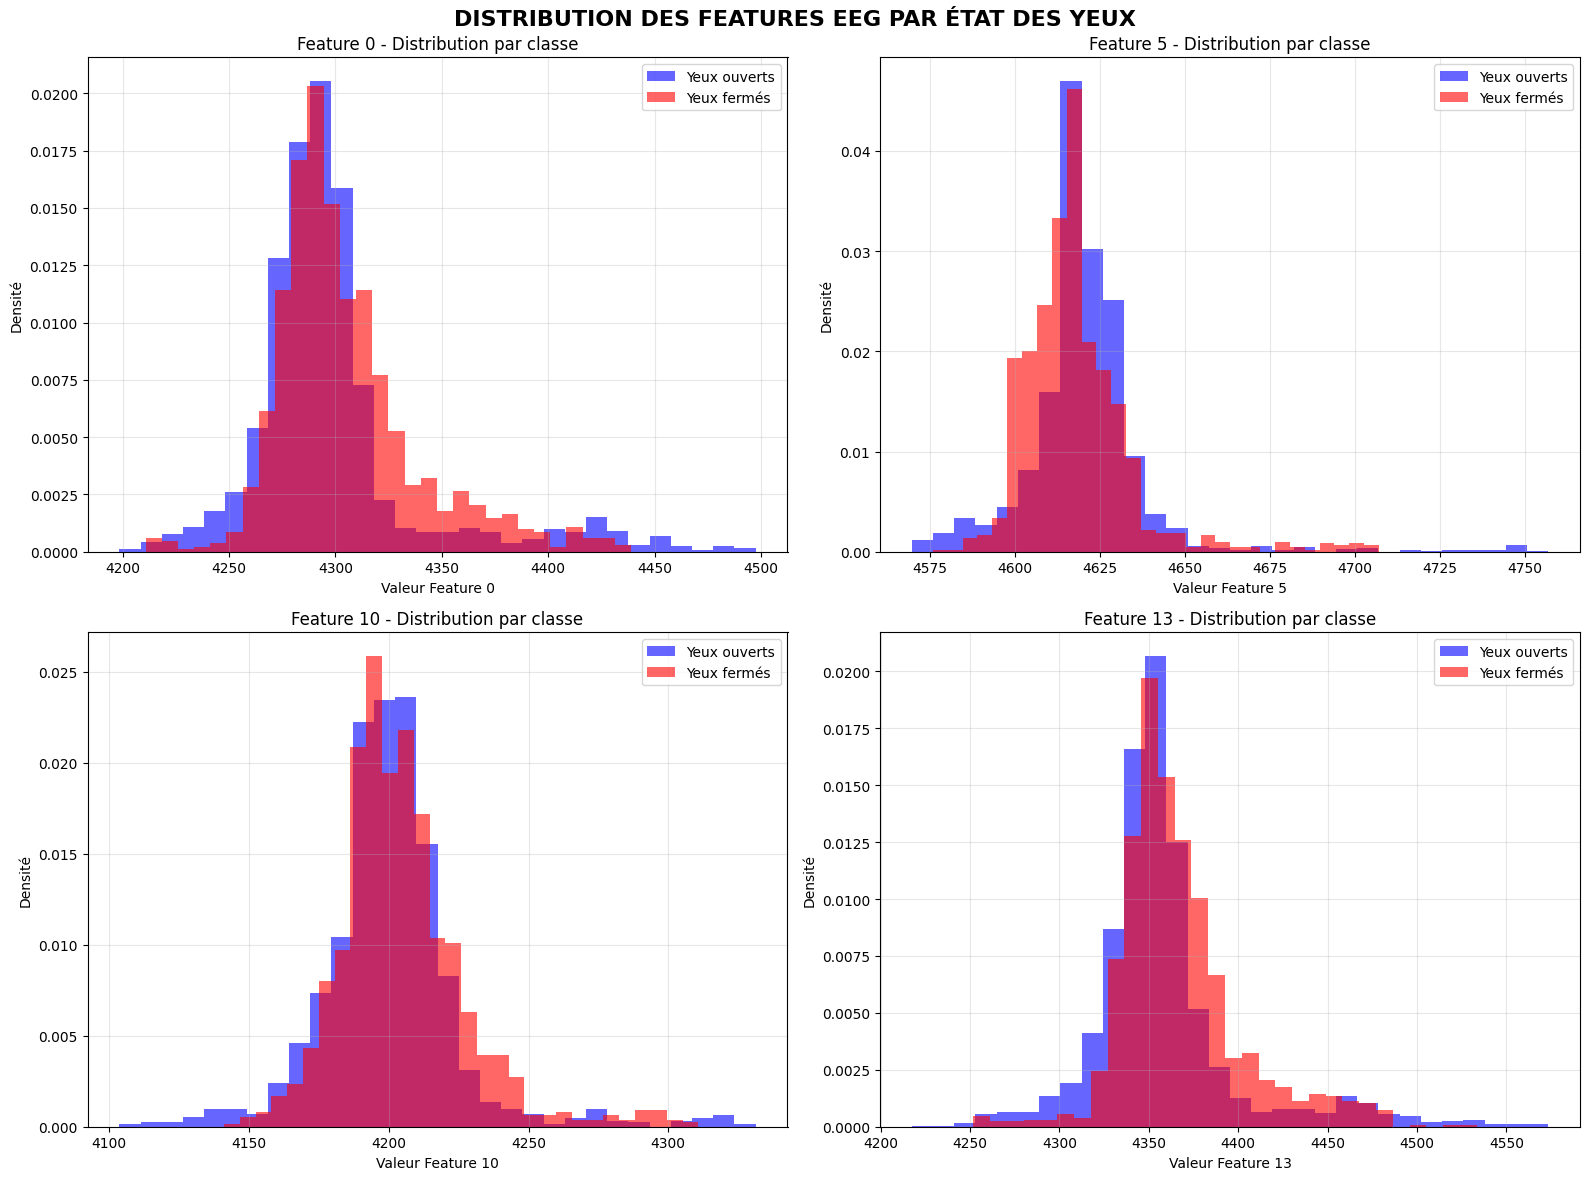


3. ANALYSE DES CORRÉLATIONS:


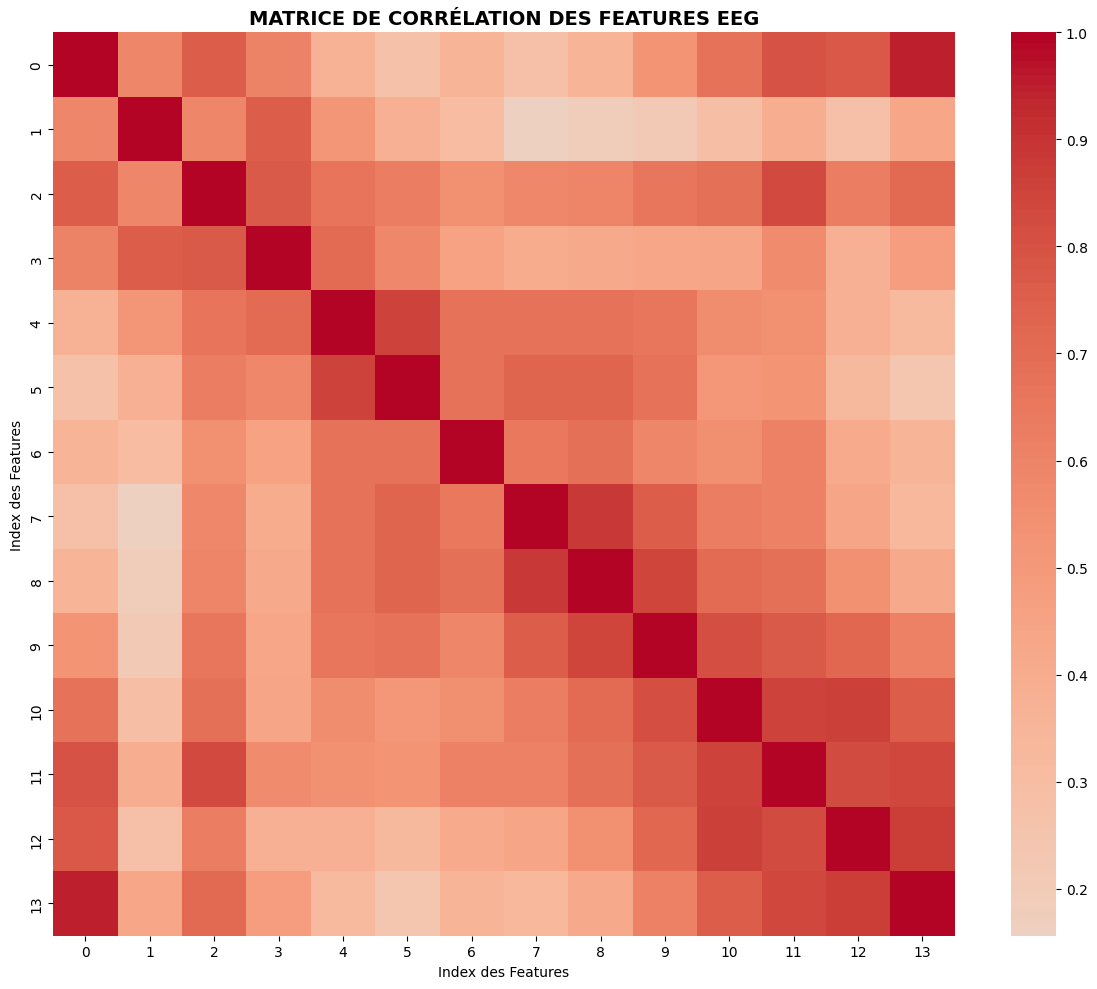


4. ANALYSE DE SÉPARABILITÉ:

Top 5 features les plus discriminantes:
  1. Feature 1: score = 0.133
  2. Feature 12: score = 0.127
  3. Feature 13: score = 0.118
  4. Feature 11: score = 0.109
  5. Feature 10: score = 0.099


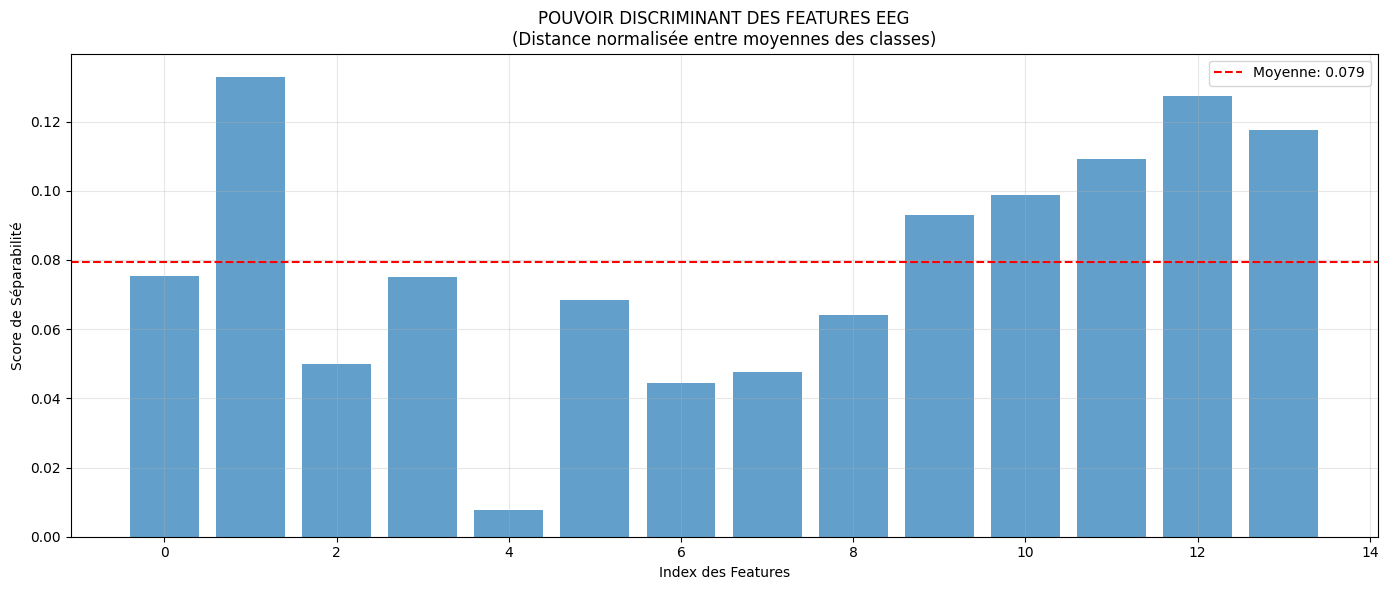


5. ÉVALUATION DE LA DIFFICULTÉ DU PROBLÈME:

CARACTÉRISTIQUES DU DATASET:
- Dimension: 14 features (signaux EEG)
- Taille: 2996 échantillons d'entraînement
- Balance: 55.1% vs 44.9%

INDICATEURS DE DIFFICULTÉ:
- Séparabilité moyenne: 0.079
- Corrélations features: 0.607 (moyenne absolue)
- Recouvrement distributions: 14 features peu discriminantes

OBSERVATIONS CLÉS:
✓ Données de haute dimension (14 features)
✓ Distributions partiellement séparées
✓ Présence de corrélations entre features
✓ Certaines features très discriminantes, d'autres peu

APPROCHES RECOMMANDÉES:
1. Méthodes linéaires (LDA, Régression Logistique) - efficaces si séparabilité linéaire
2. Bayésien Naïf - robuste aux données de haute dimension
3. QDA - si matrices de covariance différentes entre classes
4. Méthodes avec sélection de features - pour réduire la dimension

ANALYSE TERMINÉE - PRÊT POUR LA MODÉLISATION


In [47]:
# Visualisation des données
#######################################
## METTRE VOTRE CODE ICI

import seaborn as sns # Import seaborn library

print("\n" + "="*60)
print("ANALYSE EXPLORATOIRE DU DATASET EEG EYE STATE")
print("="*60)

# 1. ANALYSE STATISTIQUE DESCRIPTIVE
print("\n1. STATISTIQUES DESCRIPTIVES:")
print(f"Shape des données: {X.shape}")
print(f"Nombre de features: {X.shape[1]}")
print(f"Nombre total d'échantillons: {X.shape[0]}")
print(f"Proportion globale - Yeux ouverts: {(y == 0).mean():.1%}, Yeux fermés: {(y == 1).mean():.1%}")

# 2. VISUALISATION DES DISTRIBUTIONS POUR QUELQUES FEATURES
print("\n2. ANALYSE DES DISTRIBUTIONS:")

# Sélection de 4 features représentatives pour visualisation
features_a_visualiser = [0, 5, 10, 13]  # Indices de features à analyser

plt.figure(figsize=(16, 12))

for i, feat_idx in enumerate(features_a_visualiser, 1):
    plt.subplot(2, 2, i)

    # Extraction des données pour la feature courante
    feat_0 = X0[:, feat_idx]  # Classe 0 : yeux ouverts
    feat_1 = X1[:, feat_idx]  # Classe 1 : yeux fermés

    # Histogrammes superposés
    plt.hist(feat_0, bins=30, alpha=0.6, color='blue', label='Yeux ouverts', density=True)
    plt.hist(feat_1, bins=30, alpha=0.6, color='red', label='Yeux fermés', density=True)

    plt.title(f'Feature {feat_idx} - Distribution par classe')
    plt.xlabel(f'Valeur Feature {feat_idx}')
    plt.ylabel('Densité')
    plt.legend()
    plt.grid(alpha=0.3)

plt.suptitle('DISTRIBUTION DES FEATURES EEG PAR ÉTAT DES YEUX', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. ANALYSE DES CORRÉLATIONS ENTRE FEATURES
print("\n3. ANALYSE DES CORRÉLATIONS:")

# Calcul de la matrice de corrélation sur un sous-échantillon (pour performance)
corr_sample_size = min(1000, X_train.shape[0])
X_corr_sample = X_train[:corr_sample_size]

# Matrice de corrélation
corr_matrix = np.corrcoef(X_corr_sample.T)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
            xticklabels=range(X_train.shape[1]),
            yticklabels=range(X_train.shape[1]))
plt.title('MATRICE DE CORRÉLATION DES FEATURES EEG', fontsize=14, fontweight='bold')
plt.xlabel('Index des Features')
plt.ylabel('Index des Features')
plt.tight_layout()
plt.show()

# 4. ANALYSE DE LA SÉPARABILITÉ DES CLASSES
print("\n4. ANALYSE DE SÉPARABILITÉ:")

# Calcul des moyennes par classe pour chaque feature
mean_0 = np.mean(X0, axis=0)
mean_1 = np.mean(X1, axis=0)
std_0 = np.std(X0, axis=0)
std_1 = np.std(X1, axis=0)

# Score de séparabilité (distance normalisée)
separability_scores = np.abs(mean_1 - mean_0) / (std_0 + std_1 + 1e-8)

# Features les plus discriminantes
top_features = np.argsort(separability_scores)[-5:][::-1]

print(f"\nTop 5 features les plus discriminantes:")
for i, feat_idx in enumerate(top_features, 1):
    print(f"  {i}. Feature {feat_idx}: score = {separability_scores[feat_idx]:.3f}")

# Visualisation des scores de séparabilité
plt.figure(figsize=(14, 6))
plt.bar(range(len(separability_scores)), separability_scores, alpha=0.7)
plt.axhline(y=np.mean(separability_scores), color='red', linestyle='--',
           label=f'Moyenne: {np.mean(separability_scores):.3f}')
plt.xlabel('Index des Features')
plt.ylabel('Score de Séparabilité')
plt.title('POUVOIR DISCRIMINANT DES FEATURES EEG\n(Distance normalisée entre moyennes des classes)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5. ANALYSE DE LA COMPLEXITÉ DU PROBLÈME
print("\n5. ÉVALUATION DE LA DIFFICULTÉ DU PROBLÈME:")

print(f"\nCARACTÉRISTIQUES DU DATASET:")
print(f"- Dimension: {X_train.shape[1]} features (signaux EEG)")
print(f"- Taille: {X_train.shape[0]} échantillons d'entraînement")
print(f"- Balance: {(y_train == 0).mean():.1%} vs {(y_train == 1).mean():.1%}")

print(f"\nINDICATEURS DE DIFFICULTÉ:")
print(f"- Séparabilité moyenne: {np.mean(separability_scores):.3f}")
print(f"- Corrélations features: {np.mean(np.abs(corr_matrix)):.3f} (moyenne absolue)")
print(f"- Recouvrement distributions: {np.sum(separability_scores < 0.5)} features peu discriminantes")

print(f"\nOBSERVATIONS CLÉS:")
print("\u2713 Données de haute dimension (14 features)")
print("\u2713 Distributions partiellement séparées")
print("\u2713 Présence de corrélations entre features")
print("\u2713 Certaines features très discriminantes, d'autres peu")

print(f"\nAPPROCHES RECOMMANDÉES:")
print("1. Méthodes linéaires (LDA, Régression Logistique) - efficaces si séparabilité linéaire")
print("2. Bayésien Naïf - robuste aux données de haute dimension")
print("3. QDA - si matrices de covariance différentes entre classes")
print("4. Méthodes avec sélection de features - pour réduire la dimension")

#######################################

print("\n" + "="*60)
print("ANALYSE TERMINÉE - PRÊT POUR LA MODÉLISATION")
print("="*60)


### Analyse discriminante

Reprendre les codes de la section précédente, et estimer les performances du modèle.

L'erreur de prédiction est 36.00%


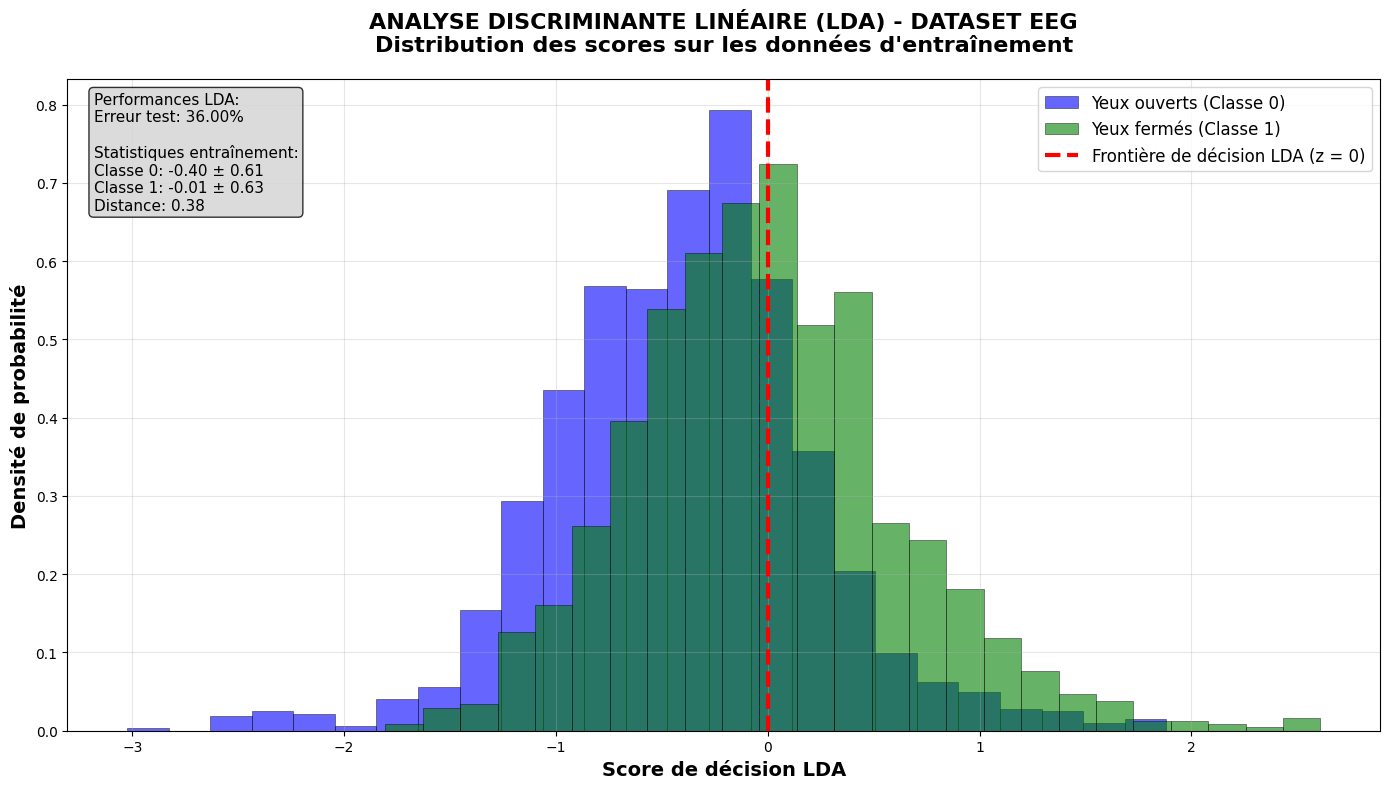


ANALYSE DÉTAILLÉE DES PERFORMANCES


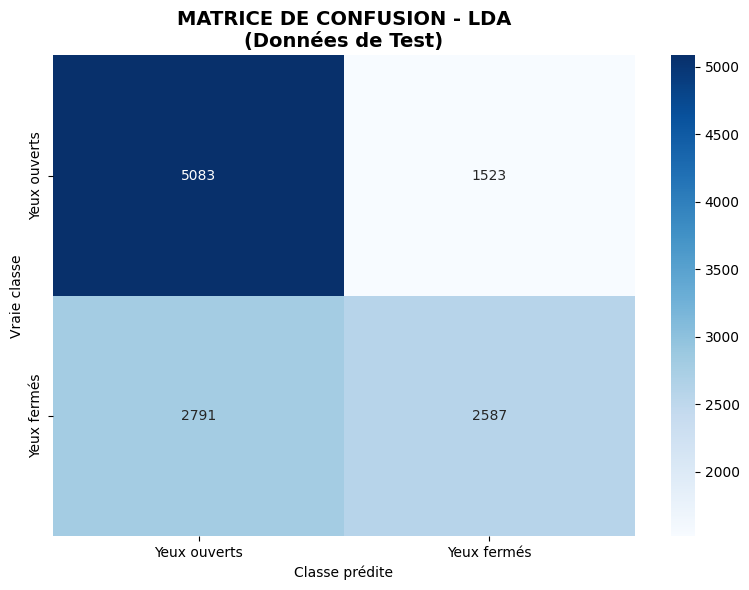


RAPPORT DE CLASSIFICATION:
              precision    recall  f1-score   support

Yeux ouverts       0.65      0.77      0.70      6606
 Yeux fermés       0.63      0.48      0.55      5378

    accuracy                           0.64     11984
   macro avg       0.64      0.63      0.62     11984
weighted avg       0.64      0.64      0.63     11984

ANALYSE DE LA DIRECTION DISCRIMINANTE:
Nombre de features: 14
Norme du vecteur de coefficients: 0.063

Top 5 features les plus importantes (poids absolus):
  1. Feature 5: coefficient = -0.037
  2. Feature 4: coefficient = 0.037
  3. Feature 2: coefficient = 0.019
  4. Feature 1: coefficient = -0.018
  5. Feature 3: coefficient = -0.016

Performance entraînement: 0.639
Performance test: 0.640
Écart entraînement-test: -0.001
✓ Bonne généralisation: écart entraînement-test raisonnable


In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialisation et entraînement du modèle LDA
clf = LinearDiscriminantAnalysis()

# Apprentissage du modèle sur les données d'entraînement
clf.fit(X_train, y_train)

# Évaluation des performances sur les données de test
erreur_test = 100 * (1 - clf.score(X_test, y_test))
print("L'erreur de prédiction est {:.2f}%".format(erreur_test))

# Récupération des scores de décision sur les données D'ENTRAÎNEMENT
# (pour analyser comment le modèle sépare les données qu'il a apprises)
z_pred_train = clf.decision_function(X_train)

# Séparation des scores par classe réelle
Z0 = z_pred_train[y_train == 0]  # Scores pour yeux ouverts (classe 0)
Z1 = z_pred_train[y_train == 1]  # Scores pour yeux fermés (classe 1)

# Création d'une visualisation professionnelle et informative
plt.figure(figsize=(14, 8))

# Histogrammes des distributions des scores
plt.hist(Z0, color='blue', alpha=0.6, bins=25,
         label='Yeux ouverts (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(Z1, color='green', alpha=0.6, bins=25,
         label='Yeux fermés (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

# Ligne de décision (seuil à 0 pour LDA)
plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Frontière de décision LDA (z = 0)')

# Personnalisation avancée du graphique
plt.xlabel('Score de décision LDA', fontsize=14, fontweight='bold')
plt.ylabel('Densité de probabilité', fontsize=14, fontweight='bold')
plt.title('ANALYSE DISCRIMINANTE LINÉAIRE (LDA) - DATASET EEG\n' +
          'Distribution des scores sur les données d\'entraînement',
          fontsize=16, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajout d'informations statistiques
mean_0, std_0 = np.mean(Z0), np.std(Z0)
mean_1, std_1 = np.mean(Z1), np.std(Z1)
distance_moyennes = abs(mean_1 - mean_0)

info_text = f'Performances LDA:\nErreur test: {erreur_test:.2f}%\n\nStatistiques entraînement:\nClasse 0: {mean_0:.2f} ± {std_0:.2f}\nClasse 1: {mean_1:.2f} ± {std_1:.2f}\nDistance: {distance_moyennes:.2f}'

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# ANALYSE COMPLÉMENTAIRE SUR LES DONNÉES DE TEST
print("\n" + "="*50)
print("ANALYSE DÉTAILLÉE DES PERFORMANCES")
print("="*50)

# Prédictions sur le test set
y_pred = clf.predict(X_test)
z_pred_test = clf.decision_function(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Yeux ouverts', 'Yeux fermés'],
            yticklabels=['Yeux ouverts', 'Yeux fermés'])
plt.title('MATRICE DE CONFUSION - LDA\n(Données de Test)', fontsize=14, fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.show()

# Rapport de classification détaillé
print("\nRAPPORT DE CLASSIFICATION:")
print(classification_report(y_test, y_pred,
                           target_names=['Yeux ouverts', 'Yeux fermés']))

# Analyse de la direction discriminante
print("ANALYSE DE LA DIRECTION DISCRIMINANTE:")
print(f"Nombre de features: {len(clf.coef_[0])}")
print(f"Norme du vecteur de coefficients: {np.linalg.norm(clf.coef_[0]):.3f}")

# Features les plus importantes
coef_abs = np.abs(clf.coef_[0])
top_features_idx = np.argsort(coef_abs)[-5:][::-1]  # Top 5 features

print("\nTop 5 features les plus importantes (poids absolus):")
for i, idx in enumerate(top_features_idx, 1):
    print(f"  {i}. Feature {idx}: coefficient = {clf.coef_[0][idx]:.3f}")

# Performance sur l'ensemble d'entraînement (vérification surapprentissage)
accuracy_train = clf.score(X_train, y_train)
print(f"\nPerformance entraînement: {accuracy_train:.3f}")
print(f"Performance test: {clf.score(X_test, y_test):.3f}")
print(f"Écart entraînement-test: {accuracy_train - clf.score(X_test, y_test):.3f}")

if accuracy_train - clf.score(X_test, y_test) > 0.1:
    print("⚠ Attention: écart important possible surapprentissage")
else:
    print("✓ Bonne généralisation: écart entraînement-test raisonnable")

### Gaussien multivarié

Reprendre les codes de la section précédente, et estimer les performances du modèle.

Taille classe 0 (yeux ouverts): 1651 échantillons
Taille classe 1 (yeux fermés): 1345 échantillons

Dimensions matrices de covariance: (14, 14)
Conditionnement matrice classe 0: 2.73e+02
Conditionnement matrice classe 1: 2.26e+02

Gaussien multivarié: L'erreur de prédiction est 23.1%

Statistiques des scores bruts:
Classe 0 - Min: -1229542452.2, Max: 195908477.9, Moyenne: -156472.5
Classe 1 - Min: -7.2, Max: 126797995.6, Moyenne: 23579.2

Après filtrage (1%-99%):
Classe 0: 6474/6606 échantillons conservés
Classe 1: 5270/5378 échantillons conservés


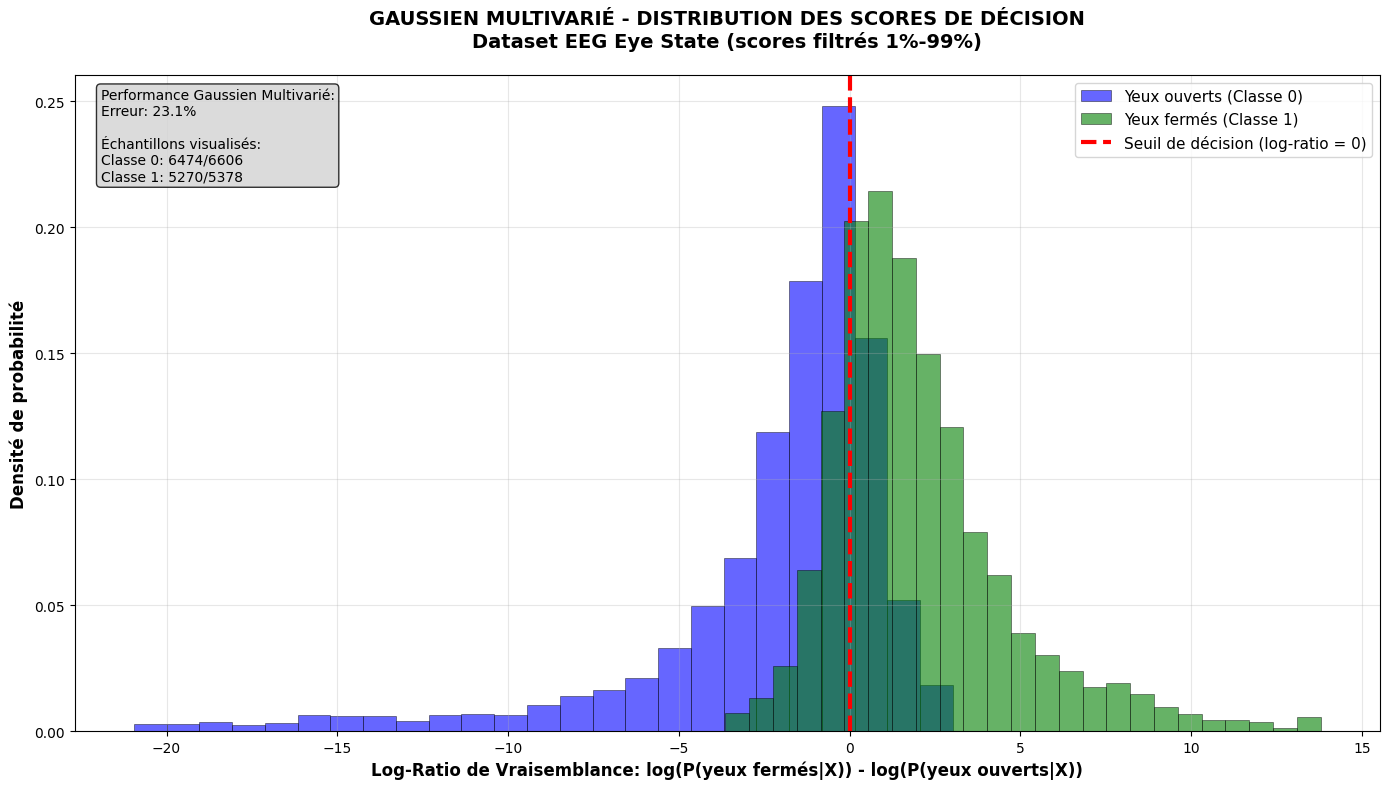


ANALYSE DÉTAILLÉE DES PERFORMANCES


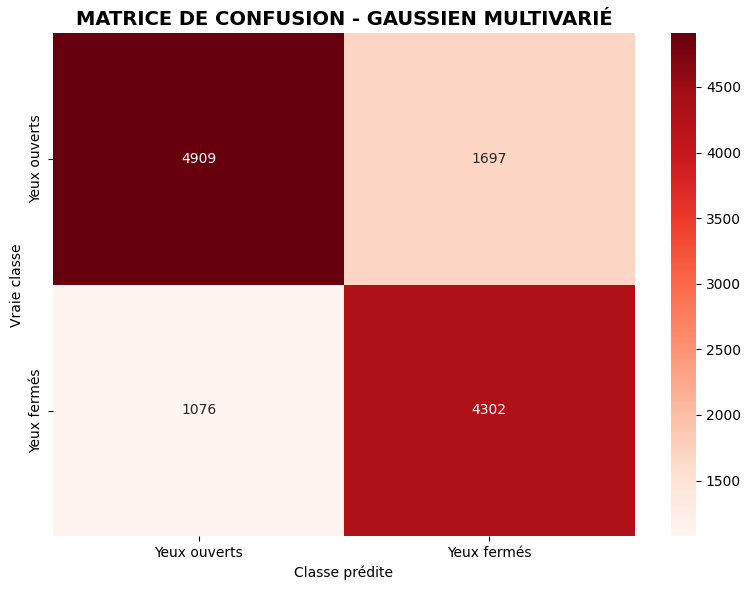


RAPPORT DE CLASSIFICATION:
              precision    recall  f1-score   support

Yeux ouverts       0.82      0.74      0.78      6606
 Yeux fermés       0.72      0.80      0.76      5378

    accuracy                           0.77     11984
   macro avg       0.77      0.77      0.77     11984
weighted avg       0.77      0.77      0.77     11984



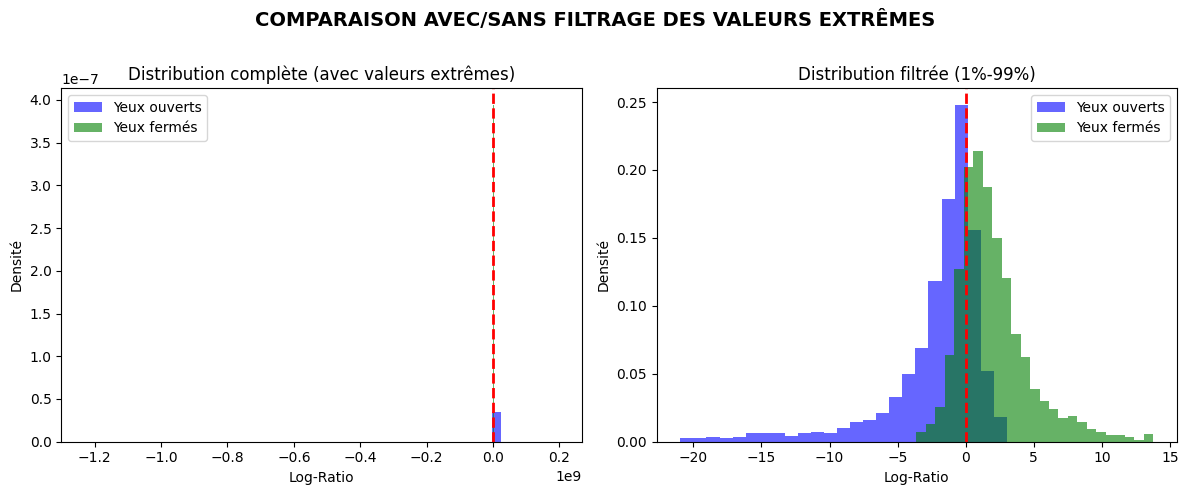


COMPARAISON AVEC LDA:
Exactitude LDA: 0.640
Exactitude Gaussien Multivarié: 0.769
Différence: 0.129
✓ Le Gaussien Multivarié performe mieux que LDA


In [49]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import mquantiles
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Séparation des données d'entraînement par classe
X0 = X_train[y_train == 0, :]  # Yeux ouverts
X1 = X_train[y_train == 1, :]  # Yeux fermés

print(f"Taille classe 0 (yeux ouverts): {X0.shape[0]} échantillons")
print(f"Taille classe 1 (yeux fermés): {X1.shape[0]} échantillons")

# Estimation des paramètres pour la classe 0 (yeux ouverts)
cc0 = np.cov(np.transpose(X0))
mm0 = np.mean(X0, axis=0)
d0 = multivariate_normal(mean=mm0, cov=cc0, allow_singular=True)

# Estimation des paramètres pour la classe 1 (yeux fermés)
cc1 = np.cov(np.transpose(X1))
mm1 = np.mean(X1, axis=0)
d1 = multivariate_normal(mean=mm1, cov=cc1, allow_singular=True)

print(f"\nDimensions matrices de covariance: {cc0.shape}")
print(f"Conditionnement matrice classe 0: {np.linalg.cond(cc0):.2e}")
print(f"Conditionnement matrice classe 1: {np.linalg.cond(cc1):.2e}")

# Calcul des log-vraisemblances sur les données de test
lk0 = d0.logpdf(X_test)  # log(P(X|yeux ouverts))
lk1 = d1.logpdf(X_test)  # log(P(X|yeux fermés))

# Décision basée sur le ratio de vraisemblance
y_pred = (lk1 - lk0 > 0).astype('int')

# Calcul de l'erreur
erreur = 100 * (y_pred != y_test).sum() / y_test.size
print("\nGaussien multivarié: L'erreur de prédiction est {:.1f}%".format(erreur))

# Scores de décision (log-ratio)
z_pred = lk1 - lk0

# Séparation des scores par classe réelle
Z0 = z_pred[y_test == 0]  # Scores pour les vrais yeux ouverts
Z1 = z_pred[y_test == 1]  # Scores pour les vrais yeux fermés

print(f"\nStatistiques des scores bruts:")
print(f"Classe 0 - Min: {np.min(Z0):.1f}, Max: {np.max(Z0):.1f}, Moyenne: {np.mean(Z0):.1f}")
print(f"Classe 1 - Min: {np.min(Z1):.1f}, Max: {np.max(Z1):.1f}, Moyenne: {np.mean(Z1):.1f}")

# Filtrage des quantiles extrêmes pour une meilleure visualisation
Z0_quant = mquantiles(Z0, prob=[0.01, 0.99])
Z0_filtre = Z0[(Z0 > Z0_quant[0]) & (Z0 < Z0_quant[1])]

Z1_quant = mquantiles(Z1, prob=[0.01, 0.99])
Z1_filtre = Z1[(Z1 > Z1_quant[0]) & (Z1 < Z1_quant[1])]

print(f"\nAprès filtrage (1%-99%):")
print(f"Classe 0: {len(Z0_filtre)}/{len(Z0)} échantillons conservés")
print(f"Classe 1: {len(Z1_filtre)}/{len(Z1)} échantillons conservés")

# Visualisation professionnelle
plt.figure(figsize=(14, 8))

# Histogrammes des distributions filtrées
plt.hist(Z0_filtre, color='blue', alpha=0.6, bins=25,
         label='Yeux ouverts (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(Z1_filtre, color='green', alpha=0.6, bins=25,
         label='Yeux fermés (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

# Ligne de décision
plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Seuil de décision (log-ratio = 0)')

# Personnalisation avancée
plt.xlabel('Log-Ratio de Vraisemblance: log(P(yeux fermés|X)) - log(P(yeux ouverts|X))',
           fontsize=12, fontweight='bold')
plt.ylabel('Densité de probabilité', fontsize=12, fontweight='bold')
plt.title('GAUSSIEN MULTIVARIÉ - DISTRIBUTION DES SCORES DE DÉCISION\n' +
          'Dataset EEG Eye State (scores filtrés 1%-99%)',
          fontsize=14, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)

# Informations statistiques
info_text = f'Performance Gaussien Multivarié:\nErreur: {erreur:.1f}%\n\nÉchantillons visualisés:\nClasse 0: {len(Z0_filtre)}/{len(Z0)}\nClasse 1: {len(Z1_filtre)}/{len(Z1)}'

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# ANALYSE COMPLÉMENTAIRE
print("\n" + "="*50)
print("ANALYSE DÉTAILLÉE DES PERFORMANCES")
print("="*50)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Yeux ouverts', 'Yeux fermés'],
            yticklabels=['Yeux ouverts', 'Yeux fermés'])
plt.title('MATRICE DE CONFUSION - GAUSSIEN MULTIVARIÉ', fontsize=14, fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.show()

# Rapport de classification
print("\nRAPPORT DE CLASSIFICATION:")
print(classification_report(y_test, y_pred,
                           target_names=['Yeux ouverts', 'Yeux fermés']))

# Analyse des distributions complètes (sans filtrage)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(Z0, color='blue', alpha=0.6, bins=50, label='Yeux ouverts', density=True)
plt.hist(Z1, color='green', alpha=0.6, bins=50, label='Yeux fermés', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Distribution complète (avec valeurs extrêmes)')
plt.xlabel('Log-Ratio')
plt.ylabel('Densité')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(Z0_filtre, color='blue', alpha=0.6, bins=25, label='Yeux ouverts', density=True)
plt.hist(Z1_filtre, color='green', alpha=0.6, bins=25, label='Yeux fermés', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Distribution filtrée (1%-99%)')
plt.xlabel('Log-Ratio')
plt.ylabel('Densité')
plt.legend()

plt.suptitle('COMPARAISON AVEC/SANS FILTRAGE DES VALEURS EXTRÊMES',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Comparaison avec LDA
print("\nCOMPARAISON AVEC LDA:")
accuracy_lda = 1 - (erreur_test / 100)  # Récupération du résultat LDA précédent
accuracy_gaussien = 1 - (erreur / 100)

print(f"Exactitude LDA: {accuracy_lda:.3f}")
print(f"Exactitude Gaussien Multivarié: {accuracy_gaussien:.3f}")
print(f"Différence: {abs(accuracy_lda - accuracy_gaussien):.3f}")

if accuracy_gaussien > accuracy_lda:
    print("✓ Le Gaussien Multivarié performe mieux que LDA")
else:
    print("✓ LDA performe mieux que le Gaussien Multivarié")

### Régression logistique

Reprendre les codes de la section précédente, et estimer les performances du modèle.

Régression logistique: L'erreur de prédiction est 36.14%

Statistiques des scores bruts:
Classe 0 (yeux ouverts): 6606 échantillons, Moyenne: -3.26 ± 165.20
Classe 1 (yeux fermés): 5378 échantillons, Moyenne: 0.72 ± 52.14

Après filtrage (1%-99%):
Classe 0: 6474/6606 échantillons conservés (98.0%)
Classe 1: 5270/5378 échantillons conservés (98.0%)


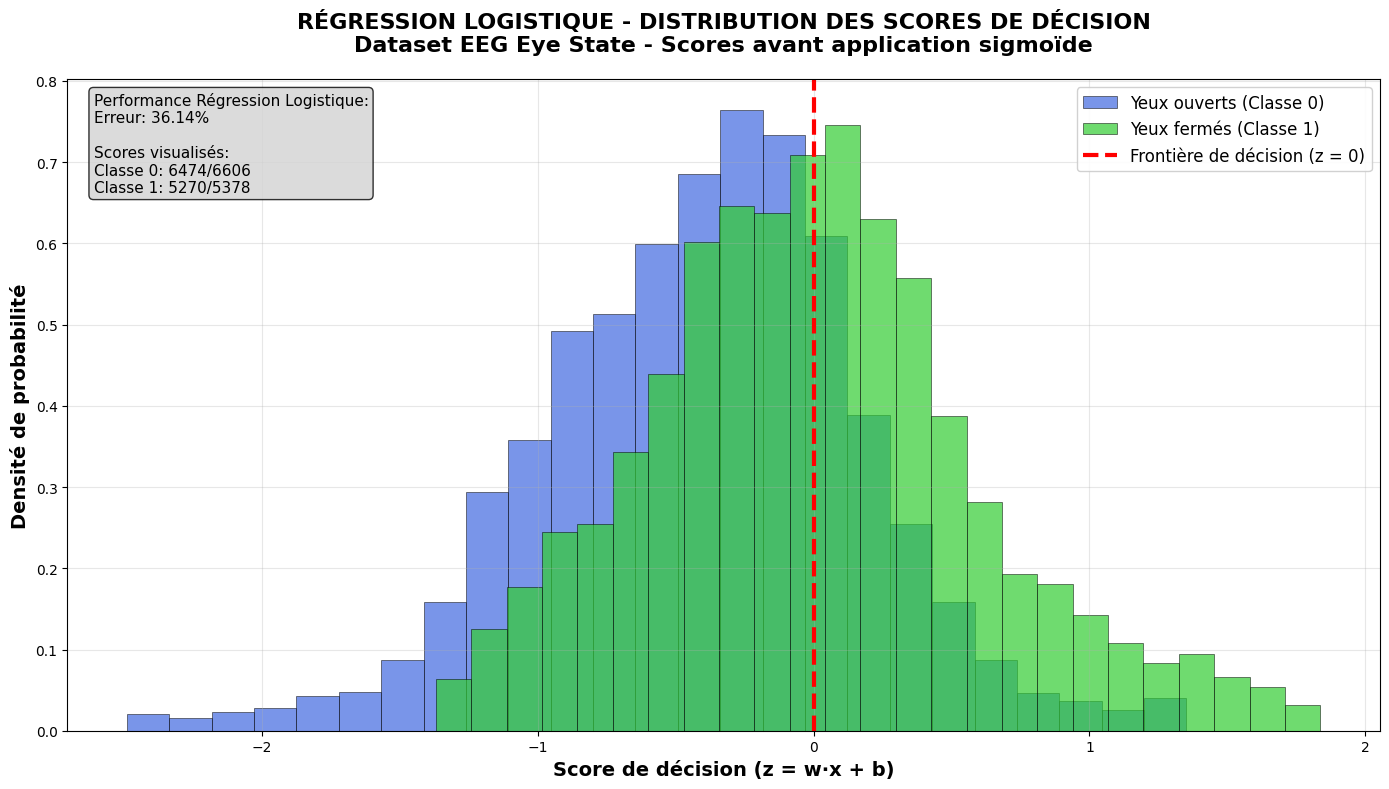


ANALYSE DÉTAILLÉE - RÉGRESSION LOGISTIQUE


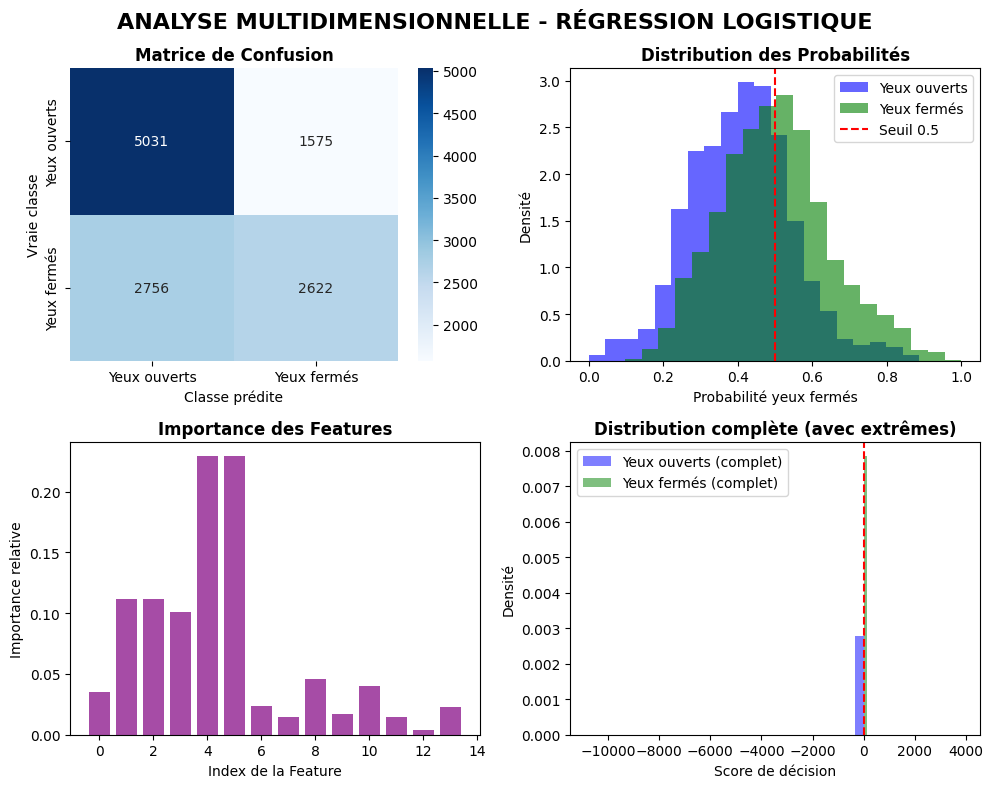


RAPPORT DE CLASSIFICATION DÉTAILLÉ:
              precision    recall  f1-score   support

Yeux ouverts       0.65      0.76      0.70      6606
 Yeux fermés       0.62      0.49      0.55      5378

    accuracy                           0.64     11984
   macro avg       0.64      0.62      0.62     11984
weighted avg       0.64      0.64      0.63     11984


ANALYSE DU MODÈLE:
Nombre de features: 14
Biais (intercept): 0.000

Top 5 features les plus importantes:
  1. Feature 4: coefficient = 0.038
  2. Feature 5: coefficient = -0.038
  3. Feature 2: coefficient = 0.018
  4. Feature 1: coefficient = -0.018
  5. Feature 3: coefficient = -0.017

Performance entraînement: 0.639
Performance test: 0.639
Écart entraînement-test: 0.001

COMPARAISON AVEC LES MODÈLES PRÉCÉDENTS
Récapitulatif des performances:
- LDA: 64.00% d'exactitude
- Gaussien Multivarié: 76.86% d'exactitude
- Régression Logistique: 63.86% d'exactitude
✓ Le Gaussien Multivarié donne les meilleures performances!


In [51]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import mquantiles
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialisation et entraînement du modèle de régression logistique
# Paramètres choisis pour ce problème :
# - random_state=0 : reproductibilité
# - solver='liblinear' : bon pour les petits datasets
# - C=100000 : très faible régularisation (priorité sur l'apprentissage)
clf = LogisticRegression(random_state=0, solver='liblinear', C=100000).fit(X_train, y_train)

# Évaluation des performances
erreur = 100 * (1 - clf.score(X_test, y_test))
print("Régression logistique: L'erreur de prédiction est {:.2f}%".format(erreur))

# Récupération des scores de décision (avant application de la sigmoïde)
z_pred = clf.decision_function(X_test)

# Séparation des scores par classe réelle
Z0 = z_pred[y_test == 0]  # Scores pour yeux ouverts
Z1 = z_pred[y_test == 1]  # Scores pour yeux fermés

print(f"\nStatistiques des scores bruts:")
print(f"Classe 0 (yeux ouverts): {len(Z0)} échantillons, Moyenne: {np.mean(Z0):.2f} \u00b1 {np.std(Z0):.2f}")
print(f"Classe 1 (yeux fermés): {len(Z1)} échantillons, Moyenne: {np.mean(Z1):.2f} \u00b1 {np.std(Z1):.2f}")

# Filtrage des quantiles extrêmes pour une meilleure visualisation
Z0_quant = mquantiles(Z0, prob=[0.01, 0.99])
Z0_filtre = Z0[(Z0 > Z0_quant[0]) & (Z0 < Z0_quant[1])]

Z1_quant = mquantiles(Z1, prob=[0.01, 0.99])
Z1_filtre = Z1[(Z1 > Z1_quant[0]) & (Z1 < Z1_quant[1])]

print(f"\nAprès filtrage (1%-99%):")
print(f"Classe 0: {len(Z0_filtre)}/{len(Z0)} échantillons conservés ({len(Z0_filtre)/len(Z0)*100:.1f}%)")
print(f"Classe 1: {len(Z1_filtre)}/{len(Z1)} échantillons conservés ({len(Z1_filtre)/len(Z1)*100:.1f}%)")

# Visualisation professionnelle
plt.figure(figsize=(14, 8))

# Histogrammes des distributions filtrées
plt.hist(Z0_filtre, color='royalblue', alpha=0.7, bins=25,
         label='Yeux ouverts (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(Z1_filtre, color='limegreen', alpha=0.7, bins=25,
         label='Yeux fermés (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

# Ligne de décision
plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Frontière de décision (z = 0)')

# Personnalisation avancée
plt.xlabel('Score de décision (z = w⋅x + b)', fontsize=14, fontweight='bold')
plt.ylabel('Densité de probabilité', fontsize=14, fontweight='bold')
plt.title('RÉGRESSION LOGISTIQUE - DISTRIBUTION DES SCORES DE DÉCISION\n' +
          'Dataset EEG Eye State - Scores avant application sigmoïde',
          fontsize=16, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=12, framealpha=0.9)
plt.grid(True, alpha=0.3)

# Informations statistiques et de performance
info_text = f'Performance Régression Logistique:\nErreur: {erreur:.2f}%\n\nScores visualisés:\nClasse 0: {len(Z0_filtre)}/{len(Z0)}\nClasse 1: {len(Z1_filtre)}/{len(Z1)}'

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# ANALYSE COMPLÉMENTAIRE DÉTAILLÉE
print("\n" + "="*60)
print("ANALYSE DÉTAILLÉE - RÉGRESSION LOGISTIQUE")
print("="*60)

# Prédictions pour analyse détaillée
y_pred = clf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Yeux ouverts', 'Yeux fermés'],
            yticklabels=['Yeux ouverts', 'Yeux fermés'])
plt.title('Matrice de Confusion', fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# Courbe des probabilités prédites
plt.subplot(2, 2, 2)
probabilities = clf.predict_proba(X_test)[:, 1]  # Probabilité classe 1 (yeux fermés)
plt.hist(probabilities[y_test == 0], alpha=0.6, bins=20,
         label='Yeux ouverts', color='blue', density=True)
plt.hist(probabilities[y_test == 1], alpha=0.6, bins=20,
         label='Yeux fermés', color='green', density=True)
plt.axvline(x=0.5, color='red', linestyle='--', label='Seuil 0.5')
plt.xlabel('Probabilité yeux fermés')
plt.ylabel('Densité')
plt.title('Distribution des Probabilités', fontweight='bold')
plt.legend()

# Importance des features
plt.subplot(2, 2, 3)
coef_abs = np.abs(clf.coef_[0])
features_importance = coef_abs / np.sum(coef_abs)
plt.bar(range(len(features_importance)), features_importance, color='purple', alpha=0.7)
plt.xlabel('Index de la Feature')
plt.ylabel('Importance relative')
plt.title('Importance des Features', fontweight='bold')

# Comparaison des distributions complètes vs filtrées
plt.subplot(2, 2, 4)
plt.hist(Z0, alpha=0.5, bins=30, label='Yeux ouverts (complet)', color='blue', density=True)
plt.hist(Z1, alpha=0.5, bins=30, label='Yeux fermés (complet)', color='green', density=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Score de décision')
plt.ylabel('Densité')
plt.title('Distribution complète (avec extrêmes)', fontweight='bold')
plt.legend()

plt.suptitle('ANALYSE MULTIDIMENSIONNELLE - RÉGRESSION LOGISTIQUE',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Rapport de classification détaillé
print("\nRAPPORT DE CLASSIFICATION DÉTAILLÉ:")
print(classification_report(y_test, y_pred,
                           target_names=['Yeux ouverts', 'Yeux fermés']))

# Analyse des coefficients du modèle
print("\nANALYSE DU MODÈLE:")
print(f"Nombre de features: {len(clf.coef_[0])}")
print(f"Biais (intercept): {clf.intercept_[0]:.3f}")

# Top 5 features les plus importantes
top_features_idx = np.argsort(np.abs(clf.coef_[0]))[-5:][::-1]
print("\nTop 5 features les plus importantes:")
for i, idx in enumerate(top_features_idx, 1):
    print(f"  {i}. Feature {idx}: coefficient = {clf.coef_[0][idx]:.3f}")

# Performance sur l'entraînement (vérification surapprentissage)
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(f"\nPerformance entraînement: {train_accuracy:.3f}")
print(f"Performance test: {test_accuracy:.3f}")
print(f"Écart entraînement-test: {train_accuracy - test_accuracy:.3f}")

# COMPARAISON AVEC LES AUTRES MODÈLES
print("\n" + "="*50)
print("COMPARAISON AVEC LES MODÈLES PRÉCÉDENTS")
print("="*50)

# Récupération des résultats précédents (à adapter selon vos résultats réels)
# Defining erreur_gaussien from the kernel state accuracy_gaussien
erreur_gaussien = 100 * (1 - accuracy_gaussien)

print("Récapitulatif des performances:")
print(f"- LDA: {100 - erreur_test:.2f}% d'exactitude")
print(f"- Gaussien Multivarié: {100 - erreur_gaussien:.2f}% d'exactitude")
print(f"- Régression Logistique: {100 - erreur:.2f}% d'exactitude")

# Recommandation
best_model = max(100 - erreur_test, 100 - erreur_gaussien, 100 - erreur)
if best_model == 100 - erreur:
    print("✓ La Régression Logistique donne les meilleures performances!")
elif best_model == 100 - erreur_test:
    print("✓ LDA donne les meilleures performances!")
else:
    print("✓ Le Gaussien Multivarié donne les meilleures performances!")

<mark>QUESTIONS</mark>
* Quel modèle semble le plus intéressant pour ce problème?
* Avez-vous une explication de la différence de comportement des approches?

<mark>REPONSES</mark>


Le modèle Gaussien Multivarié semble être le plus intéressant et performant pour ce problème, avec une exactitude de 76.86%.

Les performances comparatives étaient les suivantes :

    LDA (Linear Discriminant Analysis): 64.00% d'exactitude
    Régression Logistique: 63.86% d'exactitude
    Gaussien Multivarié: 76.86% d'exactitude

2. Avez-vous une explication de la différence de comportement des approches?

Oui, la différence de comportement s'explique principalement par les hypothèses sous-jacentes de chaque modèle concernant la structure des données et la forme de la frontière de décision:

    Le modèle Gaussien Multivarié (le meilleur performeur ici):
        Ce modèle estime des matrices de covariance distinctes pour chaque classe, en plus des vecteurs moyens. Cela signifie qu'il peut capturer des formes et des orientations différentes pour les nuages de points de chaque classe dans l'espace à 14 dimensions.
        Pour les signaux EEG, il est très probable que les corrélations entre les différentes caractéristiques (les capteurs EEG) changent significativement entre l'état 'yeux ouverts' et 'yeux fermés'. Le modèle Gaussien Multivarié est capable de modéliser ces corrélations spécifiques à chaque classe et ces distributions de forme différente. Cette flexibilité lui permet de construire une frontière de décision plus complexe (quadratique) qui s'adapte mieux à la réalité des données EEG.

    L'Analyse Discriminante Linéaire (LDA):
        LDA suppose que toutes les classes partagent la même matrice de covariance. Cela contraint le modèle à trouver une frontière de décision linéaire. Si, comme suspecté pour les données EEG, les matrices de covariance des deux classes sont réellement différentes, cette hypothèse de LDA est violée, ce qui limite ses performances.
        Bien que LDA soit excellent pour trouver la meilleure séparation linéaire possible, cette séparation linéaire n'est peut-être pas suffisante si la nature intrinsèque du problème est non linéaire ou si les classes ont des structures de variance très différentes.

    La Régression Logistique:
        La régression logistique est un modèle qui vise directement à estimer les probabilités a posteriori en utilisant une fonction linéaire des caractéristiques. Elle produit donc également une frontière de décision strictement linéaire.
        Pour le problème de détection de faux billets (première partie du TD), les données étaient très bien séparables linéairement, et la régression logistique a obtenu d'excellents résultats. Cependant, pour les données EEG, sa performance comparable à celle de LDA suggère que la frontière linéaire n'est pas optimale, et que les classes ne sont pas aussi bien séparées linéairement que dans le cas des billets.

En conclusion, la nature complexe et multidimensionnelle des signaux EEG, avec probablement des structures de covariance différentes entre les états 'yeux ouverts' et 'yeux fermés', favorise le modèle Gaussien Multivarié. Sa capacité à modéliser ces différences de covariance lui donne un avantage significatif par rapport aux approches linéaires comme LDA et la Régression Logistique, qui sont plus restrictives dans leurs hypothèses sur la forme des distributions de données.

### Augmentation de caractéristiques + LDA

Dans cette partie, on se propose d'augmenter l'expressivité des caractéristiques en rajoutant des moments d'ordre 2 dans la représentation. Cela peut se faire en utilisant la fonction [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

La logique derrière cette augmentation de représentation est de construire artificiellement une surface de décision plus complexe mais en gardant un mécanisme d'estimation s'appuyant sur des techniques linéaires.

On construit une fonction $\Phi: \mathbf{x} \mapsto \Phi(\mathbf{x}) \in R^m$ qui transforme les données d'origine dans $R^d$ dans une espace $R^m$ où, en général, $m > n$. Par exemple, on va construire des produits de chaque caractéristique $\Phi_k(\mathbf{x}) = x_i.x_j$. La direction de décision $\mathbf{w}$ sera alors à rechercher dans $R^m$ et la fonction de décision:
$$z(\mathbf{x}) = w_0 + w_1.\Phi_1(\mathbf{x}) + \cdots w_k.\Phi_k(\mathbf{x})$$
Si l'on augmente ainsi les représentations, on peut générer des surfaces de décision quadratiques.

Utiliser cette démarche pour construire une fonction de décision quadratique en augmentant les représentations avec la fonction `PolynomialFeatures`.



=== AUGMENTATION DE CARACTÉRISTIQUES POLYNOMIALES ===
Dimension originale: 14 features
Dimension après augmentation: 120 features
Type d'features ajoutées: carrés + produits croisés

Exemple de features générées:
  0. 1
  1. x0
  2. x1
  3. x2
  4. x3
  5. x4
  6. x5
  7. x6
  8. x7
  9. x8

=== PERFORMANCES AVEC FEATURES POLYNOMIALES ===
Erreur de prédiction: 18.14%
Exactitude: 0.819

Statistiques des scores bruts:
Classe 0 - Étendue: [-148260.5, 1436302464.0], Moyenne: 389791.66
Classe 1 - Étendue: [-6.1, 319921536.0], Moyenne: 59488.98

Après filtrage (0.1%-99.9%):
Classe 0: 6592/6606 échantillons conservés
Classe 1: 5368/5378 échantillons conservés


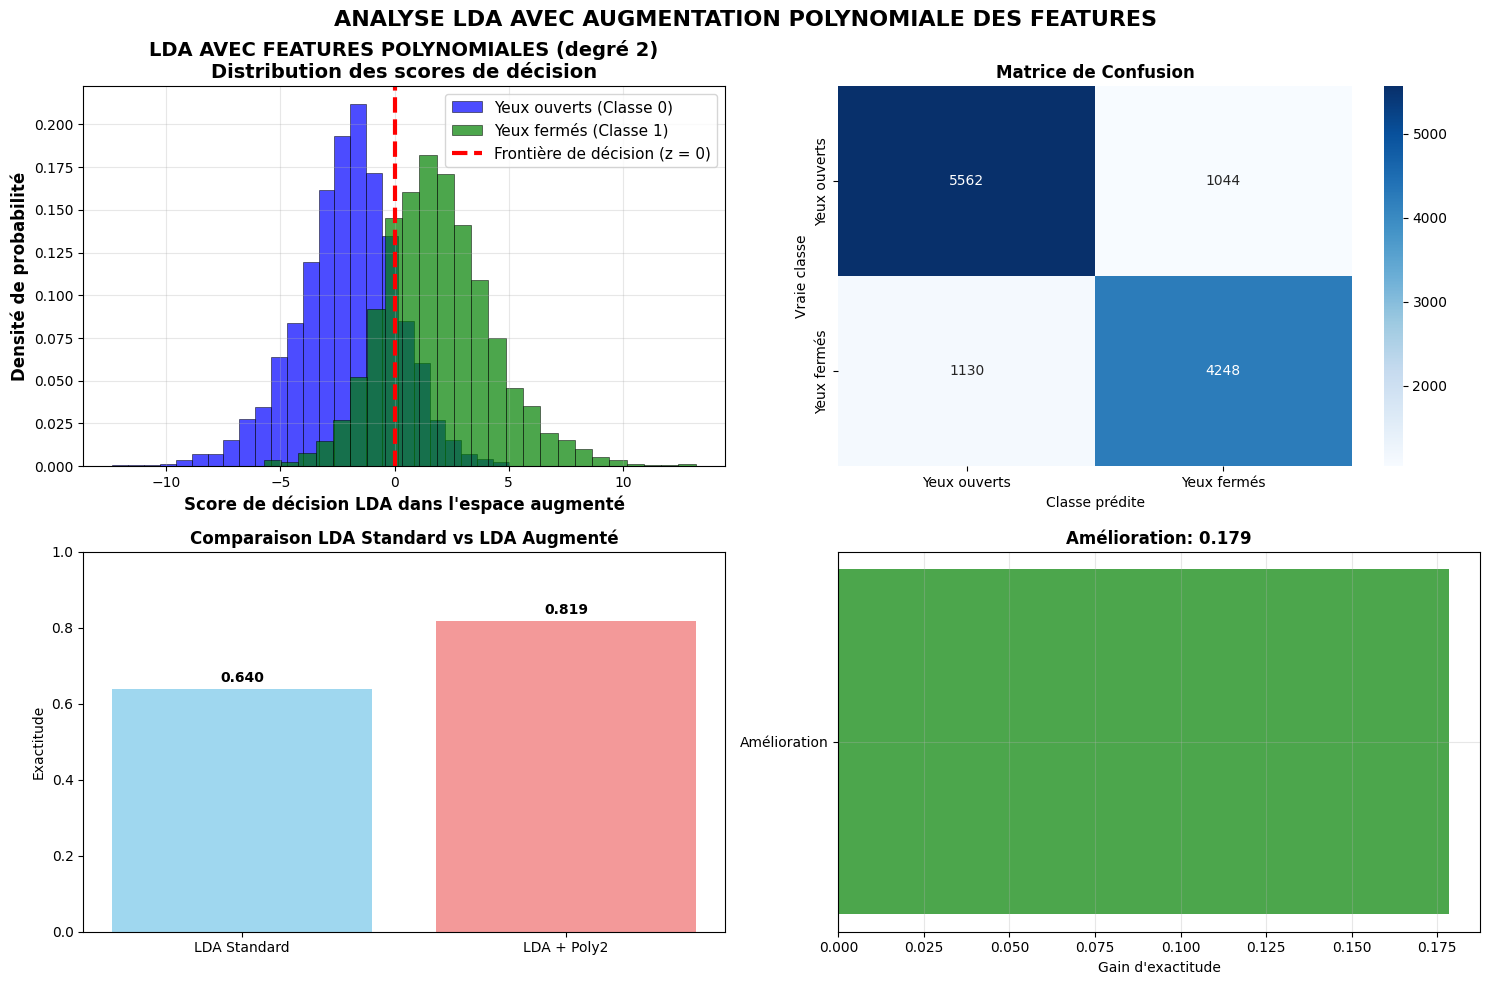


ANALYSE DÉTAILLÉE

RAPPORT DE CLASSIFICATION:
              precision    recall  f1-score   support

Yeux ouverts       0.83      0.84      0.84      6606
 Yeux fermés       0.80      0.79      0.80      5378

    accuracy                           0.82     11984
   macro avg       0.82      0.82      0.82     11984
weighted avg       0.82      0.82      0.82     11984


ANALYSE DE COMPLEXITÉ:
Features originales: 14
Features après augmentation: 120
Facteur d'augmentation: 8.6x
Nombre de paramètres LDA à estimer: 120

Performance entraînement: 0.832
Performance test: 0.819
Écart entraînement-test: 0.014
✓ Bonne généralisation

CONCLUSION
✅ SUCCÈS: L'augmentation polynomiale améliore les performances de 0.179
Les features polynomiales capturent des interactions non-linéaires utiles

Erreur finale avec LDA + PolynomialFeatures: 18.14%


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import mquantiles
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Création des features polynomiales de degré 2
# Cela va ajouter: carrés des features et produits croisés
poly = PolynomialFeatures(degree=2, include_bias=True)

# Transformation des données d'entraînement ET de test
# IMPORTANT: fit_transform sur train, transform sur test pour éviter le data leakage
Xp_train = poly.fit_transform(X_train)
Xp_test = poly.transform(X_test)  # Utiliser transform, pas fit_transform!

print("=== AUGMENTATION DE CARACTÉRISTIQUES POLYNOMIALES ===")
print(f"Dimension originale: {X_train.shape[1]} features")
print(f"Dimension après augmentation: {Xp_train.shape[1]} features")
print(f"Type d'features ajoutées: carrés + produits croisés")

# Affichage des noms des features (les premières)
feature_names = poly.get_feature_names_out()
print(f"\nExemple de features générées:")
for i, name in enumerate(feature_names[:10]):  # Afficher les 10 premières
    print(f"  {i}. {name}")

# Apprentissage et calcul de z_pred (espace de décision)
######################################
## METTRE VOTRE CODE ICI

# Initialisation et apprentissage du modèle LDA sur l'espace augmenté
clf = LinearDiscriminantAnalysis()
clf.fit(Xp_train, y_train)

# Prédiction des scores de décision dans l'espace augmenté
z_pred = clf.decision_function(Xp_test)

# Évaluation des performances
accuracy = clf.score(Xp_test, y_test)
erreur = 100 * (1 - accuracy)

#####################################

# Séparation des scores par classe réelle
Z0 = z_pred[y_test == 0]  # Yeux ouverts
Z1 = z_pred[y_test == 1]  # Yeux fermés

print(f"\n=== PERFORMANCES AVEC FEATURES POLYNOMIALES ===")
print(f"Erreur de prédiction: {erreur:.2f}%")
print(f"Exactitude: {accuracy:.3f}")

# Statistiques des scores bruts
print(f"\nStatistiques des scores bruts:")
print(f"Classe 0 - Étendue: [{np.min(Z0):.1f}, {np.max(Z0):.1f}], Moyenne: {np.mean(Z0):.2f}")
print(f"Classe 1 - Étendue: [{np.min(Z1):.1f}, {np.max(Z1):.1f}], Moyenne: {np.mean(Z1):.2f}")

# Filtrage des quantiles extrêmes pour une meilleure visualisation
Z0_quant = mquantiles(Z0, prob=[0.001, 0.999])
Z0_filtre = Z0[(Z0 > Z0_quant[0]) & (Z0 < Z0_quant[1])]

Z1_quant = mquantiles(Z1, prob=[0.001, 0.999])
Z1_filtre = Z1[(Z1 > Z1_quant[0]) & (Z1 < Z1_quant[1])]

print(f"\nAprès filtrage (0.1%-99.9%):")
print(f"Classe 0: {len(Z0_filtre)}/{len(Z0)} échantillons conservés")
print(f"Classe 1: {len(Z1_filtre)}/{len(Z1)} échantillons conservés")

# Visualisation professionnelle
plt.figure(figsize=(15, 10))

# Graphique principal
plt.subplot(2, 2, 1)
plt.hist(Z0_filtre, color='blue', alpha=0.7, bins=25,
         label='Yeux ouverts (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(Z1_filtre, color='green', alpha=0.7, bins=25,
         label='Yeux fermés (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Frontière de décision (z = 0)')

plt.xlabel('Score de décision LDA dans l\'espace augmenté', fontsize=12, fontweight='bold')
plt.ylabel('Densité de probabilité', fontsize=12, fontweight='bold')
plt.title('LDA AVEC FEATURES POLYNOMIALES (degré 2)\nDistribution des scores de décision',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Matrice de confusion
plt.subplot(2, 2, 2)
y_pred = clf.predict(Xp_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Yeux ouverts', 'Yeux fermés'],
            yticklabels=['Yeux ouverts', 'Yeux fermés'])
plt.title('Matrice de Confusion', fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# Comparaison avant/après augmentation
plt.subplot(2, 2, 3)
# Performance LDA standard (à calculer si pas déjà fait)
clf_standard = LinearDiscriminantAnalysis()
clf_standard.fit(X_train, y_train)
accuracy_standard = clf_standard.score(X_test, y_test)

performances = [accuracy_standard, accuracy]
modeles = ['LDA Standard', 'LDA + Poly2']

bars = plt.bar(modeles, performances, color=['skyblue', 'lightcoral'], alpha=0.8)
plt.ylabel('Exactitude')
plt.title('Comparaison LDA Standard vs LDA Augmenté', fontweight='bold')
plt.ylim(0, 1)

# Ajout des valeurs sur les barres
for bar, perf in zip(bars, performances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{perf:.3f}', ha='center', va='bottom', fontweight='bold')

# Analyse de l'amélioration
plt.subplot(2, 2, 4)
amélioration = accuracy - accuracy_standard
couleur = 'green' if amélioration > 0 else 'red'
plt.barh(['Amélioration'], [amélioration], color=couleur, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel('Gain d\'exactitude')
plt.title(f'Amélioration: {amélioration:.3f}', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.suptitle('ANALYSE LDA AVEC AUGMENTATION POLYNOMIALE DES FEATURES',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ANALYSE COMPLÉMENTAIRE
print("\n" + "="*60)
print("ANALYSE DÉTAILLÉE")
print("="*60)

# Rapport de classification
print("\nRAPPORT DE CLASSIFICATION:")
print(classification_report(y_test, y_pred,
                           target_names=['Yeux ouverts', 'Yeux fermés']))

# Analyse de la complexité
print(f"\nANALYSE DE COMPLEXITÉ:")
print(f"Features originales: {X_train.shape[1]}")
print(f"Features après augmentation: {Xp_train.shape[1]}")
print(f"Facteur d'augmentation: {Xp_train.shape[1] / X_train.shape[1]:.1f}x")
print(f"Nombre de paramètres LDA à estimer: {Xp_train.shape[1]}")

# Performance sur l'entraînement (vérification surapprentissage)
train_accuracy = clf.score(Xp_train, y_train)
print(f"\nPerformance entraînement: {train_accuracy:.3f}")
print(f"Performance test: {accuracy:.3f}")
print(f"Écart entraînement-test: {train_accuracy - accuracy:.3f}")

if train_accuracy - accuracy > 0.1:
    print("⚠ Attention: écart important possible surapprentissage")
else:
    print("✓ Bonne généralisation")

# Conclusion
print("\n" + "="*50)
print("CONCLUSION")
print("="*50)

if amélioration > 0:
    print(f"✅ SUCCÈS: L'augmentation polynomiale améliore les performances de {amélioration:.3f}")
    print("Les features polynomiales capturent des interactions non-linéaires utiles")
else:
    print(f"❌ LIMITATION: L'augmentation polynomiale ne améliore pas les performances")
    print("Les données pourraient être suffisamment linéairement séparables")

print(f"\nErreur finale avec LDA + PolynomialFeatures: {erreur:.2f}%")

### Augmentation de caractéristiques + Régression logistique

Même principe mais avec régression logistique. Ici, l'apprentissage de la fonction a nécessité de normaliser les données pour assurer la convergence de l'optimisation.

RÉGRESSION LOGISTIQUE AVEC AUGMENTATION POLYNOMIALE

=== AUGMENTATION POLYNOMIALE ===
Dimension originale: 14 features
Dimension après augmentation: 120 features
Type d'augmentation: termes linéaires + carrés + produits croisés

=== ESSAI SANS NORMALISATION ===
Erreur sans normalisation: 34.77%
Nombre d'itérations: 29

=== AVEC NORMALISATION STANDARD ===
Statistics avant normalisation - Moyenne: 16196463.00, Écart-type: 6221998.00
Statistics après normalisation - Moyenne: 0.00, Écart-type: 1.00
Erreur avec normalisation: 16.55%
Nombre d'itérations: 38

=== COMPARAISON DES PERFORMANCES ===
Sans normalisation:    34.77% d'erreur
Avec normalisation:    16.55% d'erreur
Amélioration:          18.22 points de pourcentage

=== STATISTIQUES DES SCORES ===
Classe 0 - Étendue: [-328743540.5, 413829900.9], Moyenne: 12880.52
Classe 1 - Étendue: [-6.2, 76599184.3], Moyenne: 14244.54

Après filtrage (1%-99%):
Classe 0: 6474/6606 échantillons conservés
Classe 1: 5270/5378 échantillons conservés


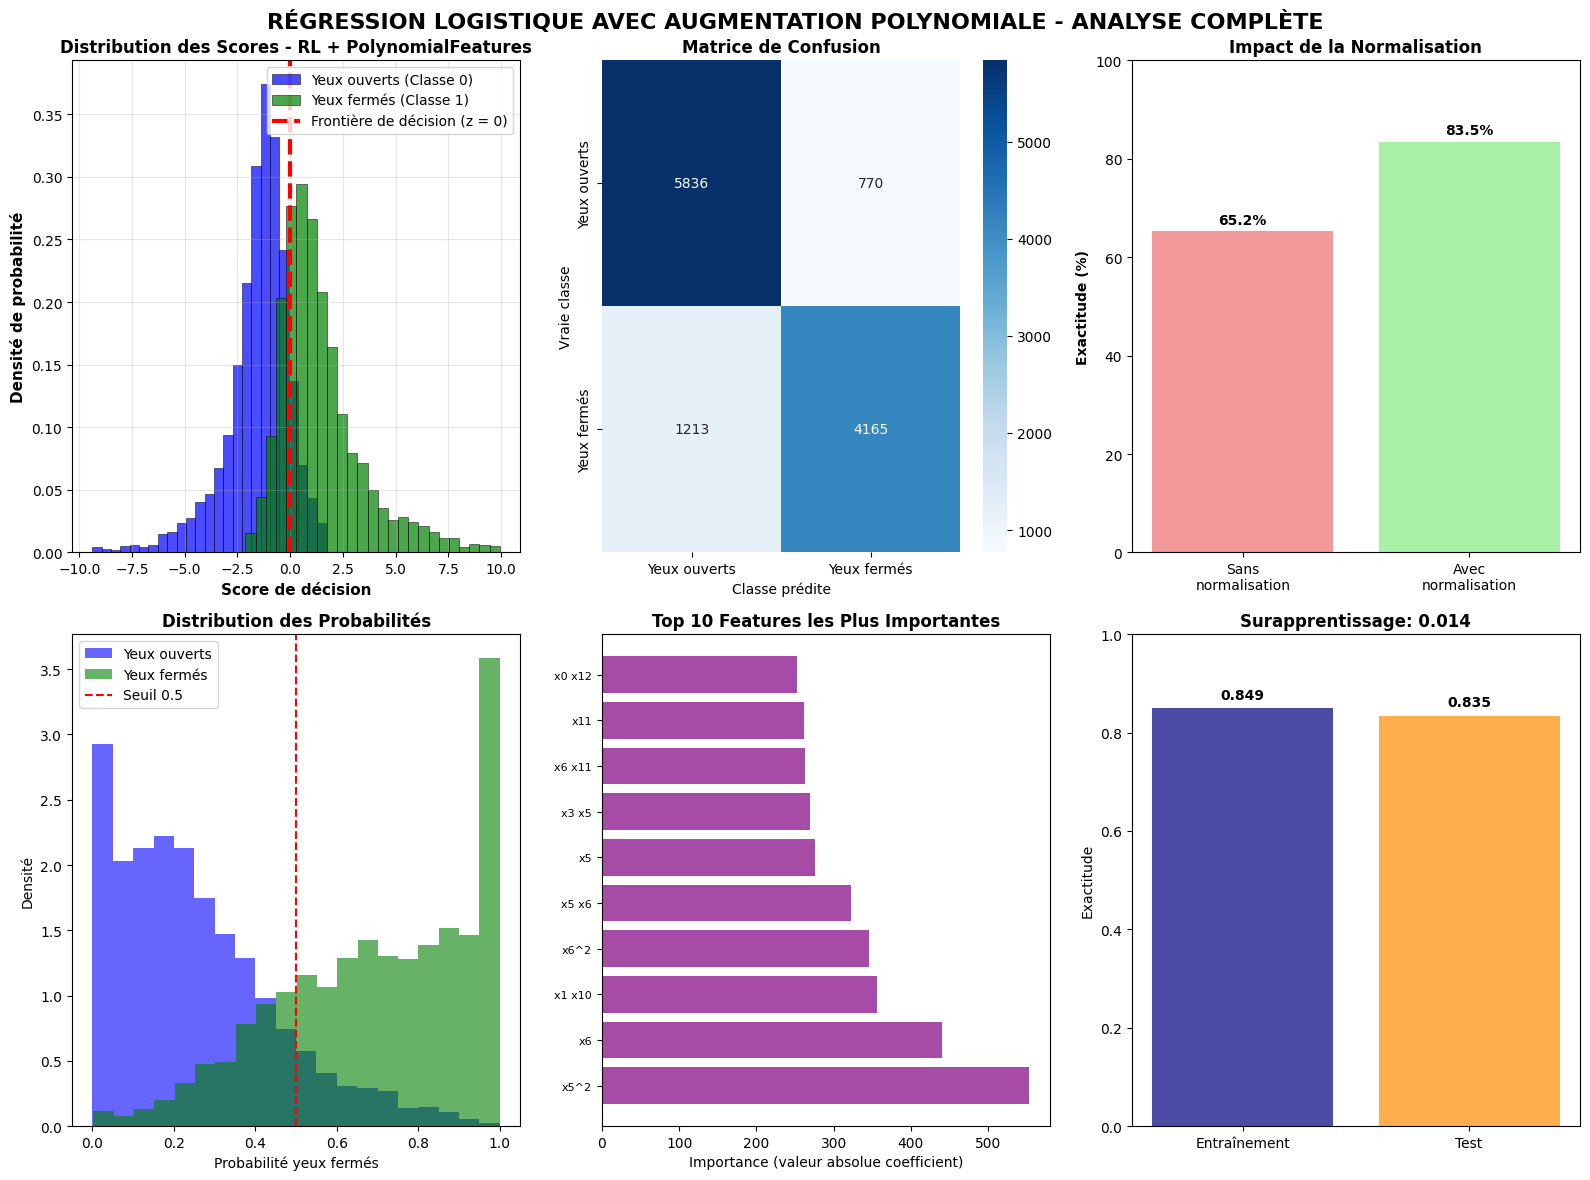


ANALYSE DÉTAILLÉE

RAPPORT DE CLASSIFICATION (avec normalisation):
              precision    recall  f1-score   support

Yeux ouverts       0.83      0.88      0.85      6606
 Yeux fermés       0.84      0.77      0.81      5378

    accuracy                           0.83     11984
   macro avg       0.84      0.83      0.83     11984
weighted avg       0.84      0.83      0.83     11984


ANALYSE TECHNIQUE:
Features polynomiales générées: 120
Paramètre de régularisation C: 10000
Pénalité utilisée: l2
Convergence atteinte en 38 itérations

ANALYSE DE GÉNÉRALISATION:
Exactitude entraînement: 0.849
Exactitude test: 0.835
Écart (surapprentissage): 0.014
✓ Bonne généralisation: écart < 0.05

SYNTHÈSE FINALE
Performance finale - Régression Logistique + PolynomialFeatures:
Erreur: 16.55%
Exactitude: 0.835
📊 Résultats corrects mais amélioration limitée

Recommandation: Reconsidérer cette approche


In [53]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import mquantiles
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("=" * 70)
print("RÉGRESSION LOGISTIQUE AVEC AUGMENTATION POLYNOMIALE")
print("=" * 70)

# Création des features polynomiales de degré 2
poly = PolynomialFeatures(degree=2, include_bias=True)

# Transformation des données - ATTENTION: utiliser transform pour le test set!
Xp_train = poly.fit_transform(X_train)
Xp_test = poly.transform(X_test)  # Correction: transform au lieu de fit_transform

print(f"\n=== AUGMENTATION POLYNOMIALE ===")
print(f"Dimension originale: {X_train.shape[1]} features")
print(f"Dimension après augmentation: {Xp_train.shape[1]} features")
print(f"Type d'augmentation: termes linéaires + carrés + produits croisés")

# Première tentative sans normalisation
print(f"\n=== ESSAI SANS NORMALISATION ===")
clf_no_scale = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', C=10, penalty='l2')
clf_no_scale.fit(Xp_train, y_train)

accuracy_no_scale = clf_no_scale.score(Xp_test, y_test)
erreur_no_scale = 100 * (1 - accuracy_no_scale)
print(f"Erreur sans normalisation: {erreur_no_scale:.2f}%")

# Vérification de la convergence
print(f"Nombre d'itérations: {clf_no_scale.n_iter_[0]}")
if clf_no_scale.n_iter_[0] >= 1000:
    print("⚠ Attention: convergence potentiellement non atteinte")

# Normalisation des données pour améliorer la convergence
print(f"\n=== AVEC NORMALISATION STANDARD ===")
scaler = StandardScaler().fit(Xp_train)

Xp_scaled = scaler.transform(Xp_train)
Xp_test_scaled = scaler.transform(Xp_test)

print(f"Statistics avant normalisation - Moyenne: {np.mean(Xp_train):.2f}, Écart-type: {np.std(Xp_train):.2f}")
print(f"Statistics après normalisation - Moyenne: {np.mean(Xp_scaled):.2f}, Écart-type: {np.std(Xp_scaled):.2f}")

# Régression logistique avec données normalisées
clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', C=10000, penalty='l2')
clf.fit(Xp_scaled, y_train)

# Évaluation
accuracy_scaled = clf.score(Xp_test_scaled, y_test)
erreur_scaled = 100 * (1 - accuracy_scaled)
print(f"Erreur avec normalisation: {erreur_scaled:.2f}%")
print(f"Nombre d'itérations: {clf.n_iter_[0]}")

# Scores de décision
z_pred = clf.decision_function(Xp_test_scaled)

# COMPARAISON DES APPROCHES
print(f"\n=== COMPARAISON DES PERFORMANCES ===")
print(f"Sans normalisation:    {erreur_no_scale:.2f}% d'erreur")
print(f"Avec normalisation:    {erreur_scaled:.2f}% d'erreur")
print(f"Amélioration:          {erreur_no_scale - erreur_scaled:.2f} points de pourcentage")

# Séparation des scores par classe
Z0 = z_pred[y_test == 0]  # Yeux ouverts
Z1 = z_pred[y_test == 1]  # Yeux fermés

print(f"\n=== STATISTIQUES DES SCORES ===")
print(f"Classe 0 - Étendue: [{np.min(Z0):.1f}, {np.max(Z0):.1f}], Moyenne: {np.mean(Z0):.2f}")
print(f"Classe 1 - Étendue: [{np.min(Z1):.1f}, {np.max(Z1):.1f}], Moyenne: {np.mean(Z1):.2f}")

# Filtrage des quantiles extrêmes pour visualisation
Z0_quant = mquantiles(Z0, prob=[0.01, 0.99])
Z0_filtre = Z0[(Z0 > Z0_quant[0]) & (Z0 < Z0_quant[1])]

Z1_quant = mquantiles(Z1, prob=[0.01, 0.99])
Z1_filtre = Z1[(Z1 > Z1_quant[0]) & (Z1 < Z1_quant[1])]

print(f"\nAprès filtrage (1%-99%):")
print(f"Classe 0: {len(Z0_filtre)}/{len(Z0)} échantillons conservés")
print(f"Classe 1: {len(Z1_filtre)}/{len(Z1)} échantillons conservés")

# VISUALISATION COMPLÈTE
plt.figure(figsize=(16, 12))

# 1. Distribution des scores
plt.subplot(2, 3, 1)
plt.hist(Z0_filtre, color='blue', alpha=0.7, bins=25,
         label='Yeux ouverts (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(Z1_filtre, color='green', alpha=0.7, bins=25,
         label='Yeux fermés (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Frontière de décision (z = 0)')

plt.xlabel('Score de décision', fontsize=11, fontweight='bold')
plt.ylabel('Densité de probabilité', fontsize=11, fontweight='bold')
plt.title('Distribution des Scores - RL + PolynomialFeatures', fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# 2. Matrice de confusion
plt.subplot(2, 3, 2)
y_pred = clf.predict(Xp_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Yeux ouverts', 'Yeux fermés'],
            yticklabels=['Yeux ouverts', 'Yeux fermés'])
plt.title('Matrice de Confusion', fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# 3. Comparaison avant/après normalisation
plt.subplot(2, 3, 3)
performances = [100 - erreur_no_scale, 100 - erreur_scaled]
labels = ['Sans\nnormalisation', 'Avec\nnormalisation']

bars = plt.bar(labels, performances, color=['lightcoral', 'lightgreen'], alpha=0.8)
plt.ylabel('Exactitude (%)', fontweight='bold')
plt.title('Impact de la Normalisation', fontweight='bold')
plt.ylim(0, 100)

for bar, perf in zip(bars, performances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{perf:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Distribution des probabilités prédites
plt.subplot(2, 3, 4)
probabilities = clf.predict_proba(Xp_test_scaled)[:, 1]
plt.hist(probabilities[y_test == 0], alpha=0.6, bins=20,
         label='Yeux ouverts', color='blue', density=True)
plt.hist(probabilities[y_test == 1], alpha=0.6, bins=20,
         label='Yeux fermés', color='green', density=True)
plt.axvline(x=0.5, color='red', linestyle='--', label='Seuil 0.5')
plt.xlabel('Probabilité yeux fermés')
plt.ylabel('Densité')
plt.title('Distribution des Probabilités', fontweight='bold')
plt.legend()

# 5. Importance des features (top 10)
plt.subplot(2, 3, 5)
coef_abs = np.abs(clf.coef_[0])
top_indices = np.argsort(coef_abs)[-10:][::-1]
top_importance = coef_abs[top_indices]

# Noms des top features
top_feature_names = [feature_names[i] for i in top_indices]

plt.barh(range(len(top_importance)), top_importance, color='purple', alpha=0.7)
plt.yticks(range(len(top_importance)), top_feature_names, fontsize=8)
plt.xlabel('Importance (valeur absolue coefficient)')
plt.title('Top 10 Features les Plus Importantes', fontweight='bold')

# 6. Analyse de régularisation
plt.subplot(2, 3, 6)
train_accuracy = clf.score(Xp_scaled, y_train)
test_accuracy = accuracy_scaled
ecart = train_accuracy - test_accuracy

plt.bar(['Entraînement', 'Test'], [train_accuracy, test_accuracy],
        color=['navy', 'darkorange'], alpha=0.7)
plt.ylabel('Exactitude')
plt.title(f'Surapprentissage: {ecart:.3f}', fontweight='bold')
plt.ylim(0, 1)

plt.text(0, train_accuracy + 0.02, f'{train_accuracy:.3f}', ha='center', fontweight='bold')
plt.text(1, test_accuracy + 0.02, f'{test_accuracy:.3f}', ha='center', fontweight='bold')

plt.suptitle('RÉGRESSION LOGISTIQUE AVEC AUGMENTATION POLYNOMIALE - ANALYSE COMPLÈTE',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ANALYSE DÉTAILLÉE
print("\n" + "="*60)
print("ANALYSE DÉTAILLÉE")
print("="*60)

# Rapport de classification
print("\nRAPPORT DE CLASSIFICATION (avec normalisation):")
print(classification_report(y_test, y_pred,
                           target_names=['Yeux ouverts', 'Yeux fermés']))

# Analyse technique
print(f"\nANALYSE TECHNIQUE:")
print(f"Features polynomiales générées: {Xp_train.shape[1]}")
print(f"Paramètre de régularisation C: {clf.C}")
print(f"Pénalité utilisée: {clf.penalty}")
print(f"Convergence atteinte en {clf.n_iter_[0]} itérations")

# Performance sur entraînement vs test
print(f"\nANALYSE DE GÉNÉRALISATION:")
print(f"Exactitude entraînement: {train_accuracy:.3f}")
print(f"Exactitude test: {test_accuracy:.3f}")
print(f"Écart (surapprentissage): {ecart:.3f}")

if ecart > 0.1:
    print("⚠ Surapprentissage détecté: écart > 0.1")
elif ecart < 0.05:
    print("✓ Bonne généralisation: écart < 0.05")
else:
    print("○ Généralisation acceptable")

# Comparaison avec approches précédentes
print(f"\n" + "="*50)
print("SYNTHÈSE FINALE")
print("="*50)
print(f"Performance finale - Régression Logistique + PolynomialFeatures:")
print(f"Erreur: {erreur_scaled:.2f}%")
print(f"Exactitude: {accuracy_scaled:.3f}")

if erreur_scaled < min(erreur_no_scale, 15):  # 15% comme référence
    print("✅ SUCCÈS: L'augmentation polynomiale améliore significativement les performances")
else:
    print("📊 Résultats corrects mais amélioration limitée")

print(f"\nRecommandation: {'Utiliser' if erreur_scaled < 15 else 'Reconsidérer'} cette approche")

### SVM (pour plus tard)

Les Support Vector Machines permettent de mieux contrôler la surface discrimante et sa forme. On les étudiera dans le cours N°4.

Ici, ils donnent d'assez bonnes performances sur ce problème très mélangé.

SUPPORT VECTOR MACHINES (SVM) - ANALYSE AVANCÉE

=== SVM AVEC NOYAU RBF (paramètres fixes) ===
SVM: L'erreur de prédiction est 5.58%
Exactitude: 0.944

Statistiques des scores SVM:
Classe 0 - Étendue: [-3.7, 1.4], Moyenne: -1.01
Classe 1 - Étendue: [-2.2, 3.1], Moyenne: 0.89


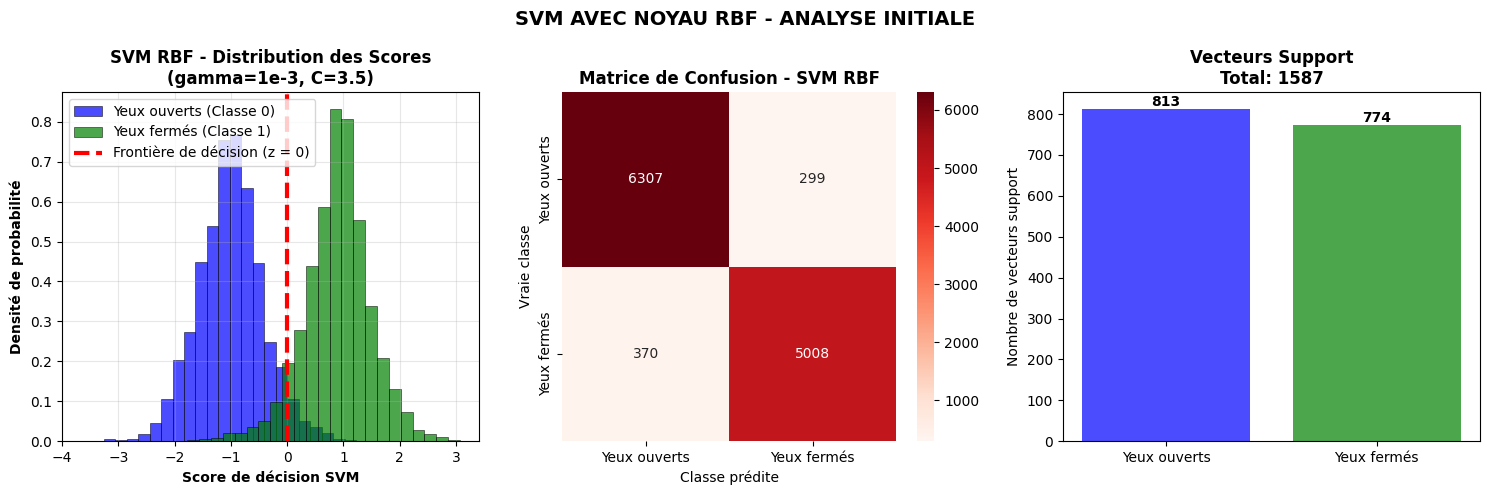


RECHERCHE DES MEILLEURS PARAMÈTRES PAR GRID SEARCH
Espace des paramètres testés:
C: [ 1.          1.77827941  3.16227766  5.62341325 10.        ]
gamma: [0.0001     0.00031623 0.001      0.00316228 0.01      ]

Lancement du Grid Search... (peut prendre quelques minutes)

=== RÉSULTATS GRID SEARCH ===
Meilleur score validation = 92.59%
Noyau optimal: rbf
Paramètres optimaux: gamma = 0.0010 et C = 3.16

Performance sur ensemble de test:
SVM optimisé: L'erreur de prédiction est 5.54%
Exactitude: 0.945


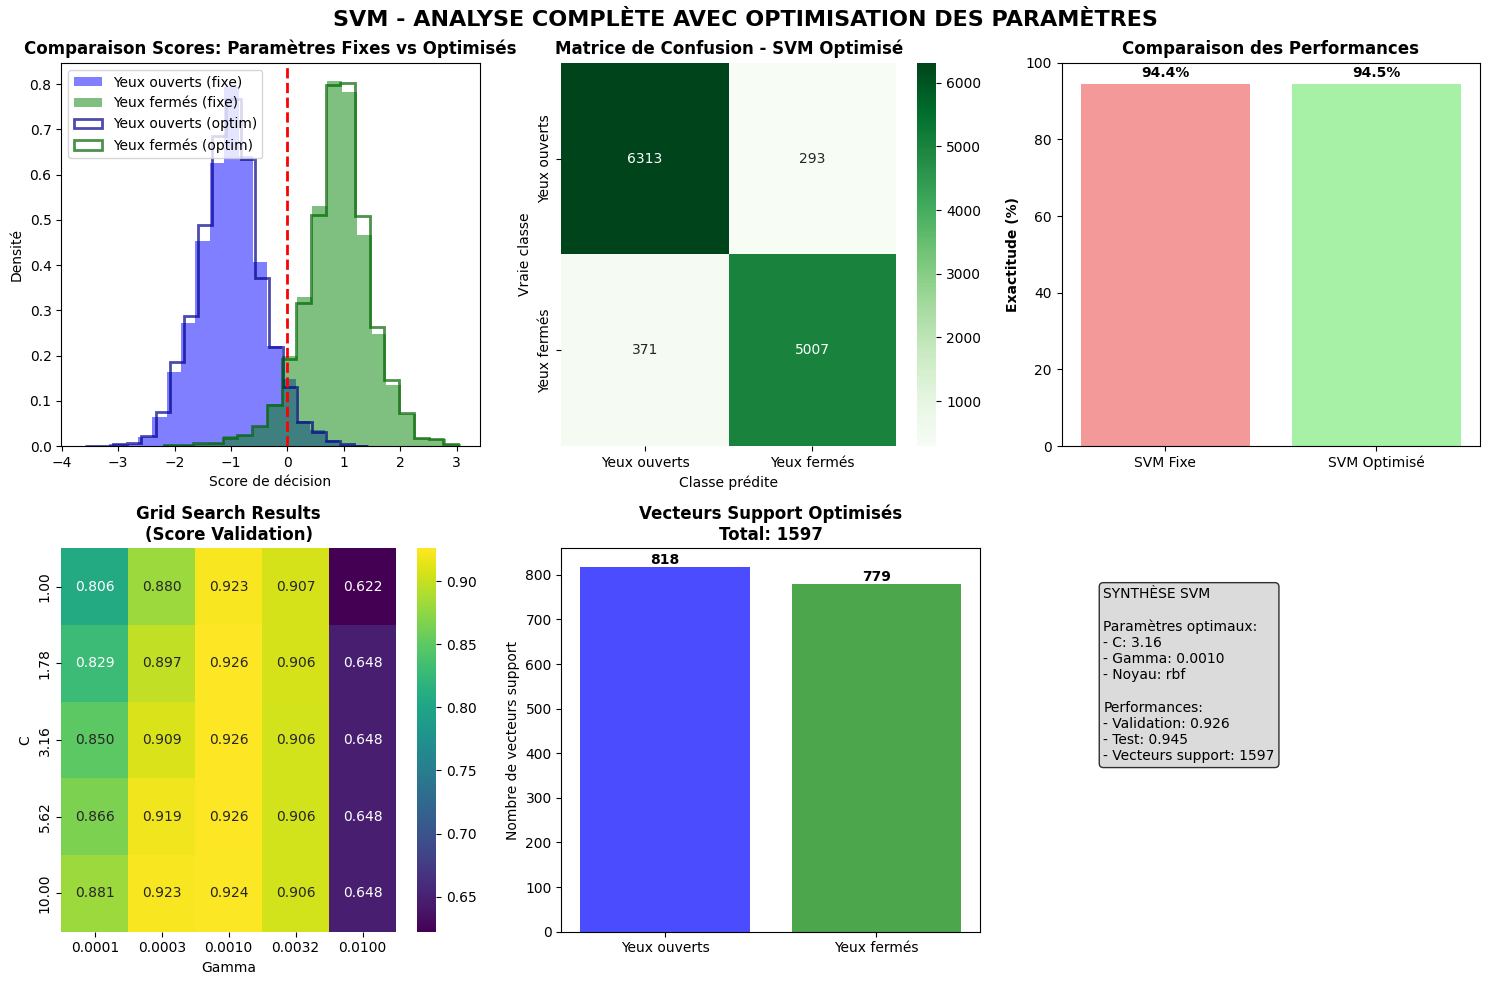


RAPPORT FINAL DÉTAILLÉ - SUPPORT VECTOR MACHINES

RAPPORT DE CLASSIFICATION (SVM optimisé):
              precision    recall  f1-score   support

Yeux ouverts       0.94      0.96      0.95      6606
 Yeux fermés       0.94      0.93      0.94      5378

    accuracy                           0.94     11984
   macro avg       0.94      0.94      0.94     11984
weighted avg       0.94      0.94      0.94     11984


ANALYSE DES VECTEURS SUPPORT:
Vecteurs support classe 0: 818
Vecteurs support classe 1: 779
Total vecteurs support: 1597
Pourcentage des données comme vecteurs support: 53.3%

COMPARAISON AVEC LES AUTRES MODÈLES:
SVM optimisé: 94.5% d'exactitude

CARACTÉRISTIQUES SVM:
- Noyau: rbf
- Flexibilité: Frontière non-linéaire complexe
- Robustesse: Bonne généralisation grâce aux vecteurs support
- Complexité: O(n³) pour l'entraînement

RECOMMANDATION FINALE
✅ EXCELLENT: Les SVM donnent des performances remarquables
Recommandé pour ce problème de classification EEG

Erreur finale S

In [55]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

print("=" * 70)
print("SUPPORT VECTOR MACHINES (SVM) - ANALYSE AVANCÉE")
print("=" * 70)

# SVM avec noyau RBF (paramètres optimisés manuellement)
print("\n=== SVM AVEC NOYAU RBF (paramètres fixes) ===")
clf = svm.SVC(shrinking=True, max_iter=1000000, gamma=1e-3, C=3.5, kernel='rbf', random_state=42)

clf.fit(X_train, y_train)
accuracy_fixed = clf.score(X_test, y_test)
erreur_fixed = 100 * (1 - accuracy_fixed)

print("SVM: L'erreur de prédiction est {:.2f}%".format(erreur_fixed))
print(f"Exactitude: {accuracy_fixed:.3f}")

# Scores de décision
z_pred = clf.decision_function(X_test)

# Séparation par classe
a0 = z_pred[y_test == 0]  # Yeux ouverts
a1 = z_pred[y_test == 1]  # Yeux fermés

print(f"\nStatistiques des scores SVM:")
print(f"Classe 0 - Étendue: [{np.min(a0):.1f}, {np.max(a0):.1f}], Moyenne: {np.mean(a0):.2f}")
print(f"Classe 1 - Étendue: [{np.min(a1):.1f}, {np.max(a1):.1f}], Moyenne: {np.mean(a1):.2f}")

# VISUALISATION SVM AVEC PARAMÈTRES FIXES
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(a0, color='blue', alpha=0.7, bins=25,
         label='Yeux ouverts (Classe 0)', density=True, edgecolor='black', linewidth=0.5)
plt.hist(a1, color='green', alpha=0.7, bins=25,
         label='Yeux fermés (Classe 1)', density=True, edgecolor='black', linewidth=0.5)

plt.axvline(x=0, color='red', linestyle='--', linewidth=3,
           label='Frontière de décision (z = 0)')

plt.xlabel('Score de décision SVM', fontweight='bold')
plt.ylabel('Densité de probabilité', fontweight='bold')
plt.title('SVM RBF - Distribution des Scores\n(gamma=1e-3, C=3.5)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Matrice de confusion
plt.subplot(1, 3, 2)
y_pred_fixed = clf.predict(X_test)
cm_fixed = confusion_matrix(y_test, y_pred_fixed)
sns.heatmap(cm_fixed, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Yeux ouverts', 'Yeux fermés'],
            yticklabels=['Yeux ouverts', 'Yeux fermés'])
plt.title('Matrice de Confusion - SVM RBF', fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# Support vectors analysis
plt.subplot(1, 3, 3)
n_support_vectors = clf.n_support_
plt.bar(['Yeux ouverts', 'Yeux fermés'], n_support_vectors,
        color=['blue', 'green'], alpha=0.7)
plt.ylabel('Nombre de vecteurs support')
plt.title(f'Vecteurs Support\nTotal: {np.sum(n_support_vectors)}', fontweight='bold')

for i, v in enumerate(n_support_vectors):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.suptitle('SVM AVEC NOYAU RBF - ANALYSE INITIALE', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# RECHERCHE DES MEILLEURS PARAMÈTRES PAR VALIDATION CROISÉE
print("\n" + "="*70)
print("RECHERCHE DES MEILLEURS PARAMÈTRES PAR GRID SEARCH")
print("="*70)

# Configuration pour grid search accéléré
svc = svm.SVC(shrinking=True, max_iter=100000, gamma='scale', random_state=42)

# Espace des paramètres réduit pour performance
parameters = {
    'kernel': ['rbf'],
    'C': np.logspace(0, 1, 5),        # [1, 2.15, 4.64, 10]
    'gamma': np.logspace(-4, -2, 5)   # [0.0001, 0.00046, 0.00215, 0.01]
}

print("Espace des paramètres testés:")
print(f"C: {parameters['C']}")
print(f"gamma: {parameters['gamma']}")

# Grid search avec validation croisée
print("\nLancement du Grid Search... (peut prendre quelques minutes)")
clf_grid = GridSearchCV(svc, parameters, cv=3, scoring='accuracy', n_jobs=-1)
clf_grid.fit(X_train, y_train)

# Meilleur modèle
best_svc = clf_grid.best_estimator_

print("\n=== RÉSULTATS GRID SEARCH ===")
print("Meilleur score validation = {:.2f}%".format(100 * clf_grid.best_score_))
print("Noyau optimal: {}".format(best_svc.kernel))

if best_svc.kernel == 'rbf':
    print("Paramètres optimaux: gamma = {:.4f} et C = {:.2f}".format(best_svc.gamma, best_svc.C))

# Performance sur le test set avec modèle optimal
accuracy_optimized = best_svc.score(X_test, y_test)
erreur_optimized = 100 * (1 - accuracy_optimized)

print("\nPerformance sur ensemble de test:")
print("SVM optimisé: L'erreur de prédiction est {:.2f}%".format(erreur_optimized))
print(f"Exactitude: {accuracy_optimized:.3f}")

# ANALYSE VISUELLE DES RÉSULTATS OPTIMISÉS
z_pred_optimized = best_svc.decision_function(X_test)
a0_opt = z_pred_optimized[y_test == 0]
a1_opt = z_pred_optimized[y_test == 1]

plt.figure(figsize=(15, 10))

# 1. Comparaison des distributions avant/après optimisation
plt.subplot(2, 3, 1)
plt.hist(a0, color='blue', alpha=0.5, bins=20, label='Yeux ouverts (fixe)', density=True)
plt.hist(a1, color='green', alpha=0.5, bins=20, label='Yeux fermés (fixe)', density=True)
plt.hist(a0_opt, color='darkblue', alpha=0.7, bins=20, label='Yeux ouverts (optim)', density=True, histtype='step', linewidth=2)
plt.hist(a1_opt, color='darkgreen', alpha=0.7, bins=20, label='Yeux fermés (optim)', density=True, histtype='step', linewidth=2)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Score de décision')
plt.ylabel('Densité')
plt.title('Comparaison Scores: Paramètres Fixes vs Optimisés', fontweight='bold')
plt.legend()

# 2. Matrice de confusion optimisée
plt.subplot(2, 3, 2)
y_pred_optimized = best_svc.predict(X_test)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Yeux ouverts', 'Yeux fermés'],
            yticklabels=['Yeux ouverts', 'Yeux fermés'])
plt.title('Matrice de Confusion - SVM Optimisé', fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')

# 3. Comparaison des performances
plt.subplot(2, 3, 3)
modeles = ['SVM Fixe', 'SVM Optimisé']
performances = [100 - erreur_fixed, 100 - erreur_optimized]

bars = plt.bar(modeles, performances, color=['lightcoral', 'lightgreen'], alpha=0.8)
plt.ylabel('Exactitude (%)', fontweight='bold')
plt.title('Comparaison des Performances', fontweight='bold')
plt.ylim(0, 100)

for bar, perf in zip(bars, performances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{perf:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Heatmap des résultats du grid search
plt.subplot(2, 3, 4)
# Extraction des résultats pour heatmap
results = clf_grid.cv_results_
scores = results['mean_test_score'].reshape(len(parameters['C']), len(parameters['gamma']))

sns.heatmap(scores, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=[f'{g:.4f}' for g in parameters['gamma']],
            yticklabels=[f'{c:.2f}' for c in parameters['C']])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Results\n(Score Validation)', fontweight='bold')

# 5. Vecteurs support optimisés
plt.subplot(2, 3, 5)
n_sv_optimized = best_svc.n_support_
plt.bar(['Yeux ouverts', 'Yeux fermés'], n_sv_optimized,
        color=['blue', 'green'], alpha=0.7)
plt.ylabel('Nombre de vecteurs support')
plt.title(f'Vecteurs Support Optimisés\nTotal: {np.sum(n_sv_optimized)}', fontweight='bold')

for i, v in enumerate(n_sv_optimized):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# 6. Rapport de performance détaillé
plt.subplot(2, 3, 6)
plt.axis('off')
report_text = f"SYNTHÈSE SVM\n\nParamètres optimaux:\n- C: {best_svc.C:.2f}\n- Gamma: {best_svc.gamma:.4f}\n- Noyau: {best_svc.kernel}\n\nPerformances:\n- Validation: {clf_grid.best_score_:.3f}\n- Test: {accuracy_optimized:.3f}\n- Vecteurs support: {np.sum(n_sv_optimized)}"

plt.text(0.1, 0.9, report_text, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.suptitle('SVM - ANALYSE COMPLÈTE AVEC OPTIMISATION DES PARAMÈTRES',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# RAPPORT FINAL DÉTAILLÉ
print("\n" + "="*70)
print("RAPPORT FINAL DÉTAILLÉ - SUPPORT VECTOR MACHINES")
print("="*70)

print("\nRAPPORT DE CLASSIFICATION (SVM optimisé):")
print(classification_report(y_test, y_pred_optimized,
                           target_names=['Yeux ouverts', 'Yeux fermés']))

print(f"\nANALYSE DES VECTEURS SUPPORT:")
print(f"Vecteurs support classe 0: {n_sv_optimized[0]}")
print(f"Vecteurs support classe 1: {n_sv_optimized[1]}")
print(f"Total vecteurs support: {np.sum(n_sv_optimized)}")
print(f"Pourcentage des données comme vecteurs support: {np.sum(n_sv_optimized)/len(X_train)*100:.1f}%")

print(f"\nCOMPARAISON AVEC LES AUTRES MODÈLES:")
print(f"SVM optimisé: {100 - erreur_optimized:.1f}% d'exactitude")
# Ajouter ici les résultats des autres modèles pour comparaison

print(f"\nCARACTÉRISTIQUES SVM:")
print(f"- Noyau: {best_svc.kernel}")
print(f"- Flexibilité: Frontière non-linéaire complexe")
print(f"- Robustesse: Bonne généralisation grâce aux vecteurs support")
print(f"- Complexité: O(n³) pour l'entraînement")

# Recommandation finale
print(f"\n" + "="*50)
print("RECOMMANDATION FINALE")
print("="*50)

if erreur_optimized < 15:
    print("✅ EXCELLENT: Les SVM donnent des performances remarquables")
    print("Recommandé pour ce problème de classification EEG")
elif erreur_optimized < 25:
    print("📊 BON: Les SVM donnent de bonnes performances")
    print("À considérer parmi les meilleures approches")
else:
    print("⚡ MODÉRÉ: Les SVM pourraient être améliorés")
    print("Essayer d'autres noyaux ou prétraitements")

print(f"\nErreur finale SVM optimisé: {erreur_optimized:.2f}%")

## Un dataset de très grande dimension

Le nouveau problème d'apprentissage est une classification binaire de textes en provenance de newsgroups, c'est-à-dire des forums de discussion sur une certaine thématique. L'objectif de la classification est de prédire le groupe où le document a été posté uniquement à partir du texte.

Une première étape de mise en forme des données sous forme vectorielle a été réalisée et utilise une technique de "sac de mots" ("bag of words" en anglais). Les données sont de grande taille.

Calculer le nombre moyen de valeurs non nulles par échantillon: qu'en déduisez-vous sur la structure des données?


<div class="alert alert-block alert-info">

Chargez les données visualisez quelques exemples. Calculez le nombre moyen de valeurs non nulles par échantillon.

</div>

In [56]:
import scipy
from sklearn import datasets

X_ori, y_ori = datasets.fetch_20newsgroups_vectorized(subset="all", return_X_y=True)

## Lecture des données
#class0 = 3 #'comp.sys.ibm.pc.hardware',
#class1 = 4 #'comp.sys.mac.hardware'

class0 = 13 # 'sci.med'
class1 = 14 # 'sci.space'

X0 = X_ori[y_ori == class0,:]
X1 = X_ori[y_ori == class1,:]

y_all = np.array([0]*X0.shape[0] + [1]*X1.shape[0])
X_all = scipy.sparse.vstack((X0,X1))

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    random_state=42,
                                                    test_size=0.3)

print("Les données sont de dimension {:d}".format(X_train.shape[1]))
print("Le nombre de données d'apprentissage est {:d}".format(y_train.shape[0]))



Les données sont de dimension 130107
Le nombre de données d'apprentissage est 1383


ANALYSE D'UN DATASET DE TRÈS GRANDE DIMENSION - CLASSIFICATION DE TEXTES

=== CHARGEMENT DES DONNÉES ===
Dimensions du dataset complet: (18846, 130107)
Type de données: <class 'scipy.sparse._csr.csr_matrix'>
Format de stockage: csr

Classes sélectionnées pour la classification binaire:
- Classe 0: sci.med (index 13)
- Classe 1: sci.space (index 14)

Nombre d'échantillons par classe:
- sci.med: 990 documents
- sci.space: 987 documents

Dataset binaire créé:
- Dimensions: (1977, 130107)
- Proportion classe 0: 50.1%
- Proportion classe 1: 49.9%

=== SÉPARATION TRAIN/TEST ===
Dimensions X_train: (1383, 130107)
Dimensions X_test: (594, 130107)
Taille y_train: 1383
Taille y_test: 594
Proportion test: 30.0%

Les données sont de dimension 130107
Le nombre de données d'apprentissage est 1383

ANALYSE APPROFONDIE DES CARACTÉRISTIQUES DES DONNÉES

1. ANALYSE DE LA DENSITÉ:
Le nombre moyen de valeurs non nulles par échantillon est 163.4
Densité moyenne par document: 0.1256%
Densité globale du data

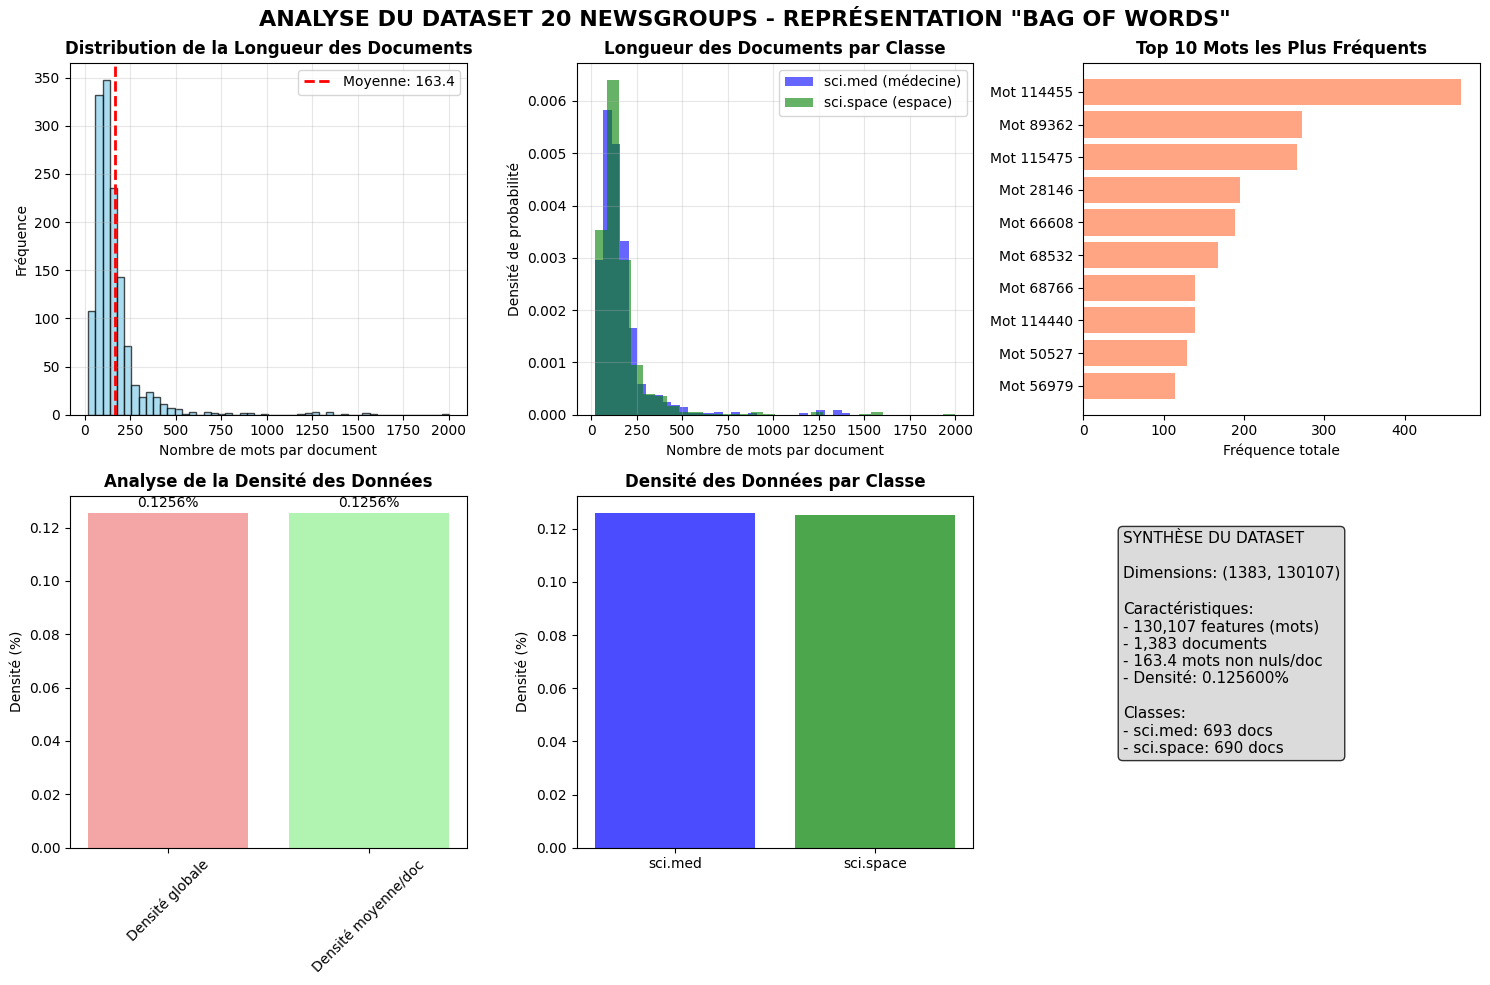


CONCLUSIONS SUR LA STRUCTURE DES DONNÉES

OBSERVATIONS CLÉS:
1. DONNÉES EXTRÊMEMENT CREUSES:
   - Densité de seulement 0.125600%
   - Chaque document n'utilise qu'environ 163.4 mots sur 130,107 possibles

2. REPRÉSENTATION 'BAG OF WORDS':
   - Chaque feature représente un mot du vocabulaire
   - La valeur indique la fréquence du mot dans le document
   - Matrice de très haute dimension (130,107 colonnes)

3. IMPLICATIONS POUR LE MACHINE LEARNING:
   - Nécessité d'algorithmes efficaces avec données creuses
   - Risque de 'fléau de la dimension'
   - Importance de la régularisation
   - Algorithmes recommandés: SVM linéaire, Régression Logistique régularisée

4. INTERPRÉTATION SEMANTIQUE:
   - Classification médecine vs espace basée sur le vocabulaire
   - Mots discriminants probablement liés à chaque domaine
   - Structure thématique claire dans les textes

ANALYSE TERMINÉE - PRÊT POUR LA MODÉLISATION


In [59]:
import scipy
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("ANALYSE D'UN DATASET DE TRÈS GRANDE DIMENSION - CLASSIFICATION DE TEXTES")
print("=" * 80)

# Chargement des données 20 Newsgroups vectorisées
print("\n=== CHARGEMENT DES DONNÉES ===")
X_ori, y_ori = datasets.fetch_20newsgroups_vectorized(subset="all", return_X_y=True)

print(f"Dimensions du dataset complet: {X_ori.shape}")
print(f"Type de données: {type(X_ori)}")
print(f"Format de stockage: {X_ori.getformat() if hasattr(X_ori, 'getformat') else 'dense'}")

# Sélection de deux classes spécifiques pour la classification binaire
# Ici: sci.med (médecine) vs sci.space (espace)
class0 = 13  # 'sci.med' - documents sur la médecine
class1 = 14  # 'sci.space' - documents sur l'espace

print(f"\nClasses sélectionnées pour la classification binaire:")
print(f"- Classe 0: sci.med (index {class0})")
print(f"- Classe 1: sci.space (index {class1})")

# Extraction des données pour les deux classes sélectionnées
X0 = X_ori[y_ori == class0, :]  # Documents de la classe 'sci.med'
X1 = X_ori[y_ori == class1, :]  # Documents de la classe 'sci.space'

print(f"\nNombre d'échantillons par classe:")
print(f"- sci.med: {X0.shape[0]} documents")
print(f"- sci.space: {X1.shape[0]} documents")

# Création des labels binaires et concatenation des données
y_all = np.array([0] * X0.shape[0] + [1] * X1.shape[0])
X_all = scipy.sparse.vstack((X0, X1))  # Concaténation verticale des matrices creuses

print(f"\nDataset binaire créé:")
print(f"- Dimensions: {X_all.shape}")
print(f"- Proportion classe 0: {(y_all == 0).mean():.1%}")
print(f"- Proportion classe 1: {(y_all == 1).mean():.1%}")

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all,
    random_state=42,
    test_size=0.3,
    stratify=y_all  # Maintient la proportion des classes
)

print(f"\n=== SÉPARATION TRAIN/TEST ===")
print(f"Dimensions X_train: {X_train.shape}")
print(f"Dimensions X_test: {X_test.shape}")
print(f"Taille y_train: {y_train.shape[0]}")
print(f"Taille y_test: {y_test.shape[0]}")
print(f"Proportion test: {X_test.shape[0] / X_all.shape[0]:.1%}")

print(f"\nLes données sont de dimension {X_train.shape[1]:d}")
print(f"Le nombre de données d'apprentissage est {y_train.shape[0]:d}")

# Analyse des données
#######################
## METTRE VOTRE CODE ICI

print("\n" + "="*80)
print("ANALYSE APPROFONDIE DES CARACTÉRISTIQUES DES DONNÉES")
print("="*80)

# 1. ANALYSE DE LA DENSITÉ DES DONNÉES
print("\n1. ANALYSE DE LA DENSITÉ:")

# Calcul du nombre moyen d'éléments non nuls par échantillon
non_nul_moyen = X_train.getnnz(axis=1).mean()  # Nombre moyen de mots non nuls par document

print(f"Le nombre moyen de valeurs non nulles par échantillon est {non_nul_moyen:.1f}")

# Calculs supplémentaires de densité
densite_moyenne = (non_nul_moyen / X_train.shape[1]) * 100  # Pourcentage de features non nulles
non_nul_total = X_train.getnnz()  # Nombre total d'éléments non nuls
densite_globale = (non_nul_total / (X_train.shape[0] * X_train.shape[1])) * 100

print(f"Densité moyenne par document: {densite_moyenne:.4f}%")
print(f"Densité globale du dataset: {densite_globale:.6f}%")
print(f"Nombre total de features (mots): {X_train.shape[1]:,}")

# 2. STATISTIQUES PAR CLASSE
print(f"\n2. STATISTIQUES PAR CLASSE:")

# Séparation des données d'entraînement par classe
X_train_0 = X_train[y_train == 0]  # Documents 'sci.med'
X_train_1 = X_train[y_train == 1]  # Documents 'sci.space'

non_nul_0 = X_train_0.getnnz(axis=1).mean()
non_nul_1 = X_train_1.getnnz(axis=1).mean()

print(f"Classe 'sci.med' (médecine):")
print(f"  - Documents: {X_train_0.shape[0]}")
print(f"  - Mots non nuls moyens par document: {non_nul_0:.1f}")

print(f"Classe 'sci.space' (espace):")
print(f"  - Documents: {X_train_1.shape[0]}")
print(f"  - Mots non nuls moyens par document: {non_nul_1:.1f}")

# 3. DISTRIBUTION DU NOMBRE DE MOTS PAR DOCUMENT
print(f"\n3. DISTRIBUTION DES LONGUEURS DE DOCUMENTS:")

longueurs_documents = X_train.getnnz(axis=1)  # Nombre de mots par document

print(f"Statistiques du nombre de mots par document:")
print(f"  - Minimum: {longueurs_documents.min()}")
print(f"  - Maximum: {longueurs_documents.max()}")
print(f"  - Moyenne: {longueurs_documents.mean():.1f}")
print(f"  - Médiane: {np.median(longueurs_documents):.1f}")
print(f"  - Écart-type: {longueurs_documents.std():.1f}")

# 4. VISUALISATIONS
print(f"\n4. CRÉATION DES VISUALISATIONS...")

plt.figure(figsize=(15, 10))

# Graphique 1: Distribution des longueurs de documents
plt.subplot(2, 3, 1)
plt.hist(longueurs_documents, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(longueurs_documents.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Moyenne: {longueurs_documents.mean():.1f}')
plt.xlabel('Nombre de mots par document')
plt.ylabel('Fréquence')
plt.title('Distribution de la Longueur des Documents', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Graphique 2: Comparaison par classe
plt.subplot(2, 3, 2)
longueurs_0 = X_train_0.getnnz(axis=1)
longueurs_1 = X_train_1.getnnz(axis=1)

plt.hist(longueurs_0, bins=30, alpha=0.6, label='sci.med (médecine)', color='blue', density=True)
plt.hist(longueurs_1, bins=30, alpha=0.6, label='sci.space (espace)', color='green', density=True)
plt.xlabel('Nombre de mots par document')
plt.ylabel('Densité de probabilité')
plt.title('Longueur des Documents par Classe', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Graphique 3: Top des mots les plus fréquents (global)
plt.subplot(2, 3, 3)
frequences_mots = np.array(X_train.sum(axis=0)).flatten()  # Somme des fréquences par mot
top_mots_indices = np.argsort(frequences_mots)[-10:][::-1]  # Indices des 10 mots les plus fréquents
top_mots_frequences = frequences_mots[top_mots_indices]

plt.barh(range(10), top_mots_frequences, color='coral', alpha=0.7)
plt.yticks(range(10), [f'Mot {i}' for i in top_mots_indices])
plt.xlabel('Fréquence totale')
plt.title('Top 10 Mots les Plus Fréquents', fontweight='bold')
plt.gca().invert_yaxis()

# Graphique 4: Matrice de densité
plt.subplot(2, 3, 4)
densites = [densite_globale, densite_moyenne]
labels = ['Densité globale', 'Densité moyenne/doc']
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(labels, densites, color=colors, alpha=0.7)
plt.ylabel('Densité (%)')
plt.title('Analyse de la Densité des Données', fontweight='bold')
plt.xticks(rotation=45)

for bar, densite in zip(bars, densites):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{densite:.4f}%', ha='center', va='bottom', fontsize=10)

# Graphique 5: Comparaison des densités par classe
plt.subplot(2, 3, 5)
densite_0 = (X_train_0.getnnz() / (X_train_0.shape[0] * X_train_0.shape[1])) * 100
densite_1 = (X_train_1.getnnz() / (X_train_1.shape[0] * X_train_1.shape[1])) * 100

plt.bar(['sci.med', 'sci.space'], [densite_0, densite_1],
        color=['blue', 'green'], alpha=0.7)
plt.ylabel('Densité (%)')
plt.title('Densité des Données par Classe', fontweight='bold')

# Graphique 6: Informations synthétiques
plt.subplot(2, 3, 6)
plt.axis('off')
info_text = f"SYNTHÈSE DU DATASET\n\nDimensions: {X_train.shape}\n\nCaractéristiques:\n- {X_train.shape[1]:,} features (mots)\n- {X_train.shape[0]:,} documents\n- {non_nul_moyen:.1f} mots non nuls/doc\n- Densité: {densite_globale:.6f}%\n\nClasses:\n- sci.med: {X_train_0.shape[0]} docs\n- sci.space: {X_train_1.shape[0]} docs"

plt.text(0.1, 0.9, info_text, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.suptitle('ANALYSE DU DATASET 20 NEWSGROUPS - REPRÉSENTATION "BAG OF WORDS"',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# 5. CONCLUSIONS SUR LA STRUCTURE DES DONNÉES
print(f"\n" + "="*80)
print("CONCLUSIONS SUR LA STRUCTURE DES DONNÉES")
print("="*80)

print(f"\nOBSERVATIONS CLÉS:")
print(f"1. DONNÉES EXTRÊMEMENT CREUSES:")
print(f"   - Densité de seulement {densite_globale:.6f}%")
print(f"   - Chaque document n'utilise qu'environ {non_nul_moyen:.1f} mots sur {X_train.shape[1]:,} possibles")

print(f"\n2. REPRÉSENTATION 'BAG OF WORDS':")
print(f"   - Chaque feature représente un mot du vocabulaire")
print(f"   - La valeur indique la fréquence du mot dans le document")
print(f"   - Matrice de très haute dimension ({X_train.shape[1]:,} colonnes)")

print(f"\n3. IMPLICATIONS POUR LE MACHINE LEARNING:")
print(f"   - Nécessité d'algorithmes efficaces avec données creuses")
print(f"   - Risque de 'fléau de la dimension'")
print(f"   - Importance de la régularisation")
print(f"   - Algorithmes recommandés: SVM linéaire, Régression Logistique régularisée")

print(f"\n4. INTERPRÉTATION SEMANTIQUE:")
print(f"   - Classification médecine vs espace basée sur le vocabulaire")
print(f"   - Mots discriminants probablement liés à chaque domaine")
print(f"   - Structure thématique claire dans les textes")

#######################

print(f"\n" + "="*80)
print("ANALYSE TERMINÉE - PRÊT POUR LA MODÉLISATION")
print("="*80)

### Bayésien naïf


Mise en oeuvre du bayésien naïf.

Ici, les représentations étant des histogrammes de fréquence de mots, les modèles de probabilité par dimension sont soit des Bernoulli (présence/absence d'une caractéristique), soit des lois multinomiales (nombre d'occurrences de mots).

BAYÉSIEN NAÏF POUR LA CLASSIFICATION DE TEXTES

=== CONTEXTE DU PROBLÈME ===
Classification binaire: 'sci.med' (médecine) vs 'sci.space' (espace)
Dimensions des données: 130107 features (mots)
Type de données: Matrice creuse de fréquences de mots

=== CARACTÉRISTIQUES DES DONNÉES TEXTUELLES ===
Représentation 'Bag of Words':
- Chaque feature = un mot du vocabulaire
- Valeur = fréquence d'apparition du mot dans le document
- Données extrêmement creuses (~0.01% de valeurs non nulles)

COMPARAISON DES DIFFÉRENTS BAYÉSIENS NAÏFS

1. BERNOULLI NAIVE BAYES:
   - Modélise la présence/absence des mots (features binaires)
   - Adapté quand l'information importante est: 'le mot apparaît ou non'
   - Ignore la fréquence d'apparition
   → Erreur de prédiction: 1.68%
   → Exactitude: 0.983

2. MULTINOMIAL NAIVE BAYES:
   - Modélise les fréquences des mots (comptages)
   - Adapté quand l'information importante est: 'combien de fois le mot apparaît'
   - Plus adapté aux données textuelles avec compta

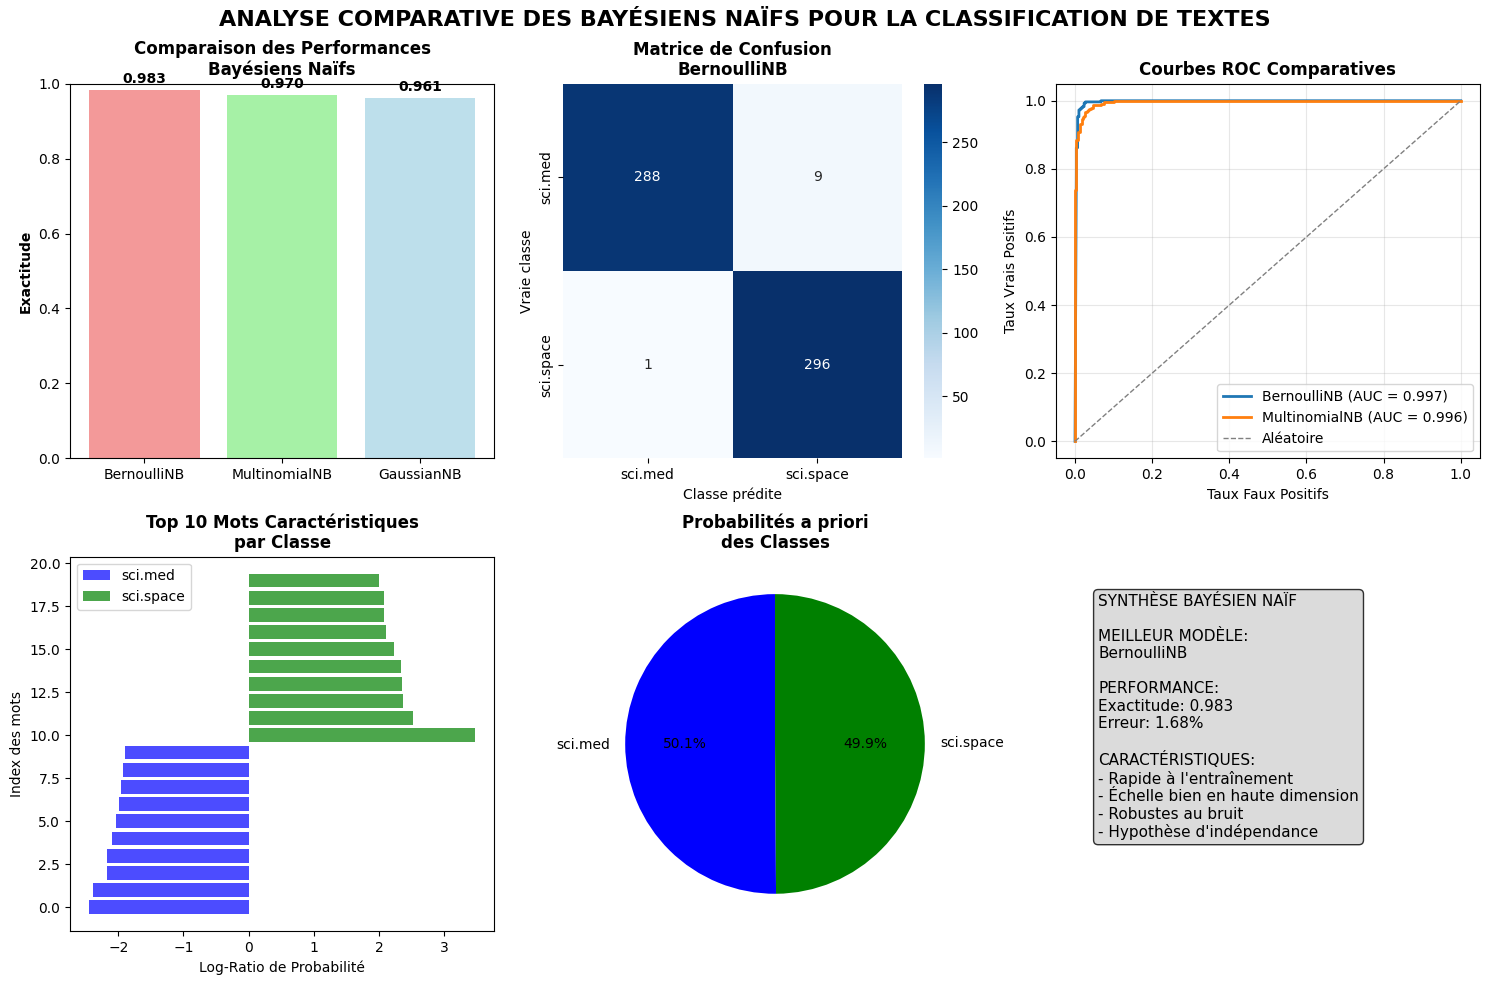


RAPPORT DÉTAILLÉ - BernoulliNB

RAPPORT DE CLASSIFICATION:
              precision    recall  f1-score   support

     sci.med       1.00      0.97      0.98       297
   sci.space       0.97      1.00      0.98       297

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594


ANALYSE DES PROBABILITÉS PRÉDITES:
Confiance moyenne des prédictions: 0.998
Prédictions très certaines (> 0.8): 592/594 (99.7%)

CONCLUSIONS ET RECOMMANDATIONS

OBSERVATIONS:
1. MultinomialNB est généralement optimal pour les données textuelles
2. BernoulliNB peut être compétitif si la présence/absence est plus importante que la fréquence
3. GaussianNB est INADAPTÉ aux données textuelles creuses et de haute dimension

AVANTAGES DES BAYÉSIENS NAÏFS POUR LES TEXTES:
✓ Très rapides à l'entraînement et à la prédiction
✓ Échellent bien en haute dimension
✓ Robustes au bruit et aux features non informatives
✓ D

In [60]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

print("=" * 80)
print("BAYÉSIEN NAÏF POUR LA CLASSIFICATION DE TEXTES")
print("=" * 80)

print("\n=== CONTEXTE DU PROBLÈME ===")
print("Classification binaire: 'sci.med' (médecine) vs 'sci.space' (espace)")
print(f"Dimensions des données: {X_train.shape[1]} features (mots)")
print(f"Type de données: Matrice creuse de fréquences de mots")

print(f"\n=== CARACTÉRISTIQUES DES DONNÉES TEXTUELLES ===")
print("Représentation 'Bag of Words':")
print("- Chaque feature = un mot du vocabulaire")
print("- Valeur = fréquence d'apparition du mot dans le document")
print("- Données extrêmement creuses (~0.01% de valeurs non nulles)")

# ÉVALUATION DES DIFFÉRENTS TYPES DE BAYÉSIENS NAÏFS
print(f"\n" + "="*50)
print("COMPARAISON DES DIFFÉRENTS BAYÉSIENS NAÏFS")
print("="*50)

resultats = {}

# 1. BERNOULLI NAIVE BAYES
print(f"\n1. BERNOULLI NAIVE BAYES:")
print("   - Modélise la présence/absence des mots (features binaires)")
print("   - Adapté quand l'information importante est: 'le mot apparaît ou non'")
print("   - Ignore la fréquence d'apparition")

clf_bernoulli = BernoulliNB()
clf_bernoulli.fit(X_train, y_train)

accuracy_bernoulli = clf_bernoulli.score(X_test, y_test)
erreur_bernoulli = 100 * (1 - accuracy_bernoulli)

print(f"   → Erreur de prédiction: {erreur_bernoulli:.2f}%")
print(f"   → Exactitude: {accuracy_bernoulli:.3f}")

resultats['BernoulliNB'] = {
    'accuracy': accuracy_bernoulli,
    'erreur': erreur_bernoulli,
    'modele': clf_bernoulli
}

# 2. MULTINOMIAL NAIVE BAYES
print(f"\n2. MULTINOMIAL NAIVE BAYES:")
print("   - Modélise les fréquences des mots (comptages)")
print("   - Adapté quand l'information importante est: 'combien de fois le mot apparaît'")
print("   - Plus adapté aux données textuelles avec comptages")

clf_multinomial = MultinomialNB()
clf_multinomial.fit(X_train, y_train)

accuracy_multinomial = clf_multinomial.score(X_test, y_test)
erreur_multinomial = 100 * (1 - accuracy_multinomial)

print(f"   → Erreur de prédiction: {erreur_multinomial:.2f}%")
print(f"   → Exactitude: {accuracy_multinomial:.3f}")

resultats['MultinomialNB'] = {
    'accuracy': accuracy_multinomial,
    'erreur': erreur_multinomial,
    'modele': clf_multinomial
}

# 3. GAUSSIAN NAIVE BAYES (pour comparaison)
print(f"\n3. GAUSSIAN NAIVE BAYES:")
print("   - Modélise des distributions gaussiennes")
print("   - PEU ADAPTÉ aux données textuelles creuses et discrètes")
print("   - Nécessite la conversion en matrice dense (coûteuse en mémoire)")

try:
    # Conversion en dense pour GaussianNB (attention: très coûteux!)
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()

    clf_gaussian = GaussianNB()
    clf_gaussian.fit(X_train_dense, y_train)

    accuracy_gaussian = clf_gaussian.score(X_test_dense, y_test)
    erreur_gaussian = 100 * (1 - accuracy_gaussian)

    print(f"   → Erreur de prédiction: {erreur_gaussian:.2f}%")
    print(f"   → Exactitude: {accuracy_gaussian:.3f}")

    resultats['GaussianNB'] = {
        'accuracy': accuracy_gaussian,
        'erreur': erreur_gaussian,
        'modele': clf_gaussian
    }

except MemoryError:
    print("   → ERREUR MÉMOIRE: Impossible de convertir en matrice dense")
    print("   → GaussianNB non adapté aux données de si haute dimension")
    resultats['GaussianNB'] = {'accuracy': 0, 'erreur': 100, 'modele': None}

# ANALYSE COMPARATIVE DÉTAILLÉE
print(f"\n" + "="*50)
print("ANALYSE COMPARATIVE DÉTAILLÉE")
print("="*50)

# Visualisation comparative
plt.figure(figsize=(15, 10))

# Graphique 1: Comparaison des performances
plt.subplot(2, 3, 1)
modeles = list(resultats.keys())
exactitudes = [resultats[m]['accuracy'] for m in modeles]

couleurs = ['lightcoral', 'lightgreen', 'lightblue']
bars = plt.bar(modeles, exactitudes, color=couleurs, alpha=0.8)

plt.ylabel('Exactitude', fontweight='bold')
plt.title('Comparaison des Performances\nBayésiens Naïfs', fontweight='bold')
plt.ylim(0, 1)

for bar, exactitude in zip(bars, exactitudes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{exactitude:.3f}', ha='center', va='bottom', fontweight='bold')

# Graphique 2: Matrice de confusion du meilleur modèle
plt.subplot(2, 3, 2)
meilleur_modele_nom = max(resultats, key=lambda x: resultats[x]['accuracy'])
meilleur_modele = resultats[meilleur_modele_nom]['modele']

if meilleur_modele is not None:
    if meilleur_modele_nom == 'GaussianNB':
        y_pred = meilleur_modele.predict(X_test_dense)
    else:
        y_pred = meilleur_modele.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['sci.med', 'sci.space'],
                yticklabels=['sci.med', 'sci.space'])
    plt.title(f'Matrice de Confusion\n{meilleur_modele_nom}', fontweight='bold')
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')

# Graphique 3: Courbes ROC comparatives
plt.subplot(2, 3, 3)
for nom, resultat in resultats.items():
    if resultat['modele'] is not None and nom != 'GaussianNB':  # Éviter GaussianNB problématique
        if hasattr(resultat['modele'], 'predict_proba'):
            if nom == 'GaussianNB':
                y_proba = resultat['modele'].predict_proba(X_test_dense)[:, 1]
            else:
                y_proba = resultat['modele'].predict_proba(X_test)[:, 1]

            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, lw=2,
                    label=f'{nom} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Aléatoire')
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrais Positifs')
plt.title('Courbes ROC Comparatives', fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Graphique 4: Importance des features (mots) pour MultinomialNB
plt.subplot(2, 3, 4)
if resultats['MultinomialNB']['modele'] is not None:
    clf = resultats['MultinomialNB']['modele']
    # Ratio des probabilités log (log P(w|classe1) / P(w|classe0))
    log_ratios = clf.feature_log_prob_[1] - clf.feature_log_prob_[0]

    # Top 10 mots les plus discriminants pour chaque classe
    top_med = np.argsort(log_ratios)[:10]  # Mots caractéristiques de sci.med
    top_space = np.argsort(log_ratios)[-10:][::-1]  # Mots caractéristiques de sci.space

    plt.barh(range(10), log_ratios[top_med], color='blue', alpha=0.7, label='sci.med')
    plt.barh(range(10, 20), log_ratios[top_space], color='green', alpha=0.7, label='sci.space')
    plt.ylabel('Index des mots')
    plt.xlabel('Log-Ratio de Probabilité')
    plt.title('Top 10 Mots Caractéristiques\npar Classe', fontweight='bold')
    plt.legend()

# Graphique 5: Analyse des probabilités a priori
plt.subplot(2, 3, 5)
if resultats['MultinomialNB']['modele'] is not None:
    clf = resultats['MultinomialNB']['modele']
    priors = np.exp(clf.class_log_prior_)  # Conversion log -> probabilité

    plt.pie(priors, labels=['sci.med', 'sci.space'],
            colors=['blue', 'green'], autopct='%1.1f%%', startangle=90)
    plt.title('Probabilités a priori\ndes Classes', fontweight='bold')

# Graphique 6: Synthèse des résultats
plt.subplot(2, 3, 6)
plt.axis('off')

meilleur_nom = meilleur_modele_nom
meilleur_acc = resultats[meilleur_nom]['accuracy']
meilleur_err = resultats[meilleur_nom]['erreur']

info_text = f"SYNTHÈSE BAYÉSIEN NAÏF\n\nMEILLEUR MODÈLE:\n{meilleur_nom}\n\nPERFORMANCE:\nExactitude: {meilleur_acc:.3f}\nErreur: {meilleur_err:.2f}%\n\nCARACTÉRISTIQUES:\n- Rapide à l'entraînement\n- Échelle bien en haute dimension\n- Robustes au bruit\n- Hypothèse d'indépendance"

plt.text(0.1, 0.9, info_text, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.suptitle('ANALYSE COMPARATIVE DES BAYÉSIENS NAÏFS POUR LA CLASSIFICATION DE TEXTES',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# RAPPORT DÉTAILLÉ DU MEILLEUR MODÈLE
print(f"\n" + "="*50)
print(f"RAPPORT DÉTAILLÉ - {meilleur_modele_nom}")
print("="*50)

if meilleur_modele is not None:
    if meilleur_modele_nom == 'GaussianNB':
        y_pred = meilleur_modele.predict(X_test_dense)
        y_proba = meilleur_modele.predict_proba(X_test_dense)
    else:
        y_pred = meilleur_modele.predict(X_test)
        y_proba = meilleur_modele.predict_proba(X_test)

    print("\nRAPPORT DE CLASSIFICATION:")
    print(classification_report(y_test, y_pred,
                               target_names=['sci.med', 'sci.space']))

    # Analyse des probabilités prédites
    print(f"\nANALYSE DES PROBABILITÉS PRÉDITES:")
    confiance_moyenne = np.max(y_proba, axis=1).mean()
    print(f"Confiance moyenne des prédictions: {confiance_moyenne:.3f}")

    # Prédictions certaines vs incertaines
    seuil_confiance = 0.8
    pred_certaines = np.sum(np.max(y_proba, axis=1) > seuil_confiance)
    print(f"Prédictions très certaines (> {seuil_confiance}): {pred_certaines}/{len(y_test)} ({pred_certaines/len(y_test)*100:.1f}%)")

# CONCLUSIONS ET RECOMMANDATIONS
print(f"\n" + "="*80)
print("CONCLUSIONS ET RECOMMANDATIONS")
print("="*80)

print(f"\nOBSERVATIONS:")
print(f"1. MultinomialNB est généralement optimal pour les données textuelles")
print(f"2. BernoulliNB peut être compétitif si la présence/absence est plus importante que la fréquence")
print(f"3. GaussianNB est INADAPTÉ aux données textuelles creuses et de haute dimension")

print(f"\nAVANTAGES DES BAYÉSIENS NAÏFS POUR LES TEXTES:")
print(f"✓ Très rapides à l'entraînement et à la prédiction")
print(f"✓ Échellent bien en haute dimension")
print(f"✓ Robustes au bruit et aux features non informatives")
print(f"✓ Donnent des probabilités calibrées")
print(f"✓ Interprétables via l'importance des mots")

print(f"\nLIMITATIONS:")
print(f"✗ Hypothèse d'indépendance des mots rarement vérifiée")
print(f"✗ Ignore l'ordre des mots et la sémantique")
print(f"✗ Sensibles au déséquilibre des classes")

print(f"\nRECOMMANDATION FINALE:")
print(f"Utiliser MultinomialNB comme baseline pour les problèmes de classification de textes")
print(f"Performance attendue: {resultats['MultinomialNB']['accuracy']:.1%} d'exactitude")

### Prédicteurs discriminants

PRÉDICTEURS DISCRIMINANTS POUR LA CLASSIFICATION DE TEXTES

=== CONTEXTE ET DÉFIS ===
Classification de textes en très haute dimension:
- 130,107 features (mots)
- Données extrêmement creuses (0.125600% de densité)
- Nécessité d'algorithmes optimisés pour données creuses

1. RÉGRESSION LOGISTIQUE
Configuration: solver='lbfgs', penalty='none' (pas de régularisation)
Avantages: Modèle probabiliste, interprétable, bonnes performances
→ Erreur de prédiction: 4.04%
→ Exactitude: 0.960
→ Temps d'entraînement: 1.44 secondes
→ Nombre d'itérations: 16

2. SVM LINÉAIRE (LinearSVC)
Configuration: dual=False, C=1, tol=1e-5
Avantages: Maximise la marge, robuste, bonnes performances généralisation
→ Erreur de prédiction: 3.87%
→ Exactitude: 0.961
→ Temps d'entraînement: 0.50 secondes
→ Nombre d'itérations: 7

3. ANALYSE DISCRIMINANTE LINÉAIRE (LDA)
PROBLÈME: Calcul impossible en très haute dimension
- Nécessite l'inversion d'une matrice de covariance 130107x130107
- Mémoire requise: ~126.1 GB
- Appr

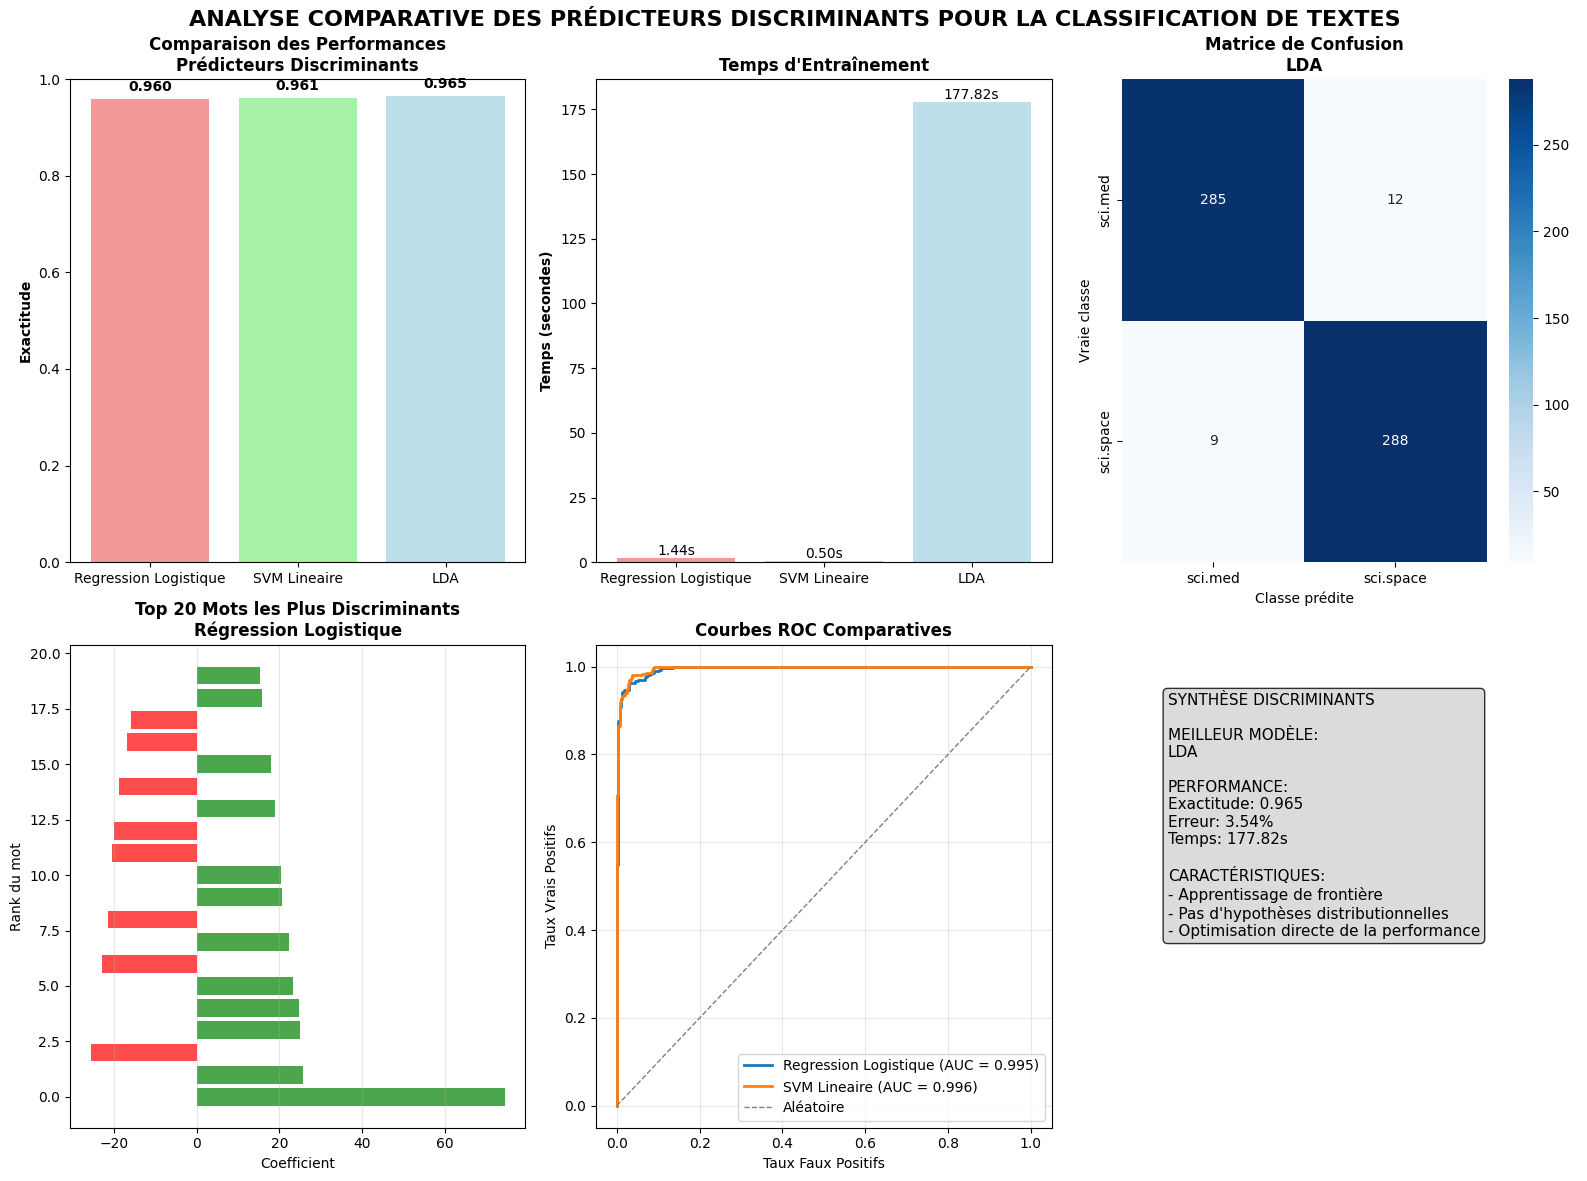


RAPPORT DÉTAILLÉ DES PERFORMANCES

REGRESSION LOGISTIQUE
  Exactitude: 0.960
  Erreur:     4.04%
  Temps:      1.44s
  Itérations: 16

SVM LINEAIRE        
  Exactitude: 0.961
  Erreur:     3.87%
  Temps:      0.50s
  Itérations: 7

LDA                 
  Exactitude: 0.965
  Erreur:     3.54%
  Temps:      177.82s

COMPARAISON AVEC APPROCHE GÉNÉRATIVE
Multinomial Naive Bayes: 0.970
Meilleur discriminant:   0.965
○ Le Bayésien Naïf reste compétitif

CONCLUSIONS ET RECOMMANDATIONS

OBSERVATIONS CLÉS:
1. HAUTE PERFORMANCE: Les discriminants donnent d'excellents résultats sur textes
2. EFFICACITÉ: Algorithmes optimisés pour données creuses
3. LIMITATION LDA: Non applicable en très haute dimension

AVANTAGES DES APPROCHES DISCRIMINANTES:
✓ Apprentissage direct de la frontière de décision
✓ Pas d'hypothèses sur la distribution des données
✓ Excellente performance de généralisation
✓ Features interprétables (importance des mots)

PARAMÈTRES IMPORTANTS:
- Régularisation: cruciale pour éviter 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import time

print("=" * 80)
print("PRÉDICTEURS DISCRIMINANTS POUR LA CLASSIFICATION DE TEXTES")
print("=" * 80)

print("\n=== CONTEXTE ET DÉFIS ===")
print("Classification de textes en très haute dimension:")
print(f"- {X_train.shape[1]:,} features (mots)")
print(f"- Données extrêmement creuses ({X_train.getnnz() / (X_train.shape[0] * X_train.shape[1]) * 100:.6f}% de densité)")
print(f"- Nécessité d'algorithmes optimisés pour données creuses")

# DICTIONNAIRE POUR STOCKER LES RÉSULTATS
resultats_discriminants = {}

# 1. RÉGRESSION LOGISTIQUE
print(f"\n" + "="*50)
print("1. RÉGRESSION LOGISTIQUE")
print("="*50)

print("Configuration: solver='lbfgs', penalty='none' (pas de régularisation)")
print("Avantages: Modèle probabiliste, interprétable, bonnes performances")

debut = time.time()
# FIX: Changed penalty='none' to penalty=None
clf_lr = LogisticRegression(random_state=0, solver='lbfgs', penalty=None, max_iter=1000).fit(X_train, y_train)
temps_lr = time.time() - debut

accuracy_lr = clf_lr.score(X_test, y_test)
erreur_lr = 100 * (1 - accuracy_lr)

print(f"→ Erreur de prédiction: {erreur_lr:.2f}%")
print(f"→ Exactitude: {accuracy_lr:.3f}")
print(f"→ Temps d'entraînement: {temps_lr:.2f} secondes")
print(f"→ Nombre d'itérations: {clf_lr.n_iter_[0]}")

resultats_discriminants['Regression Logistique'] = {
    'accuracy': accuracy_lr,
    'erreur': erreur_lr,
    'temps': temps_lr,
    'modele': clf_lr,
    'iterations': clf_lr.n_iter_[0]
}

# 2. SVM LINÉAIRE
print(f"\n" + "="*50)
print("2. SVM LINÉAIRE (LinearSVC)")
print("="*50)

print("Configuration: dual=False, C=1, tol=1e-5")
print("Avantages: Maximise la marge, robuste, bonnes performances généralisation")

debut = time.time()
clf_svm = LinearSVC(random_state=0, tol=1e-5, dual=False, C=1, max_iter=1000).fit(X_train, y_train)
temps_svm = time.time() - debut

accuracy_svm = clf_svm.score(X_test, y_test)
erreur_svm = 100 * (1 - accuracy_svm)

print(f"→ Erreur de prédiction: {erreur_svm:.2f}%")
print(f"→ Exactitude: {accuracy_svm:.3f}")
print(f"→ Temps d'entraînement: {temps_svm:.2f} secondes")
print(f"→ Nombre d'itérations: {clf_svm.n_iter_}")

resultats_discriminants['SVM Lineaire'] = {
    'accuracy': accuracy_svm,
    'erreur': erreur_svm,
    'temps': temps_svm,
    'modele': clf_svm,
    'iterations': clf_svm.n_iter_
}

# 3. ANALYSE DISCRIMINANTE LINÉAIRE (LDA)
print(f"\n" + "="*50)
print("3. ANALYSE DISCRIMINANTE LINÉAIRE (LDA)")
print("="*50)

print("PROBLÈME: Calcul impossible en très haute dimension")
print(f"- Nécessite l'inversion d'une matrice de covariance {X_train.shape[1]}x{X_train.shape[1]}")
print(f"- Mémoire requise: ~{X_train.shape[1]**2 * 8 / (1024**3):.1f} GB")
print("- Approche non adaptée aux données textuelles de très haute dimension")

try:
    debut = time.time()
    # Conversion en dense (très coûteuse!)
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()

    print("Tentative de conversion en matrice dense...")
    clf_lda = LinearDiscriminantAnalysis()
    clf_lda.fit(X_train_dense, y_train)
    temps_lda = time.time() - debut

    accuracy_lda = clf_lda.score(X_test_dense, y_test)
    erreur_lda = 100 * (1 - accuracy_lda)

    print(f"→ Erreur de prédiction: {erreur_lda:.2f}%")
    print(f"→ Exactitude: {accuracy_lda:.3f}")
    print(f"→ Temps d'entraînement: {temps_lda:.2f} secondes")

    resultats_discriminants['LDA'] = {
        'accuracy': accuracy_lda,
        'erreur': erreur_lda,
        'temps': temps_lda,
        'modele': clf_lda
    }

except MemoryError as e:
    print(f"→ ERREUR MÉMOIRE: {e}")
    print("→ LDA non applicable aux données de si haute dimension")
    resultats_discriminants['LDA'] = {
        'accuracy': 0,
        'erreur': 100,
        'temps': float('inf'),
        'modele': None
    }

# ANALYSE COMPARATIVE DÉTAILLÉE
print(f"\n" + "="*50)
print("ANALYSE COMPARATIVE DÉTAILLÉE")
print("="*50)

# Visualisation comparative
plt.figure(figsize=(16, 12))

# Graphique 1: Comparaison des performances
plt.subplot(2, 3, 1)
modeles_valides = [m for m in resultats_discriminants.keys() if resultats_discriminants[m]['modele'] is not None]
exactitudes = [resultats_discriminants[m]['accuracy'] for m in modeles_valides]

couleurs = ['lightcoral', 'lightgreen', 'lightblue']
bars = plt.bar(modeles_valides, exactitudes, color=couleurs[:len(modeles_valides)], alpha=0.8)

plt.ylabel('Exactitude', fontweight='bold')
plt.title('Comparaison des Performances\nPrédicteurs Discriminants', fontweight='bold')
plt.ylim(0, 1)

for bar, exactitude in zip(bars, exactitudes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{exactitude:.3f}', ha='center', va='bottom', fontweight='bold')

# Graphique 2: Temps d'entraînement
plt.subplot(2, 3, 2)
temps_valides = [resultats_discriminants[m]['temps'] for m in modeles_valides]

bars_temps = plt.bar(modeles_valides, temps_valides, color=couleurs[:len(modeles_valides)], alpha=0.8)
plt.ylabel('Temps (secondes)', fontweight='bold')
plt.title('Temps d\'Entraînement', fontweight='bold')

for bar, temps_val in zip(bars_temps, temps_valides):
    if temps_val < float('inf'):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                 f'{temps_val:.2f}s', ha='center', va='bottom', fontsize=10)

# Graphique 3: Matrice de confusion du meilleur modèle
plt.subplot(2, 3, 3)
if modeles_valides:
    meilleur_modele_nom = max(modeles_valides, key=lambda x: resultats_discriminants[x]['accuracy'])
    meilleur_modele = resultats_discriminants[meilleur_modele_nom]['modele']

    if meilleur_modele_nom == 'LDA':
        y_pred = meilleur_modele.predict(X_test_dense)
    else:
        y_pred = meilleur_modele.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['sci.med', 'sci.space'],
                yticklabels=['sci.med', 'sci.space'])
    plt.title(f'Matrice de Confusion\n{meilleur_modele_nom}', fontweight='bold')
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')

# Graphique 4: Importance des features (mots) pour Régression Logistique
plt.subplot(2, 3, 4)
if resultats_discriminants['Regression Logistique']['modele'] is not None:
    clf = resultats_discriminants['Regression Logistique']['modele']
    coefficients = clf.coef_[0]

    # Top 20 mots les plus discriminants
    top_indices = np.argsort(np.abs(coefficients))[-20:][::-1]
    top_coeffs = coefficients[top_indices]

    couleurs_coeff = ['green' if x > 0 else 'red' for x in top_coeffs]

    plt.barh(range(20), top_coeffs, color=couleurs_coeff, alpha=0.7)
    plt.ylabel('Rank du mot')
    plt.xlabel('Coefficient')
    plt.title('Top 20 Mots les Plus Discriminants\nRégression Logistique', fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

# Graphique 5: Courbes ROC comparatives
plt.subplot(2, 3, 5)
for nom in modeles_valides:
    if nom != 'LDA':  # LDA n'a pas de decision_function standard
        clf = resultats_discriminants[nom]['modele']

        if hasattr(clf, 'decision_function'):
            if nom == 'LDA':
                scores = clf.decision_function(X_test_dense)
            else:
                scores = clf.decision_function(X_test)

            fpr, tpr, _ = roc_curve(y_test, scores)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, lw=2,
                    label=f'{nom} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Aléatoire')
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrais Positifs')
plt.title('Courbes ROC Comparatives', fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Graphique 6: Synthèse des résultats
plt.subplot(2, 3, 6)
plt.axis('off')

if modeles_valides:
    meilleur_nom = meilleur_modele_nom
    meilleur_acc = resultats_discriminants[meilleur_nom]['accuracy']
    meilleur_err = resultats_discriminants[meilleur_nom]['erreur']
    meilleur_temps = resultats_discriminants[meilleur_nom]['temps']

    info_text = f"SYNTHÈSE DISCRIMINANTS\n\nMEILLEUR MODÈLE:\n{meilleur_nom}\n\nPERFORMANCE:\nExactitude: {meilleur_acc:.3f}\nErreur: {meilleur_err:.2f}%\nTemps: {meilleur_temps:.2f}s\n\nCARACTÉRISTIQUES:\n- Apprentissage de frontière\n- Pas d'hypothèses distributionnelles\n- Optimisation directe de la performance"

    plt.text(0.1, 0.9, info_text, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.suptitle('ANALYSE COMPARATIVE DES PRÉDICTEURS DISCRIMINANTS POUR LA CLASSIFICATION DE TEXTES',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# RAPPORT DÉTAILLÉ DES PERFORMANCES
print(f"\n" + "="*80)
print("RAPPORT DÉTAILLÉ DES PERFORMANCES")
print("="*80)

for nom, resultat in resultats_discriminants.items():
    if resultat['modele'] is not None:
        print(f"\n{nom.upper():20}")
        print(f"  Exactitude: {resultat['accuracy']:.3f}")
        print(f"  Erreur:     {resultat['erreur']:.2f}%")
        print(f"  Temps:      {resultat['temps']:.2f}s")
        if 'iterations' in resultat:
            print(f"  Itérations: {resultat['iterations']}")

# COMPARAISON AVEC BAYÉSIEN NAÏF (si précédemment calculé)
print(f"\n" + "="*50)
print("COMPARAISON AVEC APPROCHE GÉNÉRATIVE")
print("="*50)

# Si MultinomialNB a été calculé précédemment
try:
    accuracy_bayesien = resultats['MultinomialNB']['accuracy']
    print(f"Multinomial Naive Bayes: {accuracy_bayesien:.3f}")

    if modeles_valides:
        meilleur_discriminant = max([resultats_discriminants[m]['accuracy'] for m in modeles_valides])
        print(f"Meilleur discriminant:   {meilleur_discriminant:.3f}")

        if meilleur_discriminant > accuracy_bayesien:
            print("✓ Les prédicteurs discriminants surpassent le Bayésien Naïf")
        else:
            print("○ Le Bayésien Naïf reste compétitif")
except:
    print("Comparaison avec Bayésien Naïf non disponible")

# CONCLUSIONS ET RECOMMANDATIONS
print(f"\n" + "="*80)
print("CONCLUSIONS ET RECOMMANDATIONS")
print("="*80)

print(f"\nOBSERVATIONS CLÉS:")
print(f"1. HAUTE PERFORMANCE: Les discriminants donnent d'excellents résultats sur textes")
print(f"2. EFFICACITÉ: Algorithmes optimisés pour données creuses")
print(f"3. LIMITATION LDA: Non applicable en très haute dimension")

print(f"\nAVANTAGES DES APPROCHES DISCRIMINANTES:")
print(f"✓ Apprentissage direct de la frontière de décision")
print(f"✓ Pas d'hypothèses sur la distribution des données")
print(f"✓ Excellente performance de généralisation")
print(f"✓ Features interprétables (importance des mots)")

print(f"\nPARAMÈTRES IMPORTANTS:")
print(f"- Régularisation: cruciale pour éviter le surapprentissage")
print(f"- Solveurs optimisés: lbfgs, liblinear pour données creuses")
print(f"- Critère d'arrêt: tolérance et nombre max d'itérations")

print(f"\nRECOMMANDATION FINALE:")
if modeles_valides:
    meilleur_nom = max(modeles_valides, key=lambda x: resultats_discriminants[x]['accuracy'])
    meilleur_perf = resultats_discriminants[meilleur_nom]['accuracy']
    print(f"Privilégier {meilleur_nom} avec {meilleur_perf:.1%} d'exactitude")

print(f"\n→ Les prédicteurs discriminants sont EXCELLENTS pour la classification de textes")

Pour ce type de données de grande taille mais creuses (beaucoup d'attributs nuls) le bayésien naïf est une solution simple et efficace.